<img src="https://uwe-cyber.github.io/images/uwe_banner.png">

# UFCFEL-15-3 Security Data Analytics and Visualisation
## Portfolio Assignment: Part 3
### Academic year: 2024-25

## Conduct a security investigation into a suspected insider threat
---

**UWEtech** are calling you back once more to help them with their security challenges. They believe that one of their employees has been the cause of their recent security problems, and they believe they may have an insider threat within the company. They enlist your help to examine employee log activity, to see what behaviours deviate from the norm and to identify which user may be acting as a threat to their organisation.

**Dataset:** You will be issued a **unique dataset** based on your UWE student ID. **Failure to use the dataset that corresponds to your student ID will result in zero marks.** Please access the datasets via Blackboard.

**This exercise carries a weight of 45% towards your overall portfolio submission**


### Submission Documents
---

For Part 3 of your portfolio, your complete output file should be saved as:

- **STUDENT_ID-PART3.ipynb**

This should then be included in a ZIP file along with your other two portfolio documents.

The deadline for your portfolio submission is **THURSDAY 12th DECEMBER @ 14:00**. 

## DATASET: Load in the data

**Please provide the string below that you have been assigned as given in the spreadsheet available on Blackboard. The directory containing your dataset should be at the same location as your notebook file.**

In [158]:
# PLEASE ENTER THE NAME OF THE DATASET ASSIGNED TO YOU AS INDICATED ON BLACKBOARD
DATASET = 'TechNovaInnovations'

### Function for loading data - do not change

In [160]:
import random
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import datetime

def load_data(DATASET):
    dataset_list = ['uwetech-dataset01', 'uwetech-dataset02', 'uwetech-dataset03', 'uwetech-dataset04',
                    'CyberWaveSolutions', 'TechNovaInnovations', 'QuantumByteSystems', 'NexGenCyberTech']
    if DATASET in dataset_list:
        email_data = pd.read_csv('./' + DATASET + '/email_data.csv', parse_dates=True, index_col=0)
        file_data = pd.read_csv('./' + DATASET + '/file_data.csv', parse_dates=True, index_col=0)
        web_data = pd.read_csv('./' + DATASET + '/web_data.csv', parse_dates=True, index_col=0)
        login_data = pd.read_csv('./' + DATASET + '/login_data.csv', parse_dates=True, index_col=0)
        usb_data = pd.read_csv('./' + DATASET + '/usb_data.csv', parse_dates=True, index_col=0)
        employee_data = pd.read_csv('./' + DATASET + '/employee_data.csv', index_col=0)
        
        email_data['datetime'] = pd.to_datetime(email_data['datetime'])
        file_data['datetime'] = pd.to_datetime(file_data['datetime'])
        web_data['datetime'] = pd.to_datetime(web_data['datetime'])
        login_data['datetime'] = pd.to_datetime(login_data['datetime'])
        usb_data['datetime'] = pd.to_datetime(usb_data['datetime'])
    else:
        print ("DATASET variable not defined - please refer to Blackboard for DATASET name")
        return
    return employee_data, login_data, usb_data, web_data, file_data, email_data

employee_data, login_data, usb_data, web_data, file_data, email_data = load_data(DATASET)

/var/folders/h4/6f163_1s6yv6b5rhkqbls4v40000gn/T/ipykernel_64341/1319915571.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  email_data = pd.read_csv('./' + DATASET + '/email_data.csv', parse_dates=True, index_col=0)
/var/folders/h4/6f163_1s6yv6b5rhkqbls4v40000gn/T/ipykernel_64341/1319915571.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  file_data = pd.read_csv('./' + DATASET + '/file_data.csv', parse_dates=True, index_col=0)
/var/folders/h4/6f163_1s6yv6b5rhkqbls4v40000gn/T/ipykernel_64341/1319915571.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  web_data = 

### The following code samples may be useful to aid your investigation

In [7]:
# This shows the employee_data DataFrame
employee_data

user       role                             email    pc
0   usr-bcc  Technical  usr-bcc@technova-innovations.net   pc0
1   usr-fxz      Legal  usr-fxz@technova-innovations.net   pc1
2   usr-jit         HR  usr-jit@technova-innovations.net   pc2
3   usr-bsv         HR  usr-bsv@technova-innovations.net   pc3
4   usr-num   Security  usr-num@technova-innovations.net   pc4
..      ...        ...                               ...   ...
95  usr-vzu    Finance  usr-vzu@technova-innovations.net  pc95
96  usr-jmh      Legal  usr-jmh@technova-innovations.net  pc96
97  usr-vko         HR  usr-vko@technova-innovations.net  pc97
98  usr-jde   Director  usr-jde@technova-innovations.net  pc98
99  usr-ynd  Technical  usr-ynd@technova-innovations.net  pc99

[100 rows x 4 columns]

In [8]:
# This shows the login_data DataFrame
login_data

datetime     user  action    pc
0     2018-01-01 00:10:58  usr-daf   login  pc62
1     2018-01-01 00:18:42  usr-eqs   login  pc48
2     2018-01-01 00:24:54  usr-vdy   login  pc31
3     2018-01-01 02:47:12  usr-gyv   login  pc73
4     2018-01-01 02:51:52  usr-lmw   login  pc79
...                   ...      ...     ...   ...
36195 2018-06-30 23:01:02  usr-gxz  logoff  pc66
36196 2018-06-30 23:22:38  usr-tir  logoff  pc90
36197 2018-06-30 23:37:36  usr-vtc  logoff  pc27
36198 2018-06-30 23:47:41  usr-bcc  logoff   pc0
36199 2018-06-30 23:53:48  usr-pqq  logoff  pc17

[36200 rows x 4 columns]

In [9]:
# This shows how to filter the login_data DataFrame by a particular username
login_data[login_data['user']=='usr-nic']

Empty DataFrame
Columns: [datetime, user, action, pc]
Index: []

In [10]:
# This shows how to filter the login_data DataFrame by a particular set of usernames within a list
login_data[login_data['user'].isin(['usr-nic'])]

Empty DataFrame
Columns: [datetime, user, action, pc]
Index: []

In [11]:
# all_roles is an array/list of all job roles that are within our DataFrame
all_roles = employee_data['role'].unique()
all_roles

array(['Technical', 'Legal', 'HR', 'Security', 'Services', 'Director',
       'Finance'], dtype=object)

In [12]:
### This sample code helps to create two dictionary objects - user_set and user_set_emails - that group usernames and emails by job role.

user_set = {}
user_set_emails = {}
all_roles = employee_data['role'].unique()
for role in all_roles:
    user_set[role] = list(employee_data[employee_data['role'] == role]['user'].values)
    user_set_emails[role] = list(employee_data[employee_data['role'] == role]['email'].values)

In [13]:
# List all usernames that belong to the job role Finance
user_set['Finance']

['usr-gxd',
 'usr-vac',
 'usr-ali',
 'usr-ams',
 'usr-heb',
 'usr-jkp',
 'usr-eff',
 'usr-oci',
 'usr-iqy',
 'usr-vnd',
 'usr-ljx',
 'usr-ypg',
 'usr-idd',
 'usr-vzu']

### Question 1: For all Finance staff members during the month of January, show the distribution of when users logon and logoff by hour using one or more Bar Charts, and report the most common login and logoff time for this role.

*Hint: Once you have filtered the data to only Finance staff in January, count the number of logons and logoffs that occur in each hour of the day.*

#### (1 mark)

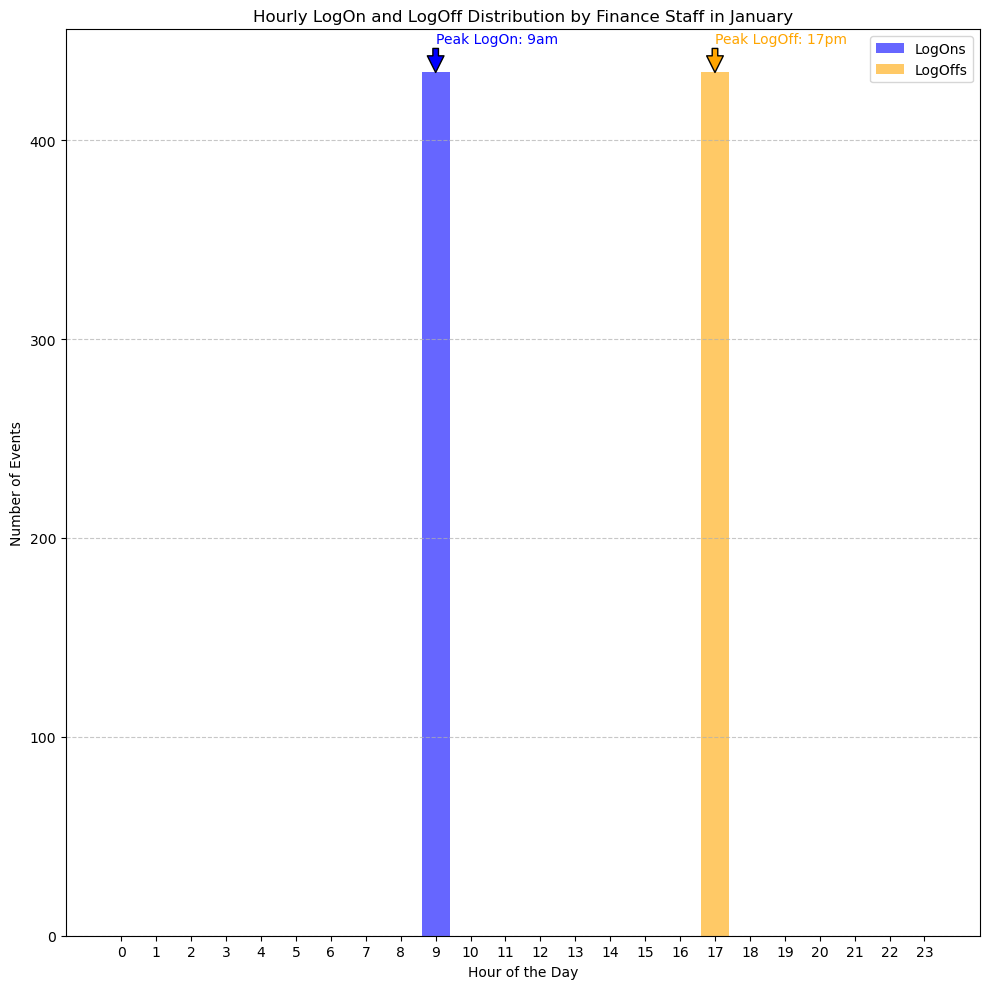

Peak LogOn Hour: 9am
Peak LogOff Hour: 17pm


In [15]:

#Filter the staff role to Finance from employees_data 
finance_staff = employee_data[employee_data['role'] == 'Finance']['user']

#Convert 'datetime' to datetime format 
login_data ['datetime'] = pd.to_datetime(login_data['datetime'])  

#Filter login_data for January (Finance staff ) 
january_logins = login_data[
    (login_data['user'].isin(finance_staff)) &
    (login_data['datetime'].dt.month == 1 ) 
].copy()       # made a copy - so the data doesn't get overwritten 


#Extract hour and action for login hours in January 
january_logins['hour'] = january_logins['datetime'].dt.hour   # raising warningerror but better not to use .loc which will make changes directly to DATAFRAME


#Separating logon and logoff from action column 
logon_data = january_logins[january_logins['action'] == 'login' ].copy()
logoff_data = january_logins[january_logins['action'] == 'logoff'].copy()

#Aggregate counts by hour 
all_hours = pd.RangeIndex(0,24)  # Full range of hours 
logon_counts = logon_data.groupby('hour').size().reindex(all_hours, fill_value = 0 ) 
logoff_counts = logoff_data.groupby('hour').size().reindex(all_hours, fill_value = 0 )

# Combined Bar Chart for LogOn and LogOff Events
plt.figure(figsize=(10, 10))

# Plot LogOn events
plt.bar(logon_counts.index, logon_counts.values, color='blue', alpha=0.6, label='LogOns')

# Plot LogOff events
plt.bar(logoff_counts.index, logoff_counts.values, color='orange', alpha=0.6, label='LogOffs')

# Add title, labels, and legend
plt.title("Hourly LogOn and LogOff Distribution by Finance Staff in January")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Events")
plt.xticks(range(0, 24))  # Ensure all 24 hours are shown
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlight peak LogOn hour
if not logon_counts.empty:
    peak_logon_hour = logon_counts.idxmax()
    plt.annotate(
        f"Peak LogOn: {peak_logon_hour}am",
        xy=(peak_logon_hour, logon_counts[peak_logon_hour]),
        xytext=(peak_logon_hour, logon_counts[peak_logon_hour] + 15),
        arrowprops=dict(facecolor='blue'),
        color='blue'
    )

# Highlight peak LogOff hour
if not logoff_counts.empty:
    peak_logoff_hour = logoff_counts.idxmax()
    plt.annotate(
        f"Peak LogOff: {peak_logoff_hour}pm",
        xy=(peak_logoff_hour, logoff_counts[peak_logoff_hour]),
        xytext=(peak_logoff_hour, logoff_counts[peak_logoff_hour] + 15),
        arrowprops=dict(facecolor='orange'),
        color='orange'
    )

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Print peak hours
print(f"Peak LogOn Hour: {logon_counts.idxmax()}am")
print(f"Peak LogOff Hour: {logoff_counts.idxmax()}pm")


### Question 2: Plot a multi-line chart that shows the logon and logoff times during the month of January for the user of pc42.

*Hint: Filter the data as you need, and make two calls to plt.plot().*

#### (1 mark)



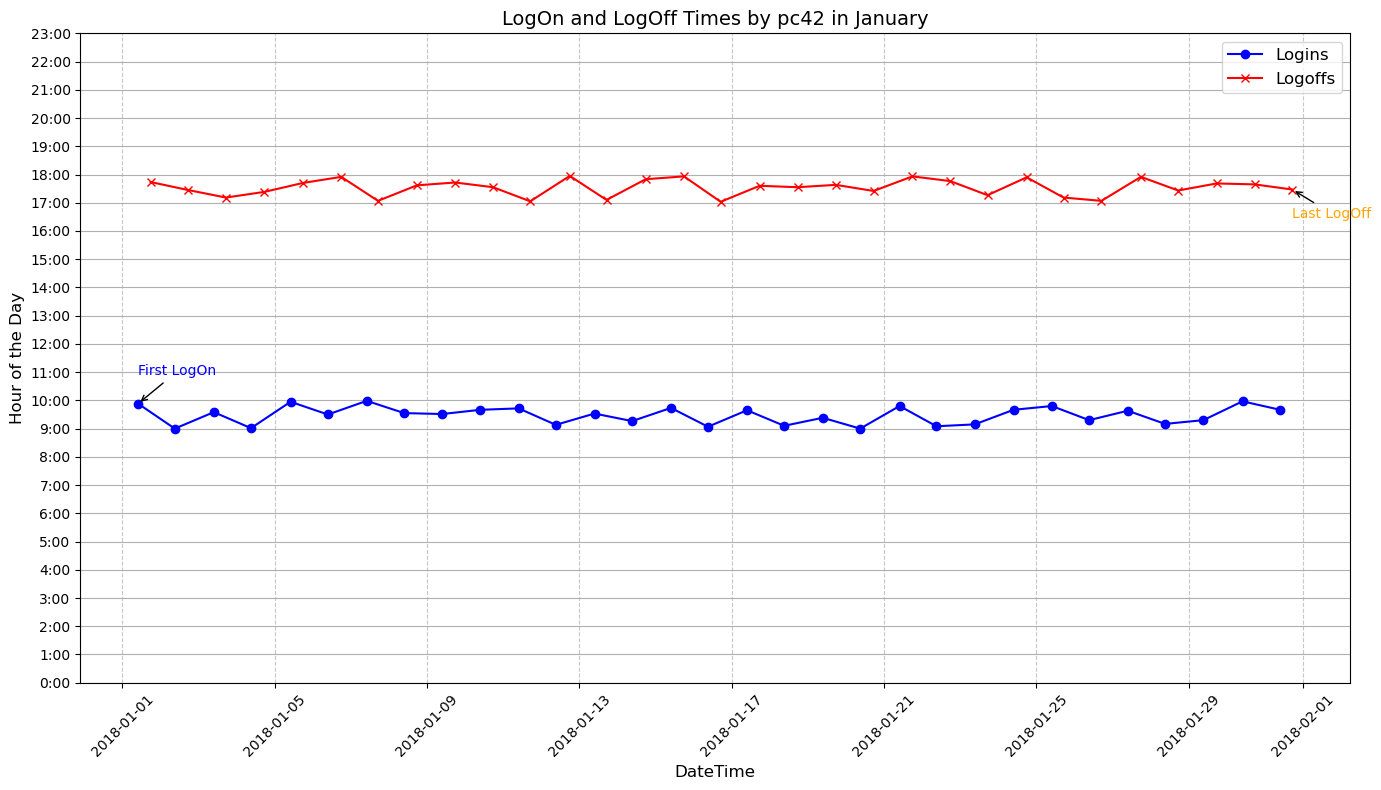

In [17]:
# Convert 'datetime' to datetime format
login_data = login_data.copy()    
login_data['datetime'] = pd.to_datetime(login_data['datetime'], errors='coerce')


# Filter for events in January for pc42
jan_logins_pc42 = login_data[
    (login_data['pc'] == "pc42") & 
    (login_data['datetime'].dt.month == 1)
].copy()

# Separate logon and logoff events
logon_jan_pc42 = jan_logins_pc42[jan_logins_pc42['action'] == 'login'].copy()
logoff_jan_pc42 = jan_logins_pc42[jan_logins_pc42['action'] == 'logoff'].copy()

# Multi-line chart
plt.figure(figsize=(14, 8))

# Plot logon times (hours and minutes)
plt.plot(
    logon_jan_pc42['datetime'], 
    logon_jan_pc42['datetime'].dt.hour + logon_jan_pc42['datetime'].dt.minute / 60, 
    label="Logins", 
    color="blue", 
    marker='o'
)

# Plot logoff times (hours and minutes)
plt.plot(
    logoff_jan_pc42['datetime'], 
    logoff_jan_pc42['datetime'].dt.hour + logoff_jan_pc42['datetime'].dt.minute / 60, 
    label="Logoffs", 
    color="red", 
    marker='x'
)

# Annotate interesting points
first_logon = logon_jan_pc42.head(1)     
last_logoff = logoff_jan_pc42.tail(1)

if not first_logon.empty:
    plt.annotate(
        "First LogOn", 
        xy=(first_logon['datetime'].values[0], 
            first_logon['datetime'].dt.hour.values[0] + first_logon['datetime'].dt.minute.values[0] / 60), 
        xytext=(first_logon['datetime'].values[0], 
                first_logon['datetime'].dt.hour.values[0] + first_logon['datetime'].dt.minute.values[0] / 60 + 1),
        arrowprops=dict(facecolor="blue", arrowstyle='->'),
        fontsize=10, 
        color='blue'
    )

if not last_logoff.empty:
    plt.annotate(
        "Last LogOff",
        xy=(last_logoff['datetime'].values[0], 
            last_logoff['datetime'].dt.hour.values[0] + last_logoff['datetime'].dt.minute.values[0] / 60), 
        xytext=(last_logoff['datetime'].values[0], 
                last_logoff['datetime'].dt.hour.values[0] + last_logoff['datetime'].dt.minute.values[0] / 60 - 1),
        arrowprops=dict(facecolor="orange", arrowstyle="->"),
        fontsize=10,
        color='orange'
    )

# Create the chart
plt.title("LogOn and LogOff Times by pc42 in January", fontsize=14)
plt.xlabel("DateTime", fontsize=12)
plt.ylabel("Hour of the Day", fontsize=12)  # Updated label to specify "Hour of the Day"
plt.yticks(range(0, 24), labels=[f"{h}:00" for h in range(0, 24)])  # Show full hour labels
plt.xticks(rotation=45)
plt.grid(True)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)


# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()


### Question 3: Use a node-link graph to show all emails sent by Security staff on January 5th 2018. Your node link graph may show only those users who receive emails from the select senders.

*Hint: Filter the data and then refer back to Question 4 from Part 1 to format the data correctly*

#### (1 mark)

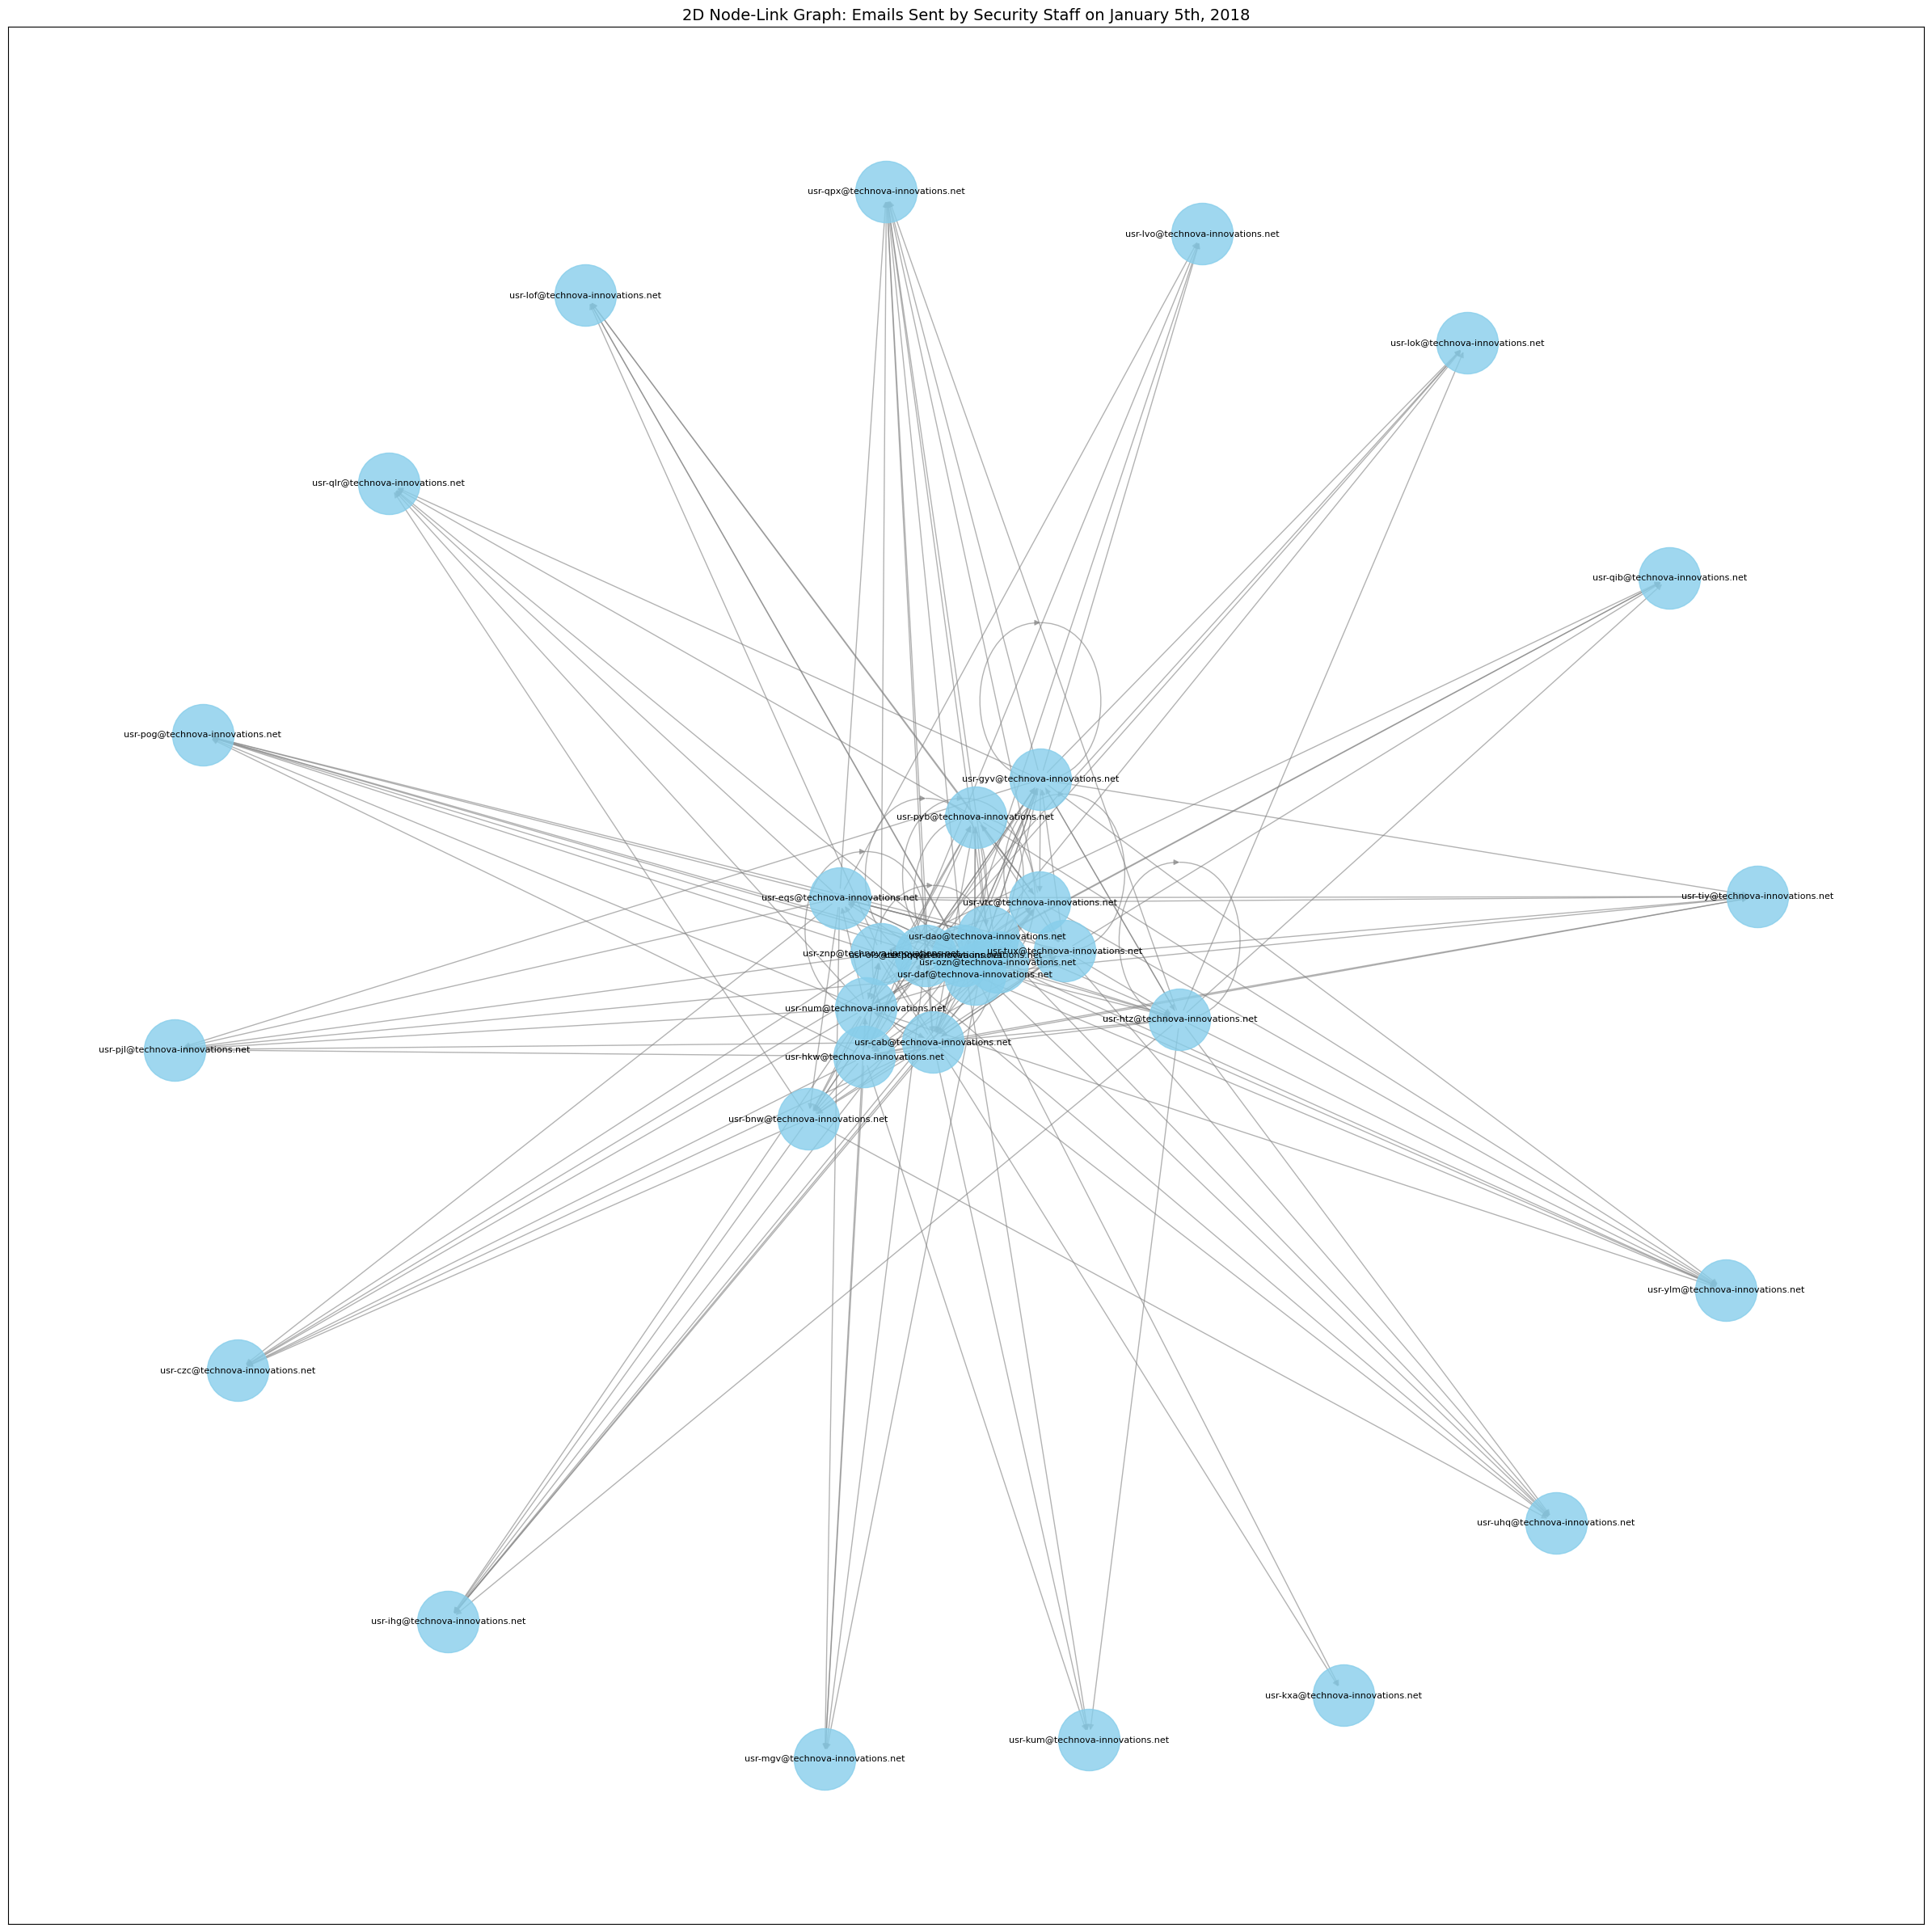

In [168]:

import networkx as nx


#making copies of dataset
email_data = email_data.copy()
employee_data = employee_data.copy()

# Filter employee_data for Security staff
security_staff = employee_data[employee_data['role'] == 'Security']['email']

# Filter email_data for January 5th, 2018
email_data['datetime'] = pd.to_datetime(email_data['datetime'], errors='coerce')
jan5_emails = email_data[email_data['datetime'].dt.date == pd.Timestamp('2018-01-05').date()]

# Filter emails sent by Security Staff
security_emails = jan5_emails[jan5_emails['sender'].isin(security_staff)]

# Build node-link data
edges = list(zip(security_emails['sender'], security_emails['recipient']))

# Create the graph
G = nx.DiGraph()
G.add_edges_from(edges)

# Create a layout for the nodes
pos = nx.spring_layout(G, k=0.8, iterations=200, scale=2)  # Adjust layout for clarity

# Create the figure
fig, ax = plt.subplots(figsize=(24, 24))

# Draw nodes
nx.draw_networkx_nodes(G, pos, ax=ax, node_size=3000, node_color="skyblue", alpha=0.8)

# Draw edges
nx.draw_networkx_edges(G, pos, ax=ax, edge_color="gray", alpha=0.6, arrows=True, arrowsize=10)

# Add labels
nx.draw_networkx_labels(G, pos, ax=ax, font_size=8, font_color="black")

# Enhance the plot with a title
ax.set_title("2D Node-Link Graph: Emails Sent by Security Staff on January 5th, 2018", fontsize=14)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### (Advanced) Question 4: Extend the above, now showing a node for every possible user. The edge connections should be as above, for emails sent by Security staff on 5th January 2022. You should use a shell layout for your network plot.

*Hint: Think about how to include all users as nodes. You may even include a dummy node and remove this in your processing depending on how you form your edgelist - https://networkx.org/documentation/stable/index.html*

#### (3 marks)

**In this question, I'd like to provide answers for both as the change of date  is announced in blackboard but not changed in question sheets. So, I wouldn't want to lose mark for that.**

## For Old Question (5th Jan 2022 ) 

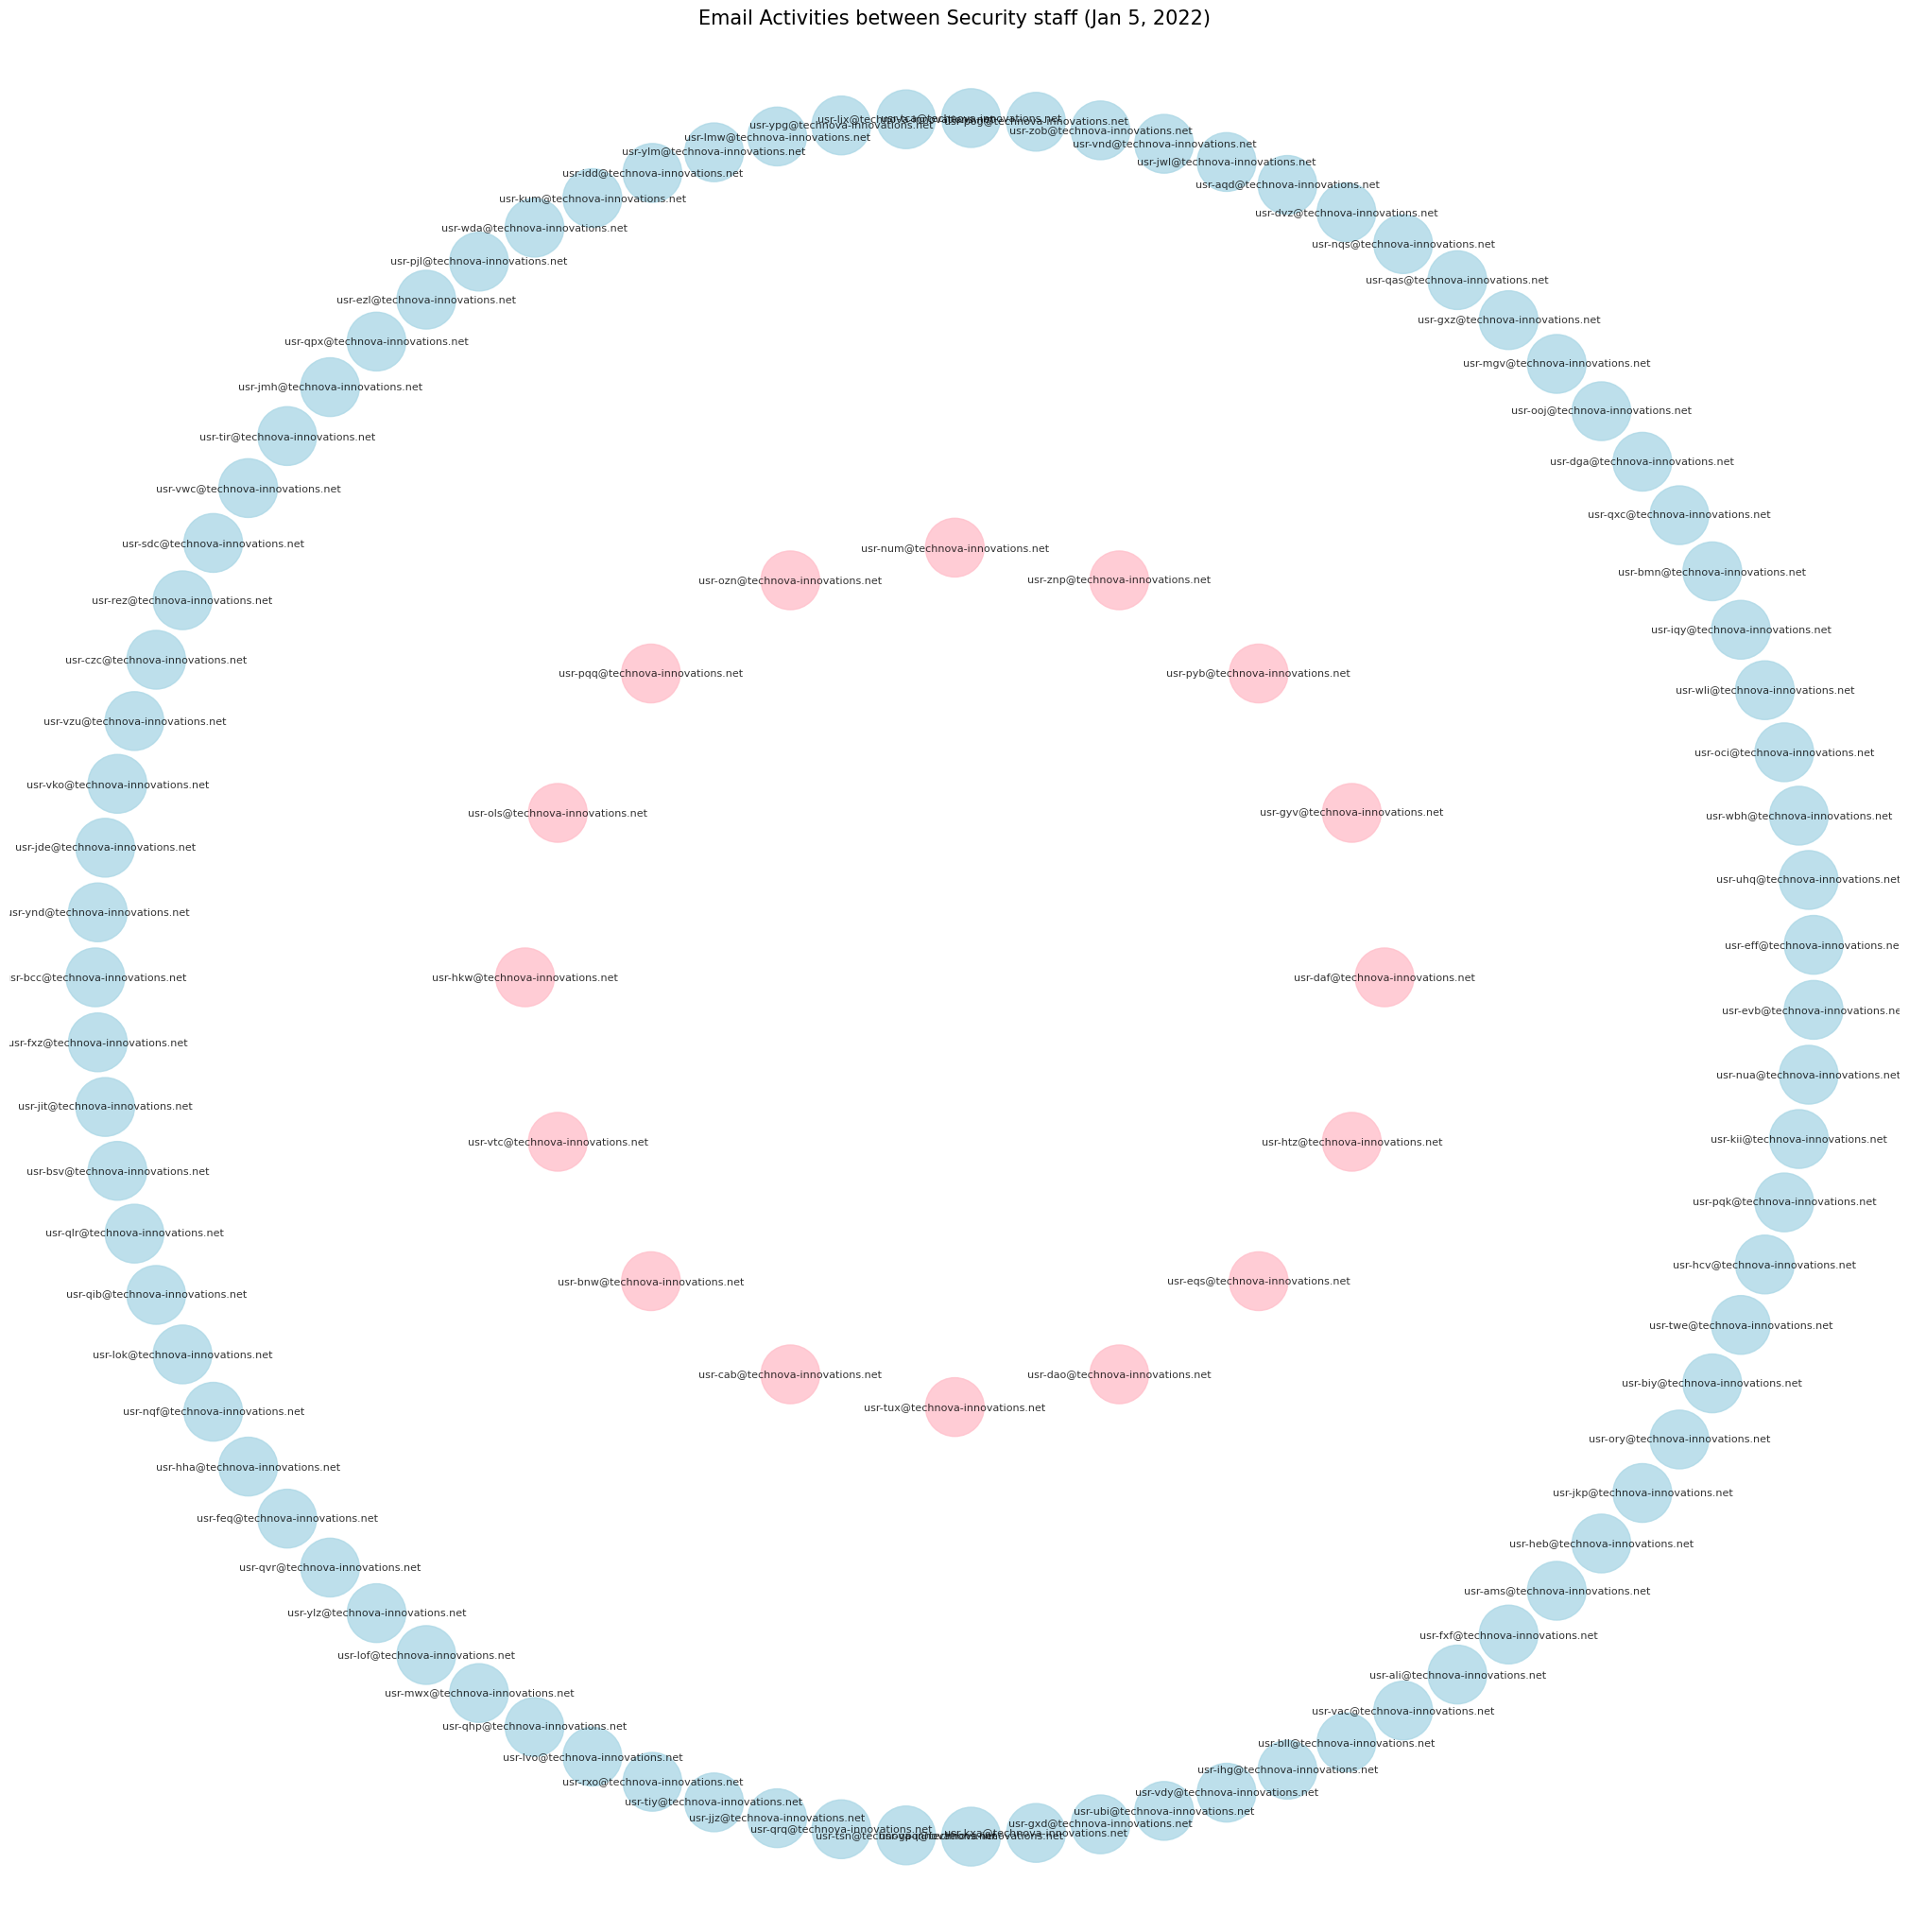

In [23]:
import networkx as nx
email_data = email_data.copy()

# Ensure the datetime column is in datetime format
email_data['datetime'] = pd.to_datetime(email_data['datetime'], errors='coerce')

# Identifying email addresses of Security team members
security_team_emails = employee_data.loc[employee_data['role'] == 'Security', 'email']

# Filtering the email data for communications sent by Security team on January 5, 2022
jan_5_security_emails = email_data[
    (email_data['datetime'].dt.date == pd.Timestamp('2022-01-05').date()) &
    (email_data['sender'].isin(security_team_emails))
]

# Constructing a directed graph using sender-receiver relationships
email_graph = nx.from_pandas_edgelist(
    jan_5_security_emails,
    source='sender',
    target='recipient',
    create_using=nx.DiGraph()
)

# Adding all employees as nodes to ensure the graph represents the entire network
all_employee_nodes = employee_data['email'].unique()
email_graph.add_nodes_from(all_employee_nodes)

core_nodes = list(security_team_emails)
outer_nodes = [email for email in all_employee_nodes if email not in core_nodes]
graph_layers = [core_nodes, outer_nodes]

node_positions = nx.shell_layout(email_graph, nlist=graph_layers)

plt.figure(figsize=(20, 20))
nx.draw(
    email_graph,
    node_positions,
    with_labels=True,
    node_size=2000,
    node_color=['pink' if node in core_nodes else 'lightblue' for node in email_graph.nodes()],
    edge_color='darkgray',
    font_size=8,
    alpha=0.8
)

plt.title("Email Activities between Security staff (Jan 5, 2022)", fontsize=15)
plt.show()


## For New Question ( changed one ) ( 5th Jan 2018 ) 

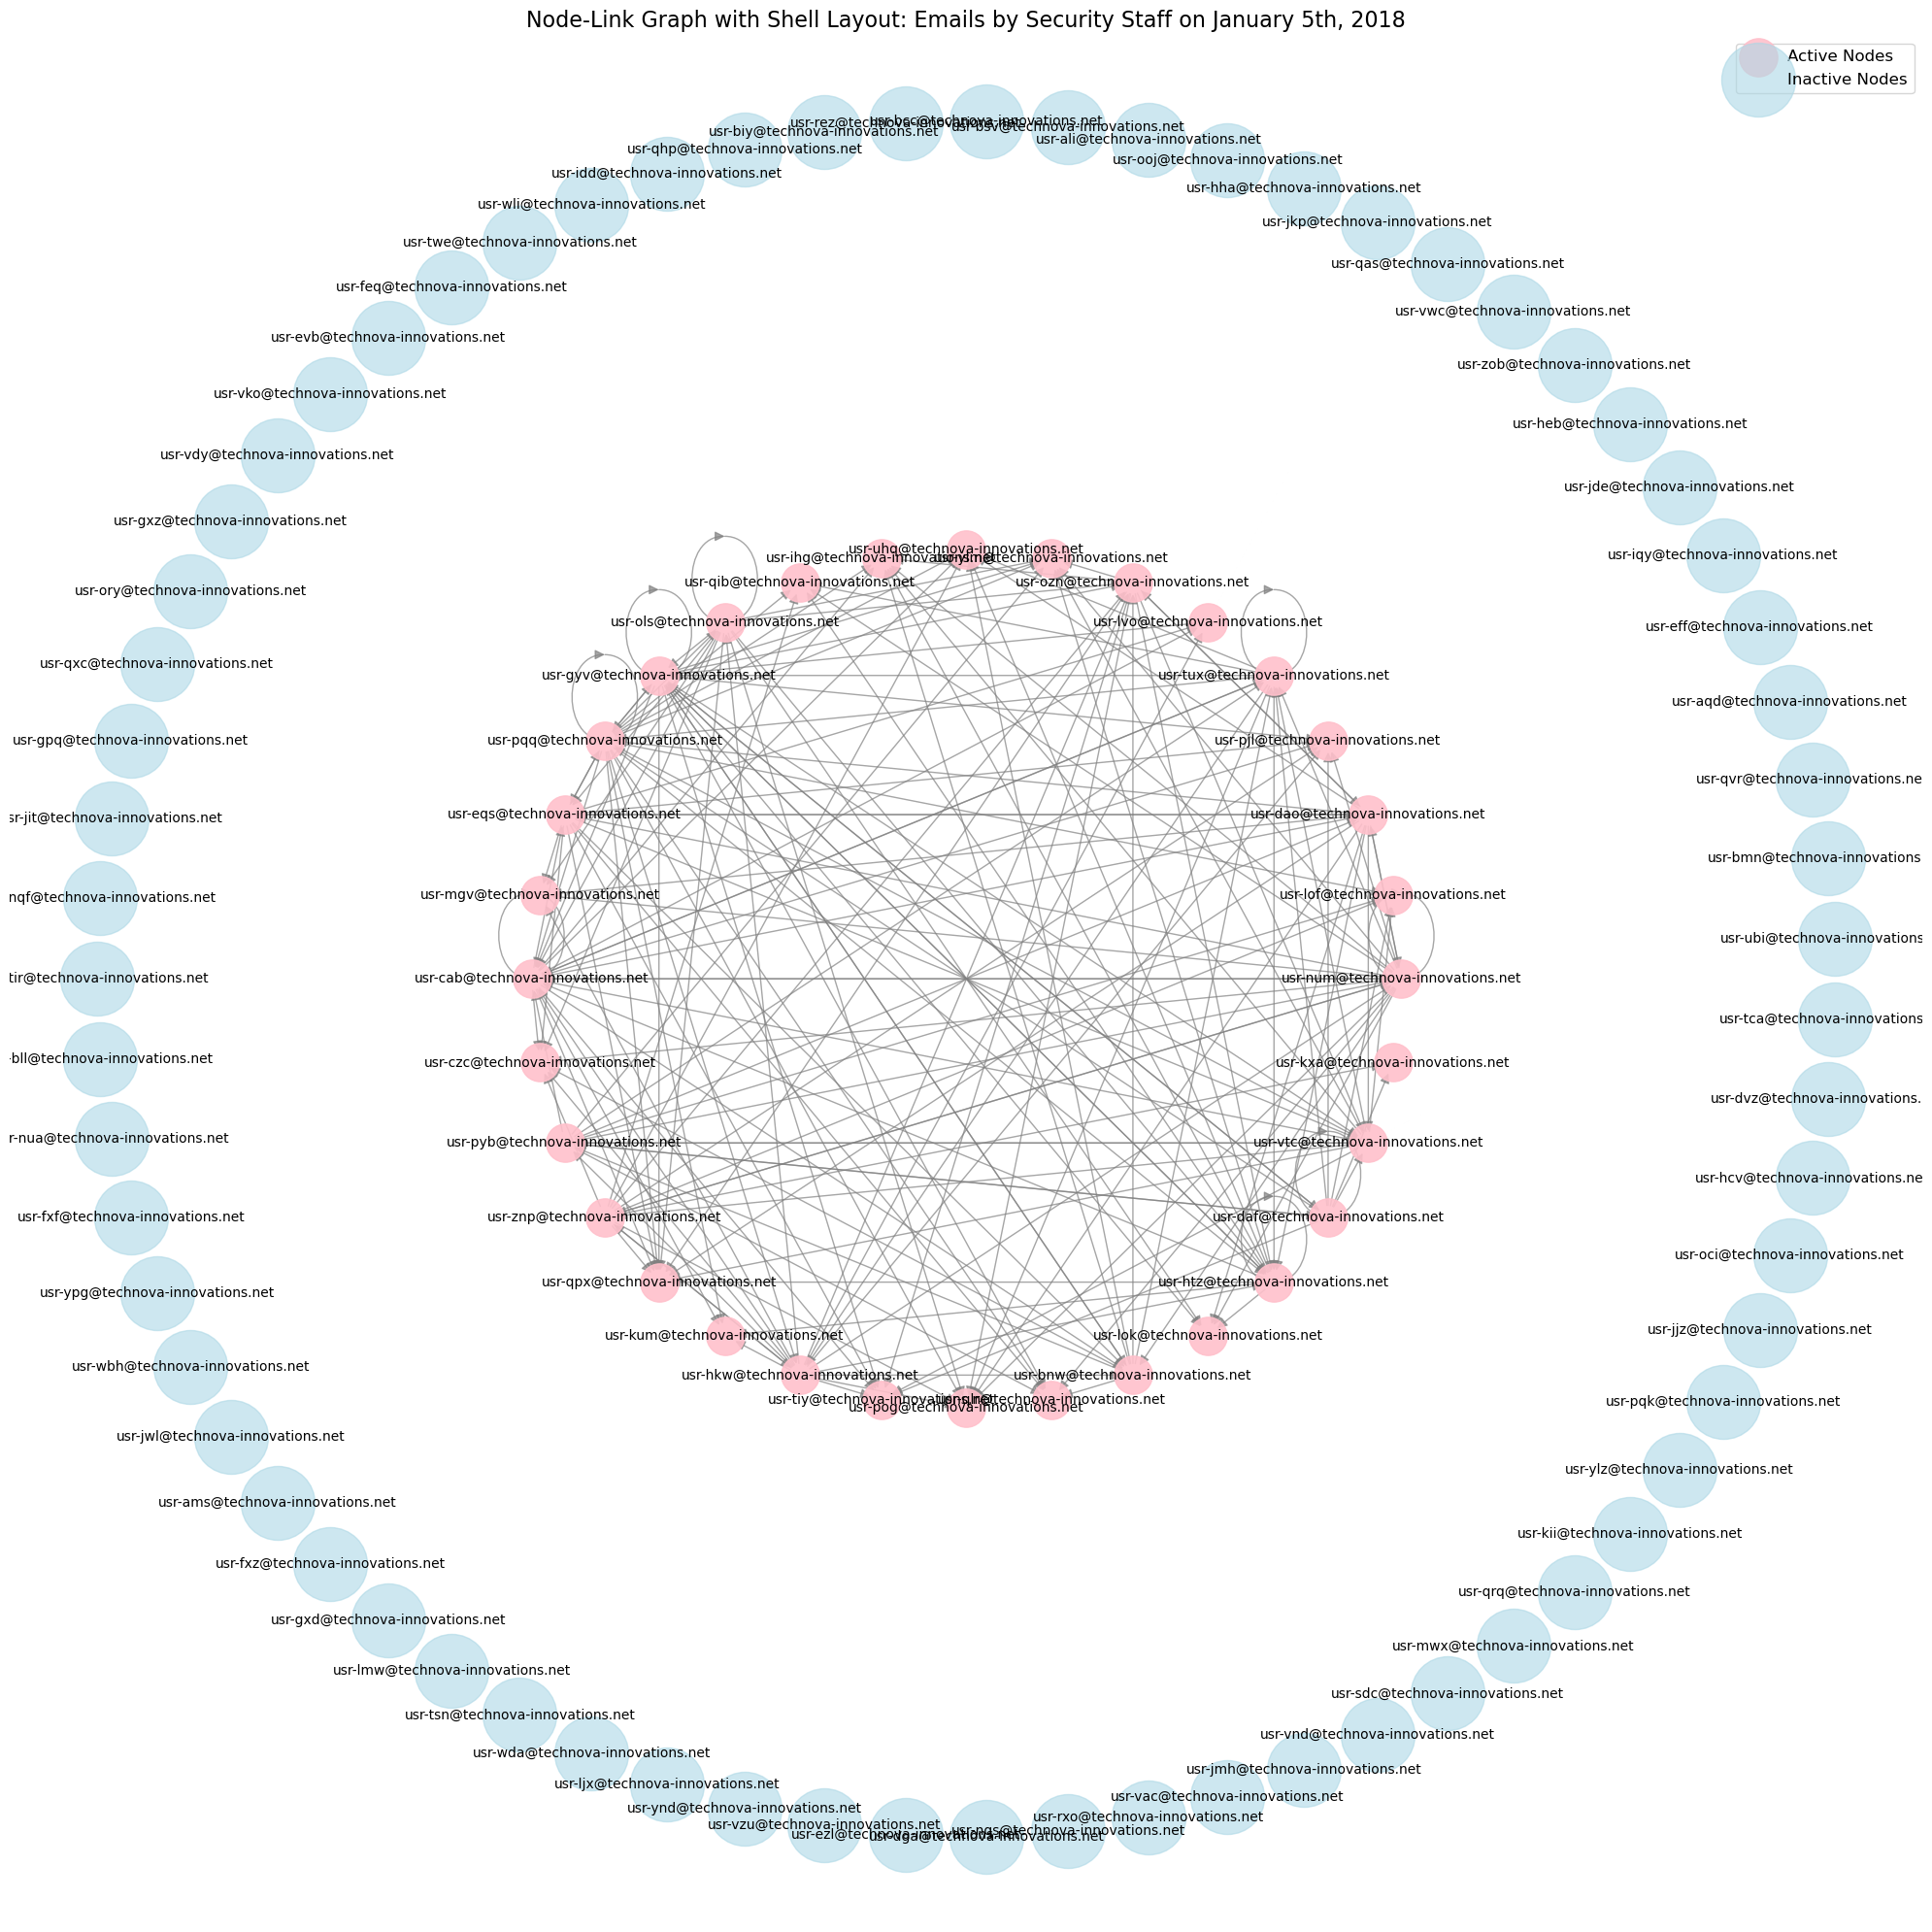

In [173]:

# Step 2: Extract all possible users from employee_data
all_users = employee_data['email'].unique()

# Step 3: Filter employee_data for Security staff
security_staff = employee_data[employee_data['role'] == 'Security']['email']

# Step 4: Filter email_data for January 5th, 2022
email_data['datetime'] = pd.to_datetime(email_data['datetime'], errors='coerce')
jan_5_emails = email_data[email_data['datetime'].dt.date == pd.Timestamp('2018-01-05').date()]

# Step 5: Filter emails sent by Security staff
security_emails = jan_5_emails[jan_5_emails['sender'].isin(security_staff)]

# Step 6: Build the node-link data (source and destination)
edges = list(zip(security_emails['sender'], security_emails['recipient']))

# Step 7: Include all users as nodes
G = nx.DiGraph()
G.add_nodes_from(all_users)  # Add all possible users as nodes
G.add_edges_from(edges)      # Add edges from Security staff emails

# Step 8: Define active and inactive nodes
active_nodes = set(security_emails['sender']).union(set(security_emails['recipient']))
inactive_nodes = set(all_users) - active_nodes

# Step 9: Define the shell layout with active and inactive nodes
shell_layout = [list(active_nodes), list(inactive_nodes)]  # Inner: active nodes, Outer: inactive nodes
pos = nx.shell_layout(G, nlist=shell_layout)

# Step 10: Plot the graph
plt.figure(figsize=(20, 20))

# Draw active nodes (inner shell)
nx.draw_networkx_nodes(
    G, pos,
    nodelist=list(active_nodes),
    node_size=800, node_color="pink", alpha=0.9, label='Active Nodes'
)

# Draw inactive nodes (outer shell)
nx.draw_networkx_nodes(
    G, pos,
    nodelist=list(inactive_nodes),
    node_size=3000, node_color="lightblue", alpha=0.6, label='Inactive Nodes'
)

# Draw edges
nx.draw_networkx_edges(
    G, pos,
    edge_color='gray', arrows=True, arrowsize=15, alpha=0.7, width=1.0
)

# Draw labels

nx.draw_networkx_labels(
    G, pos,
    font_size=10, font_color="black"
)


# Enhance the plot with a title and legend
plt.title('Node-Link Graph with Shell Layout: Emails by Security Staff on January 5th, 2018', fontsize=16)
plt.legend(loc="upper right", fontsize=12)
plt.axis('off')  # Hide axis for clean visualization
plt.tight_layout()

# Show plot
plt.show()

### Question 5: Show a comparison between the files accessed by HR staff, Services staff, and Security staff, during January. You will need to think of a suitable way to convey this information within a single plot so that comparison of activity can be made easily.

*Hint: Think which plot enables you to make comparisons between two attributes, and then think what the attributes would need to be for mapping three job roles against the possible set of files accessed.*

#### (4 marks)

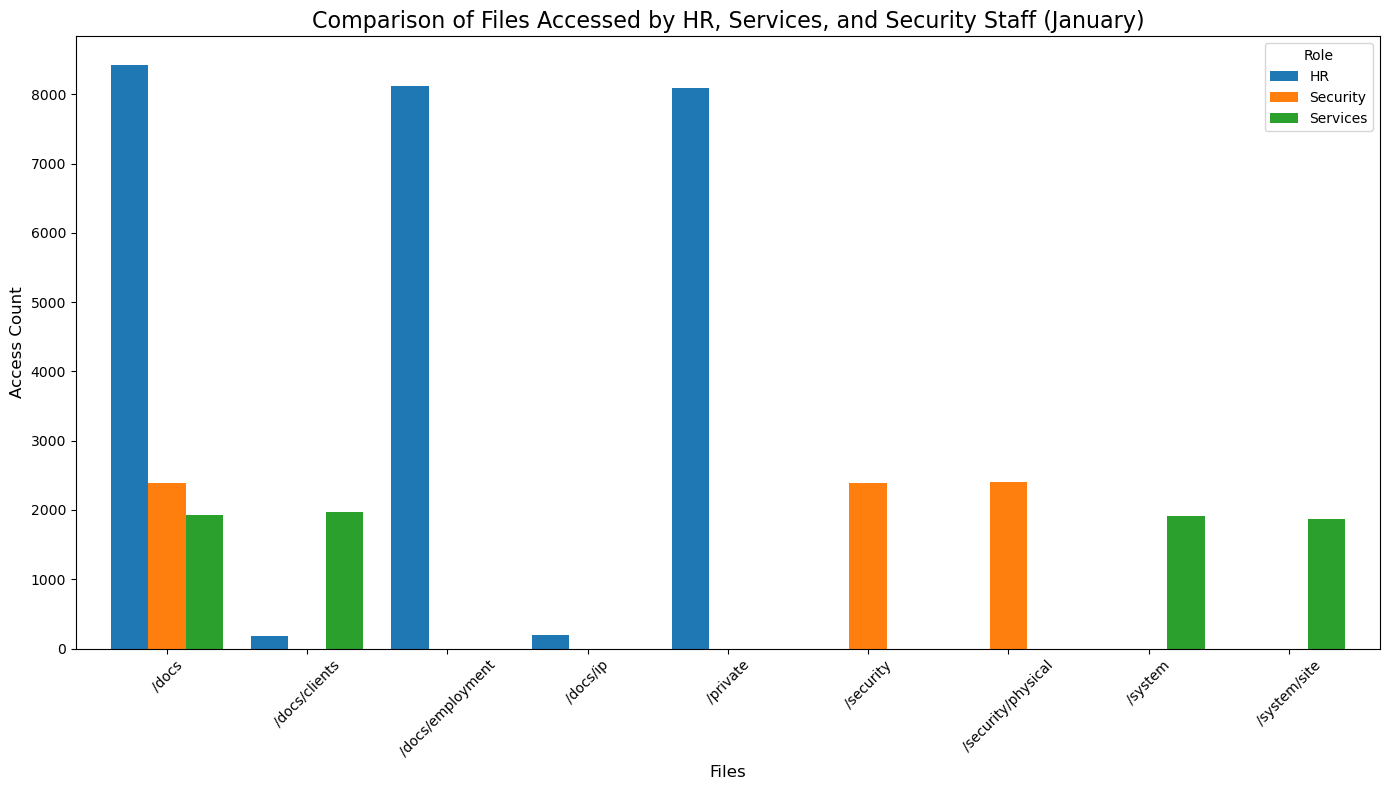

In [27]:
########################### 

#DATA PreProcessing 

########################### 
import seaborn as sns

#create copies of dataset
file_data = file_data.copy()
employee_data = employee_data.copy()


# Convert 'datetime' column to datetime format 

file_data['datetime'] = pd.to_datetime(file_data['datetime'], errors='coerce') 

  

# Filter for January 

january_files = file_data[file_data['datetime'].dt.month == 1] 

  

# Filter employees for the three roles 

roles_of_interest = ['HR', 'Services', 'Security'] 

employees_in_roles = employee_data[employee_data['role'].isin(roles_of_interest)] 

  

# Merge file_data with employee roles 

merged_data = pd.merge(january_files, employees_in_roles, how='inner', left_on='user', right_on='user') 

  

# Group by role and filename 

role_file_access = merged_data.groupby(['role', 'filename']).size().reset_index(name='access_count') 




########################### 

#Visualisation - Grouped Bar Chart  

########################### 

 

# Pivot data for bar chart 

pivot_data = role_file_access.pivot(index='filename', columns='role', values='access_count').fillna(0) 

  

# Plot grouped bar chart 

pivot_data.plot(kind='bar', figsize=(14, 8), width=0.8) 

  

# Enhance plot 

plt.title('Comparison of Files Accessed by HR, Services, and Security Staff (January)', fontsize=16) 

plt.xlabel('Files', fontsize=12) 

plt.ylabel('Access Count', fontsize=12) 

plt.xticks(rotation=45) 

plt.legend(title='Role', fontsize=10) 

plt.tight_layout() 

  

# Show plot 

plt.show() 




### Question 6: Carry on your own investigation to find the anomalous activity across all data files provided. Provide clear evidence and justification for your investigative steps.

Marks are awarded for: 
- a clear explanation of the steps you take to complete your investigation (5)
- suitable use of data analysis with clear explanation (6)
- suitable use of visualisation methods with clear annotation (6)
- identifying all of the suspicious events (8)

#### (25 marks)

### Key Findings From Question 1 to 5 

 Before initiating my own investigation, I would like to propose the key findings from question 1 to 5, which I will be using as a foundation for uncovering potential anomalies and suspicious behaviours across the datasets. 

#### Question - 1 : Hourly Logon and Logoff Analysis for Finance Staff

The finance staff showed a highly regimented behaviour, with logons consistently occurring at 9AM and logoffs at 5PM throughout January. This regularity aligns with standard office hours, suggesting adherence to expected work schedules. Notably, no activity was observed outside these houres, implying a low likelihood of anomalous behaviour with the logon/logoff data for this role. However, this finding raises questions about whether Finance staff may engage in suspicious activities indirectly, such as accessing sensitive files or web domains during work hours. 


#### Question - 2 : Multi-line Chart for pc42 

Analysis of pc42 revealed consistent logon and logoff behaviour, without deviations throughout January. The first logon occurred on January 1st , and  last logoff was recorded on 31st January. While no irregularities were evident in the timing of these events, the device's activity in other datasets - such as file access, web activity , and USB usage - remains unexplored. This consistency may mask subtle anomalies in data transer or unauthorized access, warranting further correlation with other datasets. 

#### Question - 3 : Node-Link  Graph for Emails Sent by Security Staff 

A high volume of emails was sent by security staff on January 5th , with certain nodes acting as cental hubs, communicating with multiple recipients. While this behaviour could be attributed to routine operational needs, the elevated activity levels on a specific day are noteworthy. The analysis highlighted users with extensive email connections, raising questions about whether these users were involved in unauthorized data sharing or unusual correspondence. Cross-referencing this email activity with USB and file access patterns could uncover a more complete picture of their behaviour.


### Question - 4 : Extended Node-Link Graph with All Users

The shell layout provided a clear distinction between active and inactive users in email communication. Active nodes(inner shell)represented users engaged in frequent communication , whiile inactive nodes (outer shell) showed limited or no participation. While active nodes warrant attention due to their high activity levels, the inactivity of outer-shell users may conceal other forms of anomalous behaviour , such as file or USB activity. Inactive nodes could be attempting to avoid detection by abstaining from email while engaging in other suspicious activities. 

### Question - 5 : File Access Comparison Accross Roles 

The analysis revealed distinct file access patterns: 
- HR staff accessed highly sensitive files (/private, /docs/employment) in large volumes .
- Security staff predominantly accessed /security , /security/physical directories , consistent with their role.
- Services staff exhibited diverse access patterns across /system, /system/site, and other directories.
While these patterns appear role-appropriate , anomalies could arise when file access is paried with flagged web activity, USB usage, or off-hours behaviour. For example, HR staff accessing sensitive files in conjunctionwith visiting flagged domains could signal data exfiltration or policy violations.










### Hypotheses Based on Key Findings (Question 1 to 5 ) 
1. The finance staff's strict adherence to standard logon (9am) and logoff(5pm) times suggests a low likelihood in their login patterns However, their significant access to sensitie files, such as /private and /docs/employment during work hours raises concerns about potential misuse or authorised data handling, particularly if correlated with flagged web activity or USB actions.

2. Elevated email activity by Security staff on January 5th , particularly by central nodes in the email network, may reflect operational spikes or potential data dissemination. Meanwhile, inactive nodes from the extended email graph , though appearing benign, maybe engaging in suspicious activities in other datasets, such as USB activity, file access, or flagged domain visits, which require further scrutiny. 

# Own Investigation 

Objective : Building on the findings and insights from Question 1 to 5, this investigation will correlate the closet and most relevant datasets to uncover potential insider threats. By systematically exploring key areas of potential anomalies, this plan aims to identify suspicious events using advanced data analysis and visualisation techniques, supported by clear evidence and detailed diagrams. 
Each step of investigation will be informed by earlier findings and will seek to address potential relationships and patterns that remain unexplored. 


## Logons and Logoffs of each user during and outside of working hours 

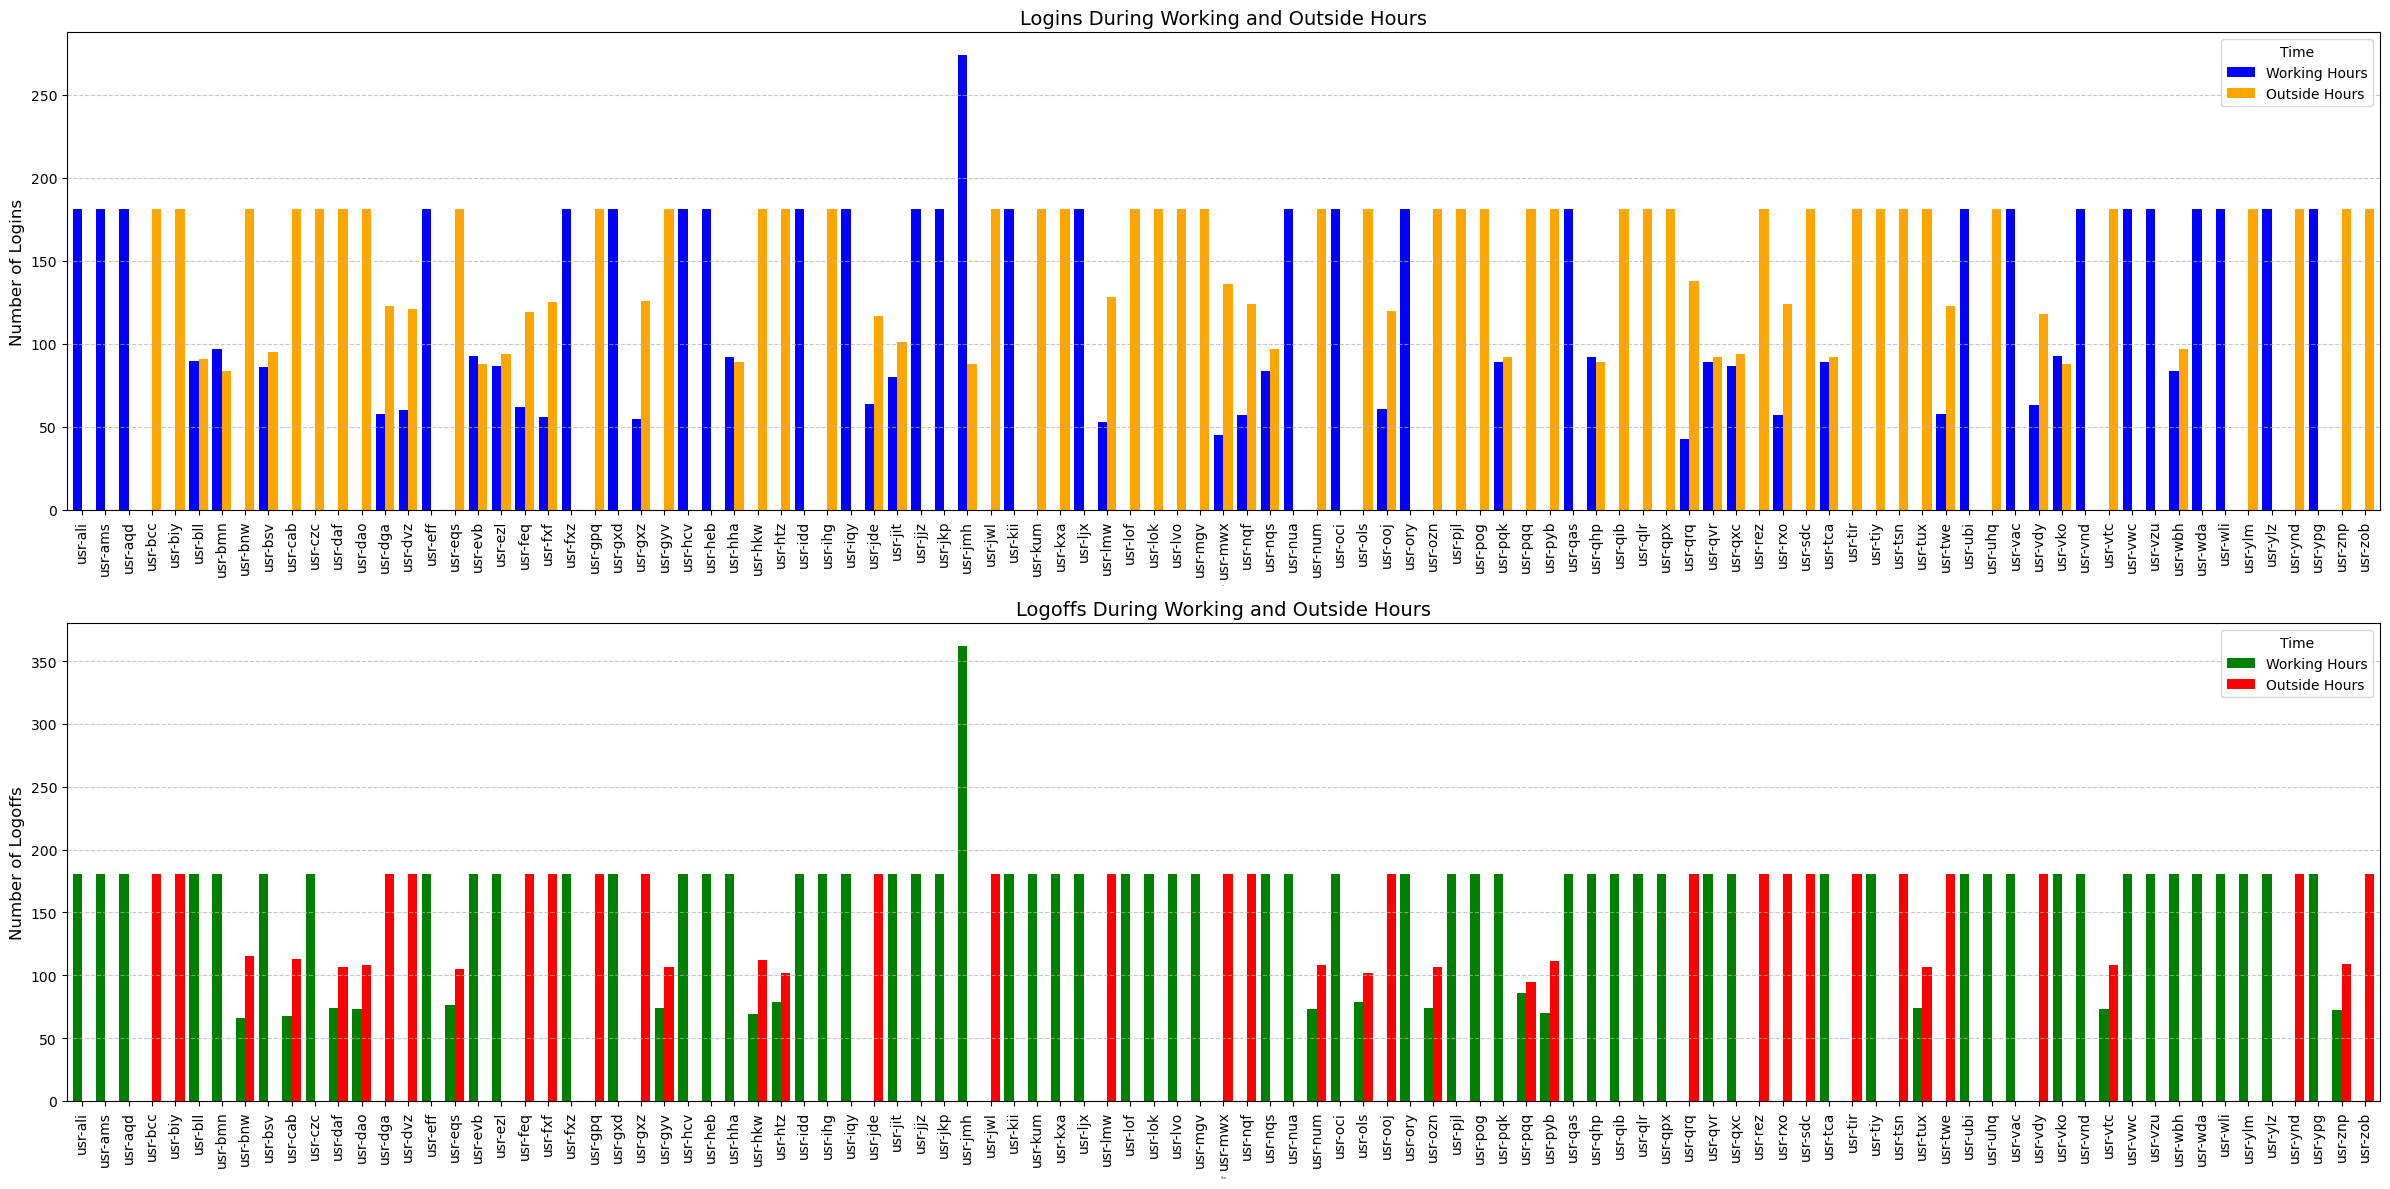

Highest Logon Numbers:
Working Hours: usr-jmh, 274.0 logins
Outside Hours: usr-bcc, 181.0 logins

Highest Logoff Numbers:
Working Hours: usr-jmh, 362.0 logoffs
Outside Hours: usr-bcc, 181.0 logoffs


In [37]:

#making a copy of dataset
login_data =  login_data.copy()

# Convert 'datetime' to datetime format and extract hour
login_data['datetime'] = pd.to_datetime(login_data['datetime'], errors='coerce')
login_data['hour'] = login_data['datetime'].dt.hour

# Define working hours and outside working hours
working_hours_condition = (login_data['hour'] >= 9) & (login_data['hour'] <= 17)
outside_working_hours_condition = ~working_hours_condition  # Opposite of working hours

# Separate logon and logoff events for working and outside working hours
logon_working = login_data[(working_hours_condition) & (login_data['action'] == 'login')].groupby('user').size()
logon_outside = login_data[(outside_working_hours_condition) & (login_data['action'] == 'login')].groupby('user').size()

logoff_working = login_data[(working_hours_condition) & (login_data['action'] == 'logoff')].groupby('user').size()
logoff_outside = login_data[(outside_working_hours_condition) & (login_data['action'] == 'logoff')].groupby('user').size()

# Combine the data into separate DataFrames for login and logoff
logon_data = pd.DataFrame({
    'Working Hours': logon_working,
    'Outside Hours': logon_outside
}).fillna(0)  # Fill NaN values with 0 for users with no activity

logoff_data = pd.DataFrame({
    'Working Hours': logoff_working,
    'Outside Hours': logoff_outside
}).fillna(0)

# Create stacked bar charts
fig, ax = plt.subplots(2, 1, figsize=(24, 12))

# Bar chart for Logins
logon_data.plot(kind='bar', ax=ax[0], width=0.8, color=['blue', 'orange'])
ax[0].set_title('Logins During Working and Outside Hours', fontsize=14)
ax[0].set_xlabel('User', fontsize=0.2)
ax[0].set_ylabel('Number of Logins', fontsize=12)
ax[0].legend(title='Time', fontsize=10)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)
ax[0].tick_params(axis='x', rotation=90)

# Bar chart for Logoffs
logoff_data.plot(kind='bar', ax=ax[1], width=0.8, color=['green', 'red'])
ax[1].set_title('Logoffs During Working and Outside Hours', fontsize=14)
ax[1].set_xlabel('User', fontsize=2)
ax[1].set_ylabel('Number of Logoffs', fontsize=12)
ax[1].legend(title='Time', fontsize=10)
ax[1].grid(axis='y', linestyle='--', alpha=0.7)
ax[1].tick_params(axis='x', rotation=90)

# Optimize layout
plt.tight_layout()

# Show the plots
plt.show()

# Find the user(s) with the highest number of logins during working and outside hours
max_logon_working = logon_data['Working Hours'].idxmax()
max_logon_outside = logon_data['Outside Hours'].idxmax()

# Find the user(s) with the highest number of logoffs during working and outside hours
max_logoff_working = logoff_data['Working Hours'].idxmax()
max_logoff_outside = logoff_data['Outside Hours'].idxmax()

# Print the users with the highest numbers
print("Highest Logon Numbers:")
print(f"Working Hours: {max_logon_working}, {logon_data.loc[max_logon_working, 'Working Hours']} logins")
print(f"Outside Hours: {max_logon_outside}, {logon_data.loc[max_logon_outside, 'Outside Hours']} logins\n")

print("Highest Logoff Numbers:")
print(f"Working Hours: {max_logoff_working}, {logoff_data.loc[max_logoff_working, 'Working Hours']} logoffs")
print(f"Outside Hours: {max_logoff_outside}, {logoff_data.loc[max_logoff_outside, 'Outside Hours']} logoffs")


### Analysis on  Logons and Logoffs of each user during and outside of working hours

**Late Night Login and Logoff Analysis**   
This graph compares user login and logoff activities during working (9 AM–5 PM) and outside working hours.

**Main Findings:**  
- **Usr-jmh:** Leads in working hours with 274 logins and 362 logoffs, showing the highest activity during this period.  
- **Usr-bcc:** Stands out with 181 logins and logoffs outside working hours, suggesting unusual late-night activity.  

**Commentary:**  
The high activity of `usr-bcc` outside working hours could indicate unconventional system usage, warranting further investigation.  

**Next Investigation:**  
Analyze number of files accessed by each role to identify patterns or unusual interactions involving these roles.

## Number of files accessed by each role 

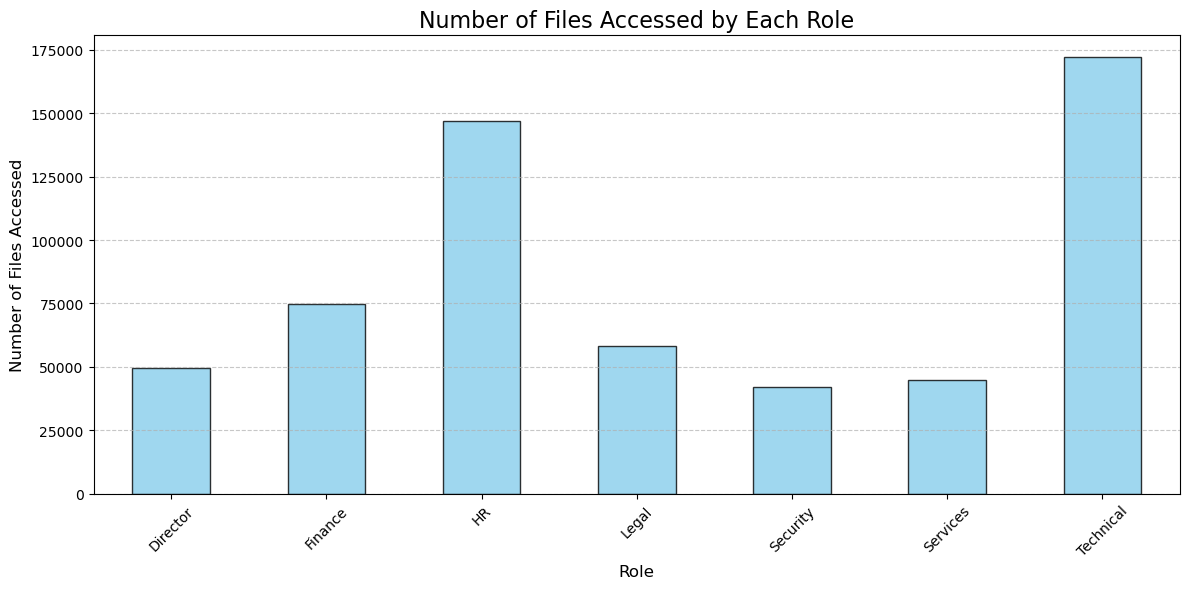

Files accessed by each role:
role
Director      49385
Finance       74873
HR           146927
Legal         58203
Security      42031
Services      44875
Technical    172120
Name: filename, dtype: int64


In [46]:
# making a copy the datasets
file_data = file_data.copy()
employee_data = employee_data.copy()

# Merge the datasets on 'user'
merged_data = pd.merge(file_data, employee_data, on='user', how='inner')

# Group by 'role' and count the number of file accesses
role_file_counts = merged_data.groupby('role')['filename'].count()

# Plot the bar graph
plt.figure(figsize=(12, 6))
role_file_counts.plot(kind='bar', color='skyblue', alpha=0.8, edgecolor='black')

# Enhance the plot
plt.title('Number of Files Accessed by Each Role', fontsize=16)
plt.xlabel('Role', fontsize=12)
plt.ylabel('Number of Files Accessed', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Print role counts for verification
print("Files accessed by each role:")
print(role_file_counts)


### Analysis on number of files accessed by each role 
This bar chart shows the total number of files accessed by each role within the organization.

Main Findings:

HR Staff: Recorded the highest number of file accesses, suggesting extensive involvement in document management and employee-related tasks.
Technical Staff: Also displayed significant file activity, reflecting their operational role in handling system and technical documentation.
Commentary:
The dominant file access activity by HR and Technical staff aligns with their roles, where file interactions are central to their responsibilities. However, this high activity could also pose potential security risks, such as unauthorized file access, which may warrant additional oversight.

Next Investigation:
Analyze the top 20 users by the number of files accessed to identify individual-level trends and outliers.

### Top 20 Users by Number of files Accessed

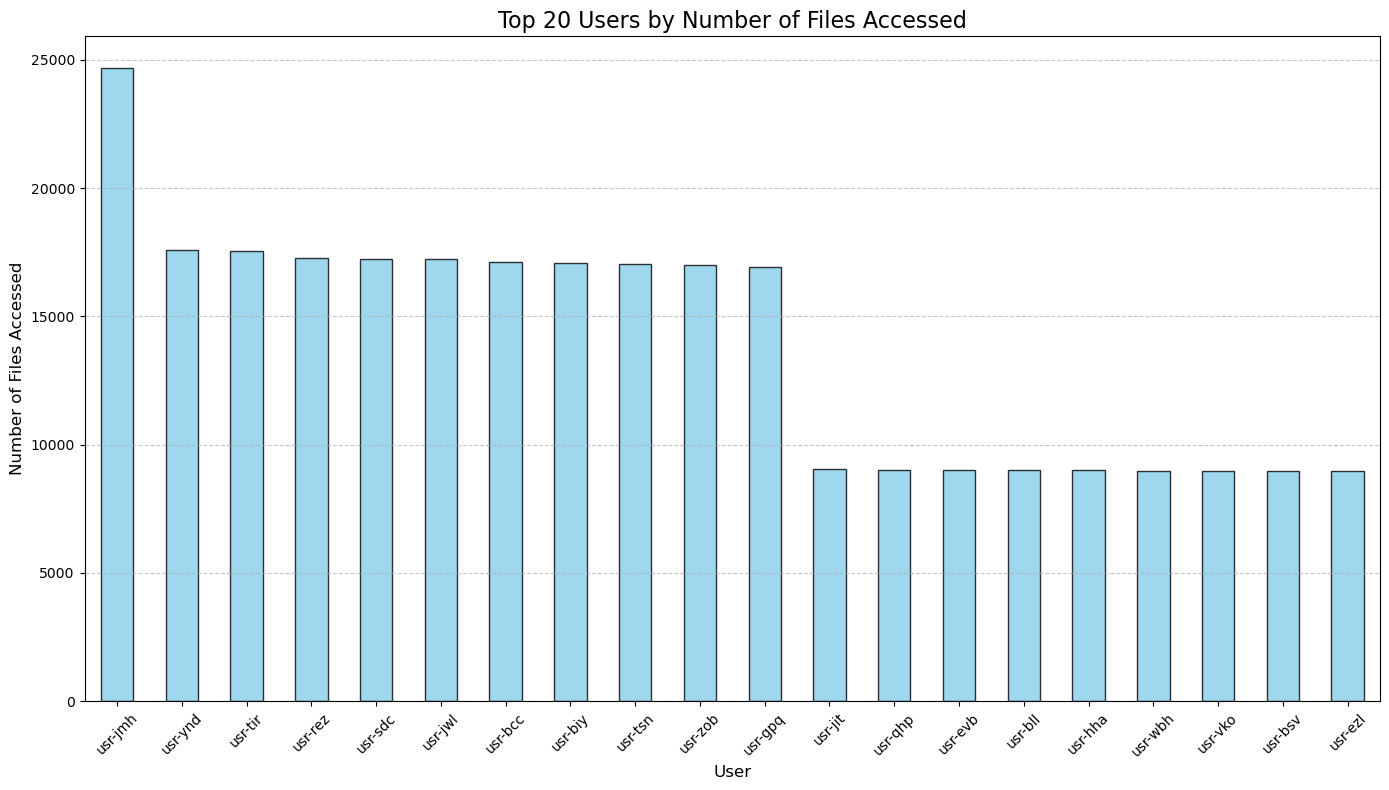

Top users by number of files accessed:
user
usr-jmh    24688
usr-ynd    17609
usr-tir    17557
usr-rez    17290
usr-sdc    17244
usr-jwl    17224
usr-bcc    17129
usr-biy    17071
usr-tsn    17061
usr-zob    17019
usr-gpq    16916
usr-jit     9051
usr-qhp     9030
usr-evb     9024
usr-bll     9021
usr-hha     9006
usr-wbh     8991
usr-vko     8985
usr-bsv     8980
usr-ezl     8958
Name: filename, dtype: int64


In [49]:

# Load the datasets
file_data = file_data.copy()
employee_data = employee_data.copy()

# Merge the datasets on 'user'
merged_data = pd.merge(file_data, employee_data, on='user', how='inner')

# Group by 'user' and count the number of file accesses
user_file_counts = merged_data.groupby('user')['filename'].count()

# Sort the users by the number of files accessed (descending)
user_file_counts = user_file_counts.sort_values(ascending=False)

# Plot the bar graph (showing top users for better readability)
plt.figure(figsize=(14, 8))
user_file_counts.head(20).plot(kind='bar', color='skyblue', alpha=0.8, edgecolor='black')  # Top 20 users

# Enhance the plot
plt.title('Top 20 Users by Number of Files Accessed', fontsize=16)
plt.xlabel('User', fontsize=12)
plt.ylabel('Number of Files Accessed', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Print user counts for verification
print("Top users by number of files accessed:")
print(user_file_counts.head(20))  # Display top 20 users


### Analysis on top 20 users by number of files accessed 
The bar chart highlights the top 20 users with the highest file access counts.  

**Main Findings:**  
- **Usr-jmh:** Leads with significantly more file access than others, followed by users with consistently high access patterns.  

**Commentary:**  
The activity of usr-jmh may reflect extensive job responsibilities but also raises concerns about excessive access, requiring further review.  

**Next Investigation:**  
Analyze USB activity of top file-accessing users to identify patterns or potential security risks.  

### Top 20 Users by USB insert and remove operations

<Figure size 1400x800 with 0 Axes>

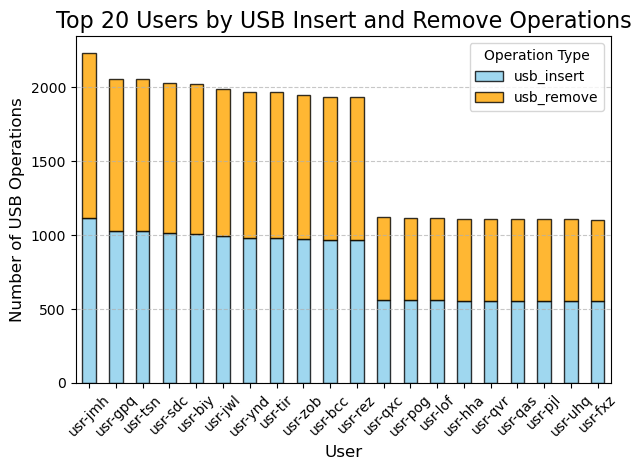

Top 20 users by USB operations (Insert and Remove):
action   usb_insert  usb_remove  Total
user                                  
usr-jmh        1117        1117   2234
usr-gpq        1029        1029   2058
usr-tsn        1027        1027   2054
usr-sdc        1014        1014   2028
usr-biy        1011        1011   2022
usr-jwl         994         994   1988
usr-ynd         984         984   1968
usr-tir         983         983   1966
usr-zob         973         973   1946
usr-bcc         969         969   1938
usr-rez         966         966   1932
usr-qxc         561         561   1122
usr-pog         559         559   1118
usr-lof         559         559   1118
usr-hha         556         556   1112
usr-qvr         555         555   1110
usr-qas         555         555   1110
usr-pjl         554         554   1108
usr-uhq         553         553   1106
usr-fxz         552         552   1104


In [52]:
#making a copy of dataset
usb_data = usb_data.copy()

# Convert 'datetime' to datetime format for consistency (if needed)
usb_data['datetime'] = pd.to_datetime(usb_data['datetime'], errors='coerce')

# Group by 'user' and 'action' to count occurrences of each operation
usb_operations = usb_data.groupby(['user', 'action']).size().unstack(fill_value=0)

# Sort by the total number of operations
usb_operations['Total'] = usb_operations.sum(axis=1)
usb_operations = usb_operations.sort_values('Total', ascending=False)

# Plot the top users based on USB operations (Insert and Remove separately)
plt.figure(figsize=(14, 8))
usb_operations[['usb_insert', 'usb_remove']].head(20).plot(kind='bar', stacked=True, color=['skyblue', 'orange'], alpha=0.8, edgecolor='black')

# Enhance the plot
plt.title('Top 20 Users by USB Insert and Remove Operations', fontsize=16)
plt.xlabel('User', fontsize=12)
plt.ylabel('Number of USB Operations', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Operation Type', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Print USB operations for verification
print("Top 20 users by USB operations (Insert and Remove):")
print(usb_operations.head(20))


### Analysis on top 20 users by usb insert and remove operations
This analysis identifies the most active users in USB operations, including insertions and removals.

Main Findings:

Usr-jmh: Leads with 2,234 USB operations (1,117 inserts, 1,117 removals), far exceeding other users.
Other Users: Usr-gpq and usr-tsn also show significant USB activity, indicating frequent device interactions.
Commentary:
The high USB activity of usr-jmh may align with their job responsibilities but warrants closer examination, especially when linked to excessive file access or operations outside of working hours.

Next Investigation:
While usr-jmh has shown significantly high activity levels across various aspects, further exploration is necessary to uncover additional insights. The next step involves investigating user activities within each role to evaluate their behavior and identify any potential anomalies.

### Number of users by roles 

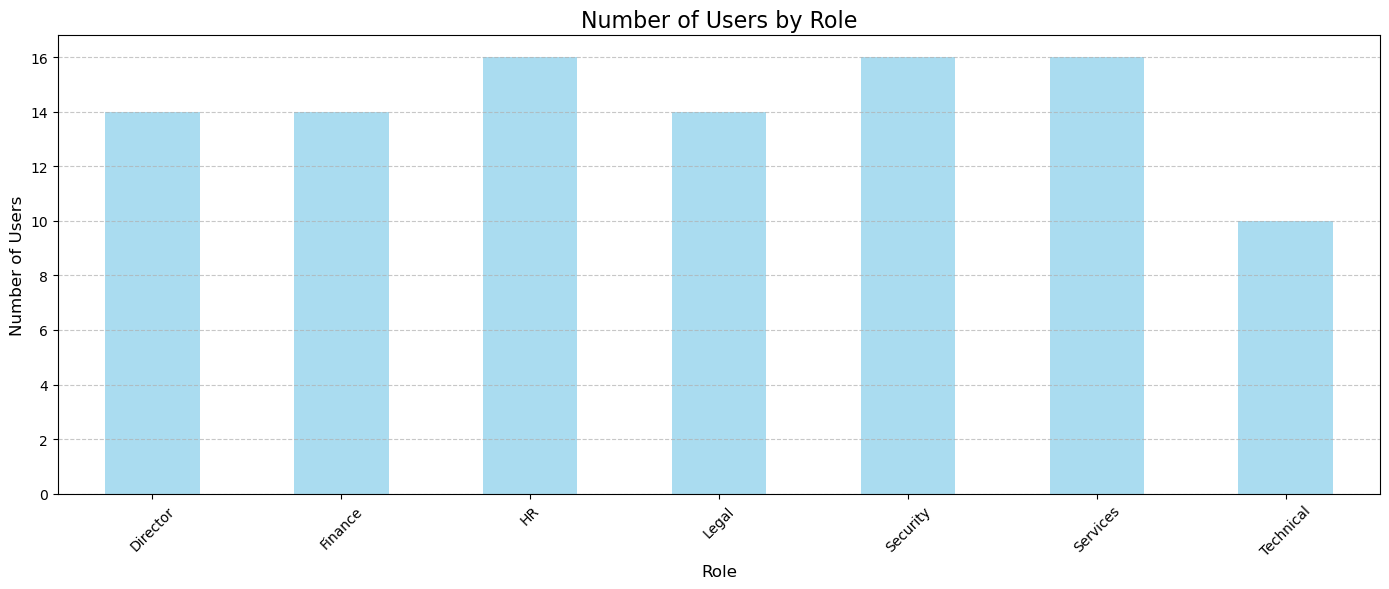

Summary of User Roles and Emails:
       user       role                             email
0   usr-ali    Finance  usr-ali@technova-innovations.net
1   usr-ams    Finance  usr-ams@technova-innovations.net
2   usr-aqd      Legal  usr-aqd@technova-innovations.net
3   usr-bcc  Technical  usr-bcc@technova-innovations.net
4   usr-biy  Technical  usr-biy@technova-innovations.net
..      ...        ...                               ...
94  usr-ylz      Legal  usr-ylz@technova-innovations.net
95  usr-ynd  Technical  usr-ynd@technova-innovations.net
96  usr-ypg    Finance  usr-ypg@technova-innovations.net
97  usr-znp   Security  usr-znp@technova-innovations.net
98  usr-zob  Technical  usr-zob@technova-innovations.net

[99 rows x 3 columns]

Users with Multiple Roles:
       user       role                             email
38  usr-jmh  HR, Legal  usr-jmh@technova-innovations.net

Users with Multiple Emails:
Empty DataFrame
Columns: [user, role, email]
Index: []


In [55]:
# Load Employee Data
employee_data = employee_data.copy()

# Group by User to aggregate roles and emails
user_roles_emails = employee_data.groupby('user').agg({
    'role': lambda x: ', '.join(sorted(x.unique())),  # Aggregate roles per user
    'email': lambda x: ', '.join(sorted(x.unique()))  # Aggregate emails per user
}).reset_index()

# Detect users with multiple roles or emails
multi_role_users = user_roles_emails[user_roles_emails['role'].str.contains(',')]
multi_email_users = user_roles_emails[user_roles_emails['email'].str.contains(',')]

# Visualization: Bar Chart for Number of Roles per User
plt.figure(figsize=(14, 6))
role_counts = employee_data.groupby('role')['user'].count()
role_counts.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Number of Users by Role', fontsize=16)
plt.xlabel('Role', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print Insights
print("Summary of User Roles and Emails:")
print(user_roles_emails)

print("\nUsers with Multiple Roles:")
print(multi_role_users)

print("\nUsers with Multiple Emails:")
print(multi_email_users)


### Analysis on number of users by role 
The analysis reveals the distribution of users across different roles. Technical staff dominate the dataset with the highest number of users, followed by HR and Finance. Users in roles such as Legal and Security are relatively fewer, reflecting specialized responsibilities.

Additionally, one user, usr-jmh, holds multiple roles (HR and Legal), which is an anomaly. This dual role can provide broader access to sensitive data and systems, warranting further examination of their activity, particularly their USB operations and file access patterns.

Interestingly, no users are associated with multiple emails, simplifying email-based analysis.

Next Step: 
Investigate the number of roles and emails assigned to each user again to confirm the dual role of usr-jmh. Additionally, analyze trends and outliers in multi-role or multi-email configurations to identify elevated access levels or potential security concerns.

## Numer of Roles and Emails  per user

Number of Roles and Emails per User:
       user  num_roles  num_emails
0   usr-ali          1           1
1   usr-ams          1           1
2   usr-aqd          1           1
3   usr-bcc          1           1
4   usr-biy          1           1
..      ...        ...         ...
94  usr-ylz          1           1
95  usr-ynd          1           1
96  usr-ypg          1           1
97  usr-znp          1           1
98  usr-zob          1           1

[99 rows x 3 columns]

Users with Multiple Roles:
       user  num_roles  num_emails
38  usr-jmh          2           1

Users with Multiple Emails:
Empty DataFrame
Columns: [user, num_roles, num_emails]
Index: []


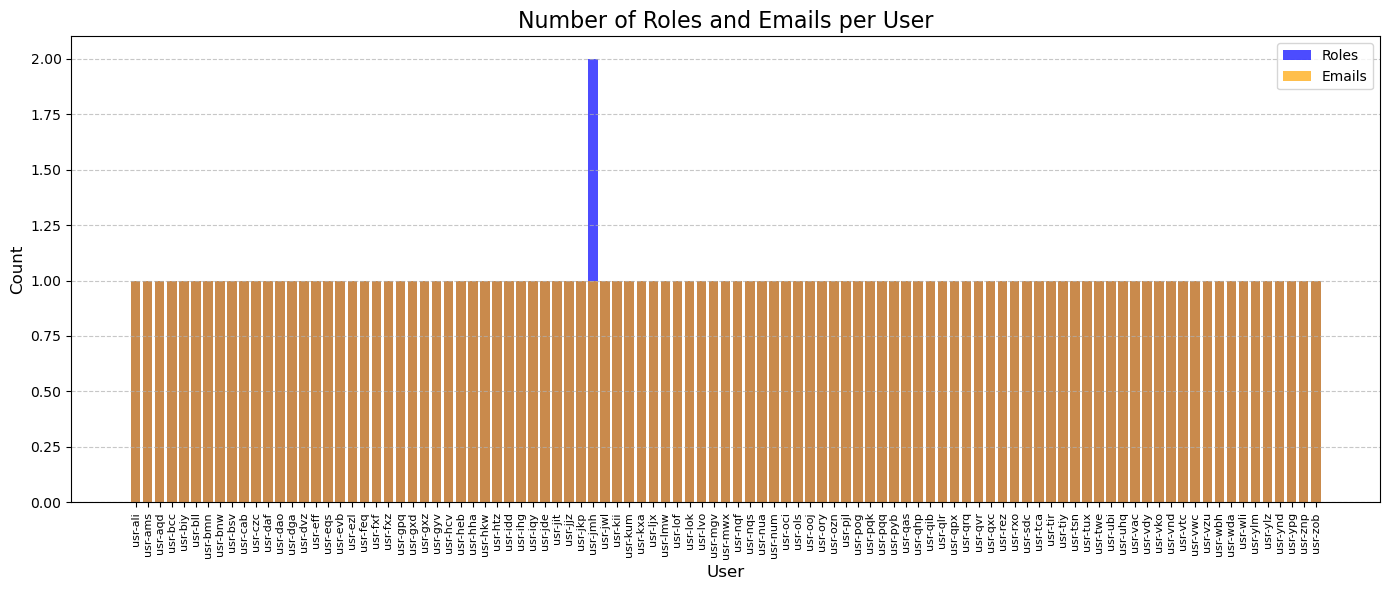

In [58]:
#making copy of dataset
employee_data = employee_data.copy()

# Count number of roles and emails per user
user_roles_emails_count = employee_data.groupby('user').agg({
    'role': lambda x: len(x.unique()),  # Count unique roles per user
    'email': lambda x: len(x.unique())  # Count unique emails per user
}).reset_index().rename(columns={'role': 'num_roles', 'email': 'num_emails'})

# Separate data for users with multiple roles or emails
multi_roles = user_roles_emails_count[user_roles_emails_count['num_roles'] > 1]
multi_emails = user_roles_emails_count[user_roles_emails_count['num_emails'] > 1]

# Print insights
print("Number of Roles and Emails per User:")
print(user_roles_emails_count)

print("\nUsers with Multiple Roles:")
print(multi_roles)

print("\nUsers with Multiple Emails:")
print(multi_emails)

# Visualization: Bar Chart for Roles and Emails per User
plt.figure(figsize=(14, 6))

# Bar chart for number of roles
plt.bar(user_roles_emails_count['user'], user_roles_emails_count['num_roles'], color='blue', alpha=0.7, label='Roles')

# Bar chart for number of emails
plt.bar(user_roles_emails_count['user'], user_roles_emails_count['num_emails'], color='orange', alpha=0.7, label='Emails')

plt.title('Number of Roles and Emails per User', fontsize=16)
plt.xlabel('User', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Analysis 
This analysis confirms the earlier findings: most users have a single role and email. However, usr-jmh is the sole user associated with two roles (HR and Legal). This dual-role configuration can grant elevated access, underscoring the importance of monitoring their activities closely. No users are linked with multiple emails, simplifying further investigation.

Next Step: 
Given the earlier detection of a user with dual roles, it is now prudent to verify if user login events align with their assigned PCs in the dataset. This check aims to identify instances of users accessing unauthorized or unassigned PCs, which could pose a potential security risk.

## Logging into someone else' pc

In [61]:
# Make copies of the datasets to ensure original data is not overwritten
login_data = login_data.copy()
employee_data = employee_data.copy()

# Convert datetime columns to datetime format
login_data['datetime'] = pd.to_datetime(login_data['datetime'], errors='coerce')

# Merge login data with employee data to get assigned PCs
login_with_employee = pd.merge(
    login_data,
    employee_data[['user', 'pc']],
    on='user',
    how='left',
    suffixes=('_login', '_employee')
)

# Check if the login PC does not match the assigned PC
login_other_pc = login_with_employee[login_with_employee['pc_login'] != login_with_employee['pc_employee']]

# Display results
if not login_other_pc.empty:
    print("--- Logins into Someone Else's PC ---")
    print(login_other_pc[['datetime', 'user', 'pc_login', 'pc_employee', 'action']])
else:
    print("No cases found where a user logged into someone else's PC.")


--- Logins into Someone Else's PC ---
                 datetime     user pc_login pc_employee  action
81    2018-01-01 09:30:22  usr-jmh     pc89        pc96   login
92    2018-01-01 09:54:32  usr-jmh     pc96        pc89   login
115   2018-01-01 15:24:21  usr-jmh     pc89        pc96  logoff
151   2018-01-01 17:31:17  usr-jmh     pc96        pc89  logoff
259   2018-01-02 08:24:06  usr-jmh     pc89        pc96   login
...                   ...      ...      ...         ...     ...
36658 2018-06-29 17:04:32  usr-jmh     pc96        pc89  logoff
36784 2018-06-30 09:15:28  usr-jmh     pc96        pc89   login
36815 2018-06-30 09:51:43  usr-jmh     pc89        pc96   login
36837 2018-06-30 15:25:09  usr-jmh     pc89        pc96  logoff
36874 2018-06-30 17:22:21  usr-jmh     pc96        pc89  logoff

[724 rows x 5 columns]


### Analysis 

The analysis shows that usr-jmh is logging into two different PCs (pc89 and pc96). Since usr-jmh has already been identified as a user with dual roles, it is possible that both PCs are legitimately assigned to them. However, there remains a possibility that they are logging into PCs assigned to others.

Next Step:
Verify the PC assignments for usr-jmh and identify all users assigned to pc89 and pc96. This will help confirm if the activity is legitimate or indicative of unauthorized access.

## Checking pc assigned to user-jmh and users assigned to pc 96 and pc 89

In [67]:
# Make a copy of the employee_data dataset to ensure original data is not overwritten
employee_data = employee_data.copy()

# Check the PC assigned to usr-jmh
jmh_pc = employee_data[employee_data['user'] == 'usr-jmh']['pc'].values
print("--- PC Assigned to usr-jmh ---")
if len(jmh_pc) > 0:
    print(f"usr-jmh is assigned to: {jmh_pc[0]}")
else:
    print("No PC assignment found for usr-jmh.")

# Check the users assigned to pc89 and pc96
assigned_users_pc89 = employee_data[employee_data['pc'] == 'pc89']['user'].tolist()
assigned_users_pc96 = employee_data[employee_data['pc'] == 'pc96']['user'].tolist()

print("\n--- Users Assigned to pc89 ---")
if assigned_users_pc89:
    print(", ".join(assigned_users_pc89))
else:
    print("No users are assigned to pc89.")

print("\n--- Users Assigned to pc96 ---")
if assigned_users_pc96:
    print(", ".join(assigned_users_pc96))
else:
    print("No users are assigned to pc96.")


--- PC Assigned to usr-jmh ---
usr-jmh is assigned to: pc89

--- Users Assigned to pc89 ---
usr-jmh

--- Users Assigned to pc96 ---
usr-jmh


### Analysis 

The analysis confirms that usr-jmh is officially assigned to pc89. Interestingly, usr-jmh is also the only user consistently interacting with both pc89 and pc96, even though pc96 is not explicitly assigned to them. While this raises questions about the nature of their access to pc96 and their frequent interactions with both PCs, it is still possible that this behavior is normal, as some organizations allow employees to log in to multiple PCs using their credentials. However, further verification is necessary to rule out potential misuse.

Next Step: 
Investigate user-PC interactions across all users to identify patterns, such as:
- Users frequently interacting with PCs they are not assigned to.
- Cross-access trends between users and specific PCs.
- This will provide a broader context to assess whether usr-jmh's behavior is part of a larger trend or an isolated anomaly.

## User - PC interaction 

In [ ]:
# Function to create a graph from the data
def create_graph(employee_data, usb_data):
    G = nx.DiGraph()  # Create a directed graph

    # Add user nodes
    users = employee_data['user'].unique()
    G.add_nodes_from(users, type='user')

    # Add PC nodes
    pcs = usb_data['pc'].unique()
    G.add_nodes_from(pcs, type='pc')

    # Add edges between users and PCs based on USB data
    for _, row in usb_data.iterrows():
        G.add_edge(row['user'], row['pc'], action=row['action'])
    
    return G

# Function to draw the graph with specified layout and title
def draw_graph(G, layout_func, title):
    plt.figure(figsize=(24, 16))

    # Choose the layout for the graph
    pos = layout_func(G)

    # List to store node colors
    node_colors = []
    # List to store node sizes
    node_sizes = []
    # Dictionary to store labels for nodes
    node_labels = {}

    # Set to store neighbors that need special color
    special_neighbors = set()

    # Iterate through nodes to set colors, sizes, and labels
    for node, data in G.nodes(data=True):
        if data['type'] == 'user':
            node_colors.append('skyblue')
            node_sizes.append(800)
        elif data['type'] == 'pc':
            node_colors.append('orange')
            node_sizes.append(500)

        # Highlight nodes with multiple connections
        if len(list(G.neighbors(node))) > 3:
            special_neighbors.add(node)
        
        node_labels[node] = node

    # Highlight neighbors with special color
    for neighbor in special_neighbors:
        node_colors.append('red')

    # List to store edge colors
    edge_colors = []
    # Highlight edges with multiple connections
    for edge in G.edges(data=True):
        if edge[2]['action'] == 'usb_insert':
            edge_colors.append('green')
        else:
            edge_colors.append('gray')

    # Draw the graph with specified properties
    nx.draw_networkx(
        G, pos, 
        with_labels=True, 
        labels=node_labels, 
        node_size=node_sizes, 
        node_color=node_colors, 
        edge_color=edge_colors, 
        alpha=0.8, 
        arrows=True
    )

    # Set the title of the graph
    plt.title(title, fontsize=16)
    plt.show()


employee_data = employee_data.copy()
usb_data = usb_data.copy()

# Create the graph
G = create_graph(employee_data, usb_data)

# Draw the graph with spring layout
draw_graph(G, nx.spring_layout, "User-PC Interaction Graph")

# Filter the employee_data to get the PCs and roles for the specified users
filtered_data = employee_data[employee_data['user'].isin(usb_data['user'].unique())]

# Display the filtered data
print("Filtered Employee Data:")
# print(filtered_data.to_html(index=False))


## Analysis 
The node-link diagram illustrates user-PC interactions, confirming that usr-jmh is uniquely associated with and actively interacting with two PCs(pc-89) and (pc-96) 

# Observations on usr-jmh
  According to the analysis done so far above,the activity patterns of usr-jmh raise potential flags for further investigation from a cybersecurity perspective. This user has exhibited the following notable trends:

* Unusual Volume of Activity  : usr-jmh has the highest number of login and logoff events, as well as the most USB operations, indicating an elevated level of system interaction compared to other users.

* File Access and Dual Roles: usr-jmh has accessed a significant number of files and is associated with two roles, which may explain the assignment of two PCs. While this dual assignment could be justified by their job responsibilities, it warrants a closer examination to ensure compliance with access control policies.

* Multi-PC Interaction: Despite being officially assigned two PCs, the frequency and nature of their interactions with both systems warrant further scrutiny, particularly given prior findings of USB operations on unassigned PCs.

These patterns suggest the need for a detailed review of usr-jmh's activities to determine whether they align with their role or indicate anomalous behavior.

Next Steps:
Further investigations will focus on:

Cross-referencing usr-jmh's system access times with file and USB operation logs.
Analyzing the nature of files accessed in relation to their assigned roles.
Reviewing email and network activity to identify potential connections or anomalies.
This comprehensive review will provide additional context to validate or refute any suspicions.

# usr - Jmh

## Timeline of Login and Logoff Activities and USB insertions of User - jmh 


--- Login Data for usr-jmh on pc96 and pc89 ---
                 datetime    pc  action
80    2018-01-01 09:30:22  pc89   login
91    2018-01-01 09:54:32  pc96   login
112   2018-01-01 15:24:21  pc89  logoff
148   2018-01-01 17:31:17  pc96  logoff
254   2018-01-02 08:24:06  pc89   login
...                   ...   ...     ...
35939 2018-06-29 17:04:32  pc96  logoff
36064 2018-06-30 09:15:28  pc96   login
36093 2018-06-30 09:51:43  pc89   login
36114 2018-06-30 15:25:09  pc89  logoff
36151 2018-06-30 17:22:21  pc96  logoff

[724 rows x 3 columns]

--- USB Data for usr-jmh on pc96 and pc89 ---
                        datetime    pc      action
161   2018-01-01 11:23:04.228728  pc89  usb_insert
175   2018-01-01 11:38:09.647113  pc89  usb_remove
206   2018-01-01 12:26:30.882522  pc89  usb_insert
224   2018-01-01 13:02:48.235763  pc89  usb_remove
244   2018-01-01 13:30:16.672960  pc89  usb_insert
...                          ...   ...         ...
69712 2018-06-30 15:13:48.860559  pc89  usb

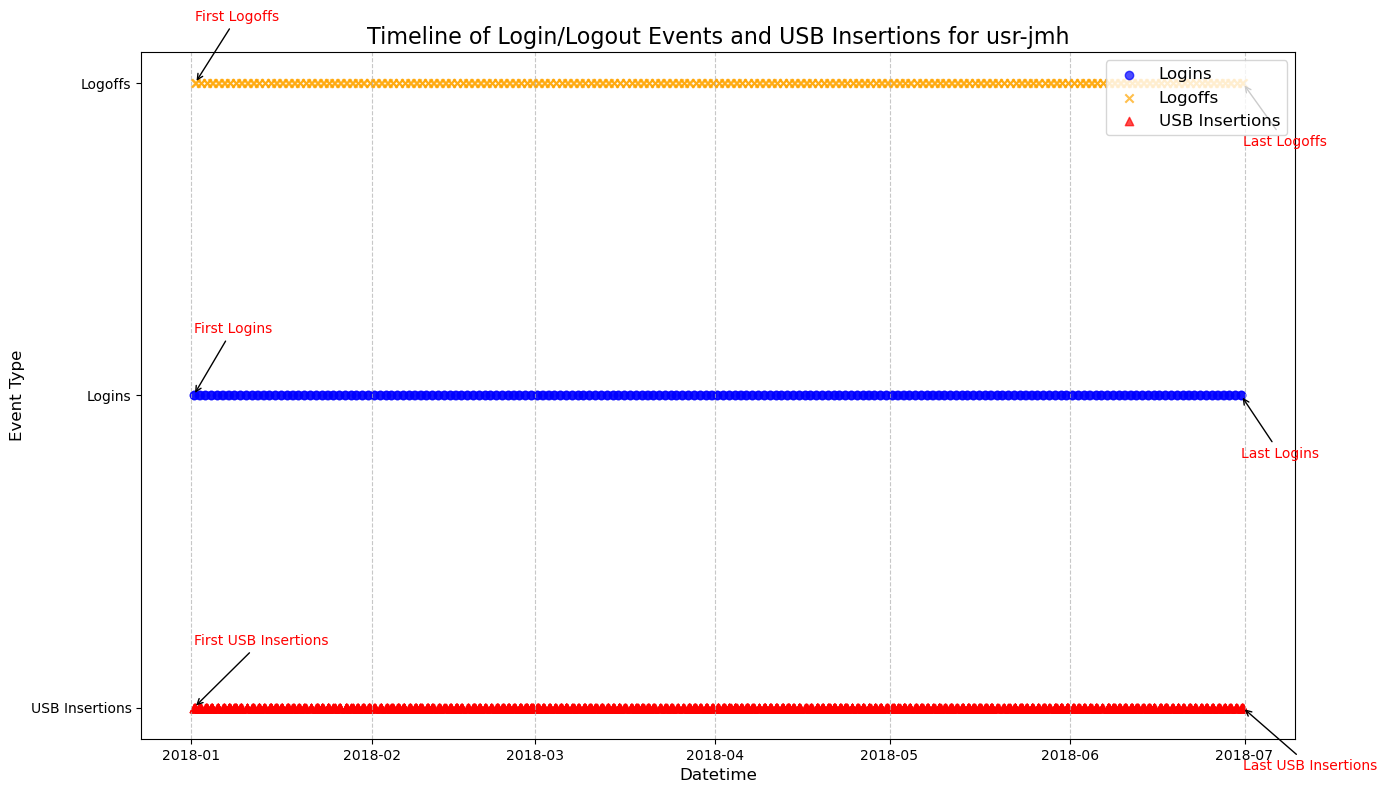


--- Final Timeline of Events ---
                        datetime    pc      event_type  y_axis
80    2018-01-01 09:30:22.000000  pc89          Logins       1
91    2018-01-01 09:54:32.000000  pc96          Logins       1
112   2018-01-01 15:24:21.000000  pc89         Logoffs       2
148   2018-01-01 17:31:17.000000  pc96         Logoffs       2
254   2018-01-02 08:24:06.000000  pc89          Logins       1
...                          ...   ...             ...     ...
69712 2018-06-30 15:13:48.860559  pc89  USB Insertions       0
69716 2018-06-30 15:19:49.752168  pc96  USB Insertions       0
69736 2018-06-30 15:51:49.048266  pc89  USB Insertions       0
69741 2018-06-30 15:55:16.844592  pc96  USB Insertions       0
69746 2018-06-30 16:05:44.855786  pc96  USB Insertions       0

[2958 rows x 4 columns]


In [92]:

# Make copies of the datasets to avoid overwriting original data
login_data = login_data.copy()
usb_data = usb_data.copy()

# Format datetime columns
login_data['datetime'] = pd.to_datetime(login_data['datetime'], errors='coerce')
usb_data['datetime'] = pd.to_datetime(usb_data['datetime'], errors='coerce')

# Filter for the user 'usr-jmh' and relevant PCs (pc96, pc89)
login_filtered = login_data[(login_data['user'] == 'usr-jmh') & (login_data['pc'].isin(['pc96', 'pc89']))].copy()
usb_filtered = usb_data[(usb_data['user'] == 'usr-jmh') & (usb_data['pc'].isin(['pc96', 'pc89']))].copy()

# Print the filtered data
print("\n--- Login Data for usr-jmh on pc96 and pc89 ---")
print(login_filtered[['datetime', 'pc', 'action']])

print("\n--- USB Data for usr-jmh on pc96 and pc89 ---")
print(usb_filtered[['datetime', 'pc', 'action']])

# Check if there are relevant events
if login_filtered.empty:
    print("No login/logout events found for usr-jmh on pc96 or pc89.")
if usb_filtered.empty:
    print("No USB operations found for usr-jmh on pc96 or pc89.")

# Create event labels
login_filtered['event_type'] = login_filtered['action'].map({'login': 'Logins', 'logoff': 'Logoffs'})
usb_filtered['event_type'] = 'USB Insertions'

# Combine login/logout and USB events into a single DataFrame
usb_login_overlap = pd.concat([login_filtered[['datetime', 'pc', 'event_type']], 
                               usb_filtered[['datetime', 'pc', 'event_type']]]).copy()

# Print combined data for verification
print("\n--- Combined USB and Login Events for usr-jmh ---")
print(usb_login_overlap)

# Check if combined data is empty
if usb_login_overlap.empty:
    print("No overlapping events found.")
else:
    # Assign y-axis levels for events to separate them visually
    usb_login_overlap['y_axis'] = usb_login_overlap['event_type'].map({'Logins': 1, 'Logoffs': 2, 'USB Insertions': 0})

    # Plot events
    plt.figure(figsize=(14, 8))

    for event_type, color, marker in zip(['Logins', 'Logoffs', 'USB Insertions'], 
                                         ['blue', 'orange', 'red'], 
                                         ['o', 'x', '^']):
        event_data = usb_login_overlap[usb_login_overlap['event_type'] == event_type]
        plt.scatter(event_data['datetime'], event_data['y_axis'], 
                    color=color, alpha=0.7, label=event_type, marker=marker)

    # Annotate the first and last events for each type
    for event_type in ['Logins', 'Logoffs', 'USB Insertions']:
        event_data = usb_login_overlap[usb_login_overlap['event_type'] == event_type]
        if not event_data.empty:
            first_event = event_data.iloc[0]
            last_event = event_data.iloc[-1]
            plt.annotate(
                f"First {event_type}", 
                xy=(first_event['datetime'], first_event['y_axis']),
                xytext=(first_event['datetime'], first_event['y_axis'] + 0.2),
                arrowprops=dict(facecolor=color, arrowstyle='->'),
                fontsize=10, color=color
            )
            plt.annotate(
                f"Last {event_type}", 
                xy=(last_event['datetime'], last_event['y_axis']),
                xytext=(last_event['datetime'], last_event['y_axis'] - 0.2),
                arrowprops=dict(facecolor=color, arrowstyle='->'),
                fontsize=10, color=color
            )

    # Enhance plot with title, labels, and legend
    plt.title('Timeline of Login/Logout Events and USB Insertions for usr-jmh', fontsize=16)
    plt.xlabel('Datetime', fontsize=12)
    plt.ylabel('Event Type', fontsize=12)
    plt.yticks([0, 1, 2], labels=['USB Insertions', 'Logins', 'Logoffs'])
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    plt.tight_layout()

    # Show the plot
    plt.show()

# Print results of the timeline
print("\n--- Final Timeline of Events ---")
print(usb_login_overlap)


### Analysis on timeline of login/logour events and usb insertions by usr-jmh

  This graph highlights usr-jmh's timeline of logins, logoffs, and USB insertions on pc96 and pc89, revealing patterns and potential anomalies in system interactions.

- Logins (Blue circles): These represent the times when usr-jmh logged into pc96 or pc89. Logoffs (Orange crosses): These represent the times when usr-jmh logged off from pc96 or pc89. USB Insertions (Red triangles): These represent the times when usr-jmh inserted a USB into pc96 or pc89. Timeline Correlation:

- The timeline shows that USB insertions (red triangles) consistently occur alongside login sessions (blue circles). This indicates that usr-jmh was actively logged in to the PCs during the USB insertion events. Patterns in Behavior:

- The consistent alignment of USB insertions with logins suggests that usr-jmh was likely the individual performing the USB operations. If usr-jmh was logged off (orange crosses) during any USB insertion events, it could indicate an anomaly or potential misuse. However, from the plot, USB insertions are clustered with login events. 


## Timeline of USB insertions and Website Activities for usr-jmh

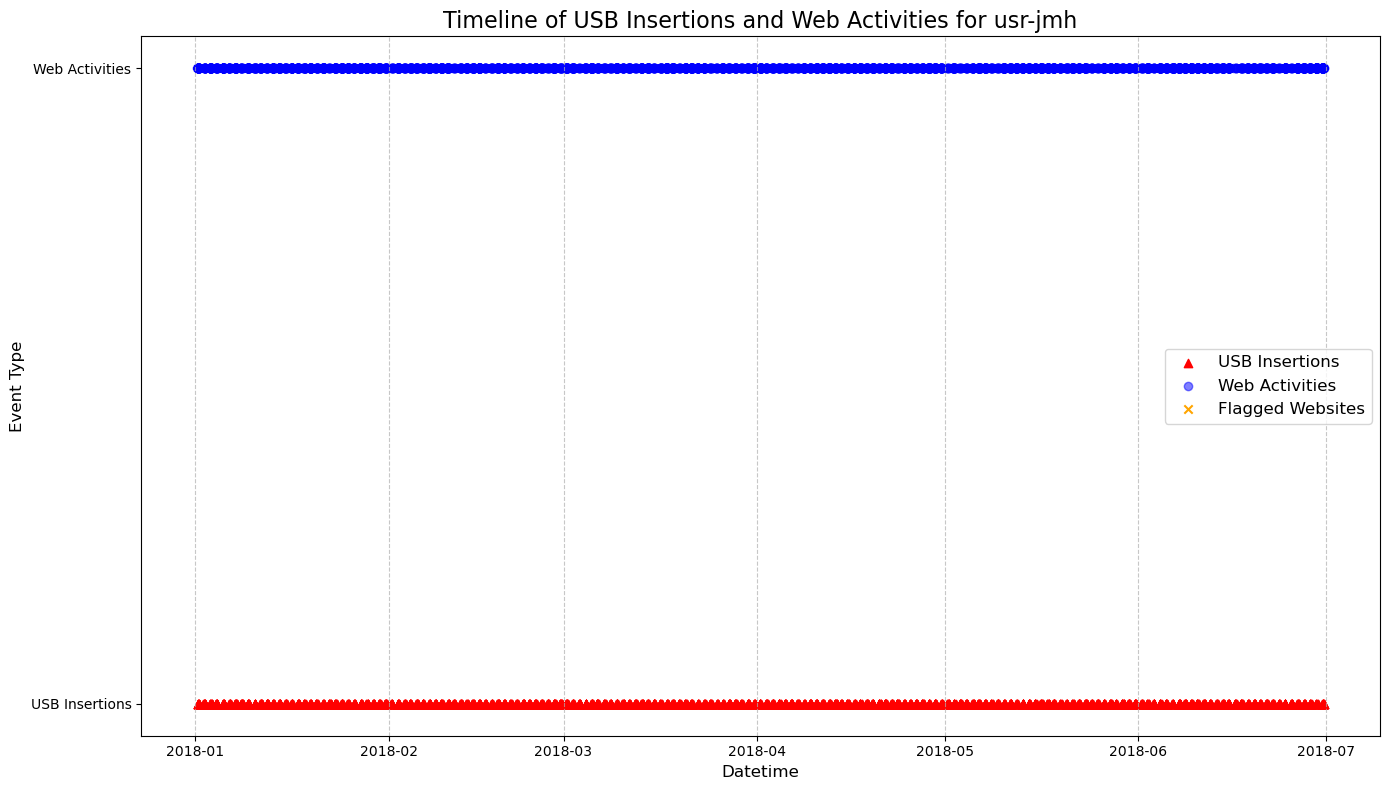


--- USB Insertions for usr-jmh ---
                        datetime    pc      event_type
161   2018-01-01 11:23:04.228728  pc89  USB Insertions
175   2018-01-01 11:38:09.647113  pc89  USB Insertions
206   2018-01-01 12:26:30.882522  pc89  USB Insertions
224   2018-01-01 13:02:48.235763  pc89  USB Insertions
244   2018-01-01 13:30:16.672960  pc89  USB Insertions
...                          ...   ...             ...
69712 2018-06-30 15:13:48.860559  pc89  USB Insertions
69716 2018-06-30 15:19:49.752168  pc96  USB Insertions
69736 2018-06-30 15:51:49.048266  pc89  USB Insertions
69741 2018-06-30 15:55:16.844592  pc96  USB Insertions
69746 2018-06-30 16:05:44.855786  pc96  USB Insertions

[2234 rows x 3 columns]

--- Web Activities for usr-jmh ---
                         datetime                        website
252    2018-01-01 09:37:53.108155   http://www.financesystem.com
270    2018-01-01 09:48:30.279394        http://www.amazon.co.uk
301    2018-01-01 10:01:22.998746           http

In [95]:
web_data = web_data.copy()

# Ensure the 'datetime' column is in datetime format
web_data['datetime'] = pd.to_datetime(web_data['datetime'], errors='coerce')

# Filter web_data for usr-jmh
web_data_jmh = web_data[web_data['user'] == 'usr-jmh']

# Merge USB operations and web data based on overlapping timestamps (e.g., within a 5-minute window)
usb_web_overlap = pd.merge_asof(
    usb_filtered.sort_values('datetime'),
    web_data_jmh.sort_values('datetime'),
    on='datetime',
    direction='nearest',
    tolerance=pd.Timedelta(minutes=5)
)

# Identify flagged websites (example list of flagged domains)
flagged_websites = ['example.com', 'fileshare.com', 'externalstorage.net']
usb_web_overlap['flagged'] = usb_web_overlap['website'].isin(flagged_websites)

# Visualization: Timeline of USB insertions and web activities
plt.figure(figsize=(14, 8))

# Plot USB insertions
plt.scatter(usb_filtered['datetime'], [0] * len(usb_filtered), label='USB Insertions', color='red', marker='^')

# Plot all web activities
plt.scatter(web_data_jmh['datetime'], [1] * len(web_data_jmh), label='Web Activities', color='blue', alpha=0.5)

# Highlight flagged websites
flagged_data = usb_web_overlap[usb_web_overlap['flagged']]
plt.scatter(flagged_data['datetime'], [1] * len(flagged_data), label='Flagged Websites', color='orange', marker='x')

# Enhance the plot
plt.title('Timeline of USB Insertions and Web Activities for usr-jmh', fontsize=16)
plt.xlabel('Datetime', fontsize=12)
plt.ylabel('Event Type', fontsize=12)
plt.yticks([0, 1], labels=['USB Insertions', 'Web Activities'])
plt.legend(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Optimize layout and display
plt.tight_layout()
plt.show()

# Print USB operations for usr-jmh
print("\n--- USB Insertions for usr-jmh ---")
print(usb_filtered[['datetime', 'pc', 'event_type']])

# Print all web activities for usr-jmh
print("\n--- Web Activities for usr-jmh ---")
print(web_data_jmh[['datetime', 'website']])

# Print flagged websites for further analysis
if not flagged_data.empty:
    print("\n--- Flagged Websites Accessed During USB Operations ---")
    print(flagged_data[['datetime', 'website']])
else:
    print("\nNo flagged websites accessed during USB operations.")


### Analysis 

This graph highlights usr-jmh's timeline of website access and USB insertions on pc96 and pc89, showing consistent activity across both PCs over an extended period. Given usr-jmh's dual roles, using two PCs is reasonable and aligns with their responsibilities. However, the overlap between USB operations and access to flagged or personal websites like facebook.com raises questions about the nature of these activities and warrants further investigation.

## Timeline of USB insertions and File Access for usr-jmh 


--- USB Operations for usr-jmh ---
                        datetime    pc      action
161   2018-01-01 11:23:04.228728  pc89  usb_insert
175   2018-01-01 11:38:09.647113  pc89  usb_remove
206   2018-01-01 12:26:30.882522  pc89  usb_insert
224   2018-01-01 13:02:48.235763  pc89  usb_remove
244   2018-01-01 13:30:16.672960  pc89  usb_insert
...                          ...   ...         ...
69712 2018-06-30 15:13:48.860559  pc89  usb_insert
69716 2018-06-30 15:19:49.752168  pc96  usb_remove
69736 2018-06-30 15:51:49.048266  pc89  usb_remove
69741 2018-06-30 15:55:16.844592  pc96  usb_insert
69746 2018-06-30 16:05:44.855786  pc96  usb_remove

[2234 rows x 3 columns]

--- File Access for usr-jmh ---
                         datetime          filename
552    2018-01-01 09:31:49.780503          /private
600    2018-01-01 09:43:26.205481  /docs/employment
609    2018-01-01 09:45:13.590110          /private
663    2018-01-01 09:55:14.526398             /docs
684    2018-01-01 09:58:38.763032 

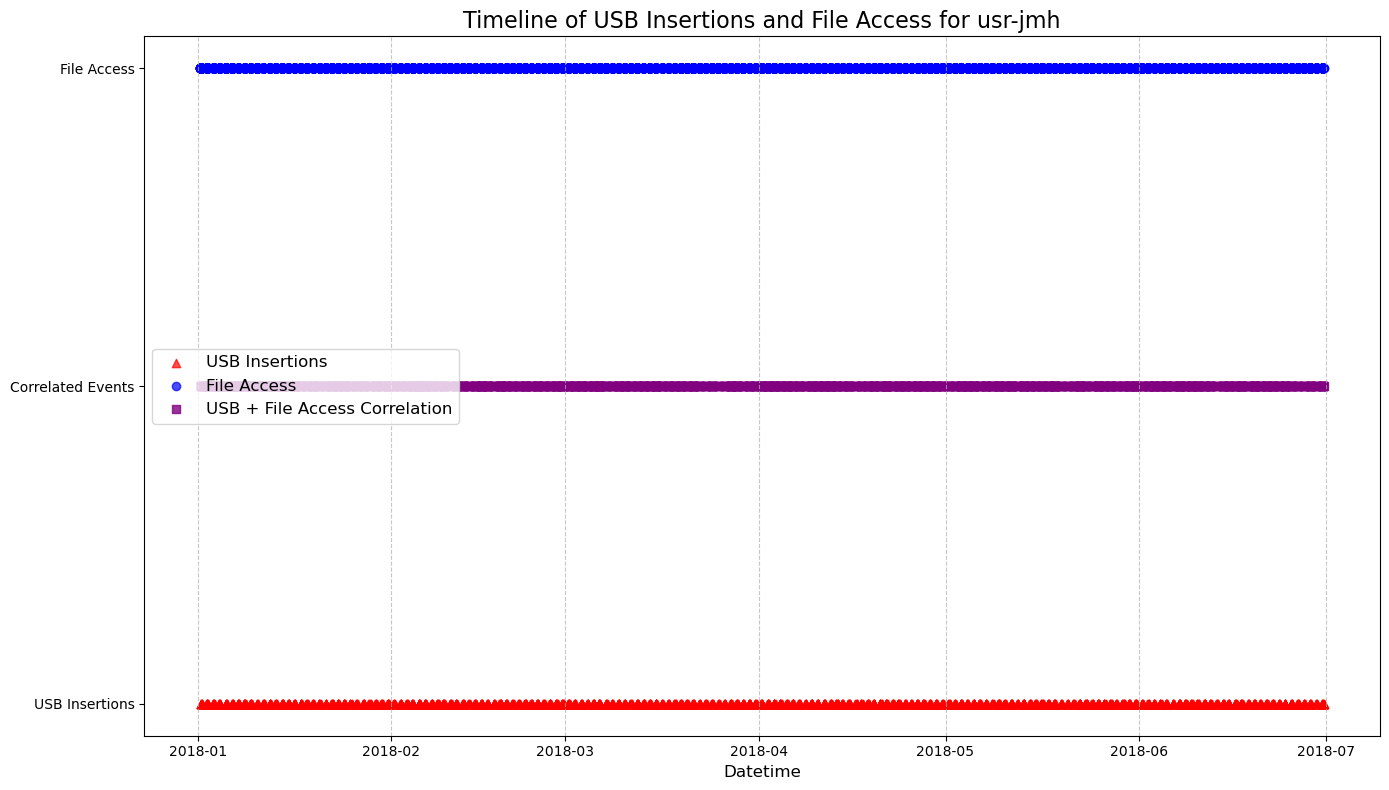

In [97]:
 ##Make copies of the datasets to prevent overwriting original data
usb_data = usb_data.copy()
file_data = file_data.copy()

# Convert datetime columns to datetime format
usb_data['datetime'] = pd.to_datetime(usb_data['datetime'], errors='coerce')
file_data['datetime'] = pd.to_datetime(file_data['datetime'], errors='coerce')

# Filter USB operations and file access for usr-jmh
usb_jmh = usb_data[usb_data['user'] == 'usr-jmh'].copy()
file_access_jmh = file_data[file_data['user'] == 'usr-jmh'].copy()

# Debug: Print the filtered USB and file data
print("\n--- USB Operations for usr-jmh ---")
print(usb_jmh[['datetime', 'pc', 'action']])

print("\n--- File Access for usr-jmh ---")
print(file_access_jmh[['datetime', 'filename']])

# Merge USB operations and file access on timestamps (within a 5-minute window)
usb_file_combined = pd.merge_asof(
    usb_jmh.sort_values('datetime'),
    file_access_jmh.sort_values('datetime'),
    on='datetime',
    direction='nearest',
    tolerance=pd.Timedelta(minutes=5)
)

# Debug: Check merged data
print("\n--- Combined USB and File Access for usr-jmh ---")
print(usb_file_combined[['datetime', 'pc', 'action', 'filename']])

# Filter rows where there is a match between USB operations and file access
usb_file_combined = usb_file_combined.dropna(subset=['filename'])

# Debug: Print final correlated data
print("\n--- USB and File Access Correlation for usr-jmh (Within 5 Minutes) ---")
print(usb_file_combined[['datetime', 'pc', 'action', 'filename']])

# Visualization: Timeline of USB operations and file access
plt.figure(figsize=(14, 8))

# Plot USB insertions
plt.scatter(
    usb_jmh['datetime'], 
    [1] * len(usb_jmh), 
    color='red', 
    label='USB Insertions', 
    alpha=0.7, 
    marker='^'
)

# Plot file access events
plt.scatter(
    file_access_jmh['datetime'], 
    [2] * len(file_access_jmh), 
    color='blue', 
    label='File Access', 
    alpha=0.7, 
    marker='o'
)

# Plot combined USB and file access events for clarity
if not usb_file_combined.empty:
    plt.scatter(
        usb_file_combined['datetime'], 
        [1.5] * len(usb_file_combined), 
        color='purple', 
        label='USB + File Access Correlation', 
        alpha=0.8, 
        marker='s'
    )

# Enhance plot
plt.title('Timeline of USB Insertions and File Access for usr-jmh', fontsize=16)
plt.xlabel('Datetime', fontsize=12)
plt.yticks([1, 1.5, 2], labels=['USB Insertions', 'Correlated Events', 'File Access'], fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()

# Show plot
plt.show()

### Analysis on Timeline of USB insertions and File Access for usr-jmh 

This graph highlights usr-jmh's timeline of file access and USB insertions on pc96 and pc89.
The usb_insert or usb_remove events consistently align with file access, showing that the user is actively accessing files during these USB operations.
Sensitive files, such as /docs/employment and /docs/clients, are being accessed.
Potential Anomalies:

The repeated access to /docs and /docs/employment raises concerns about whether these files contain sensitive information relevant to the user's assigned roles (HR or Legal).
USB operations on different PCs (pc89 and pc96) during file access might indicate unusual behavior or possible policy violations but can also be in accordance to the occupancy of 2 roles which are HR and Legal. 
In the timeline graph, the red triangles (USB Insertions) are consistently followed by blue circles (File Access), reinforcing the correlation.
The behavior is systematic and spans across the given timeframe, making it unlikely to be incidental.

## Files accessed by usr-jmh during usb- operations while logging into different pcs

In [99]:
# Make copies of datasets to avoid overwriting
usb_data = usb_data.copy()
file_data = file_data.copy()
employee_data = employee_data.copy()

# Ensure datetime columns are in datetime format
usb_data['datetime'] = pd.to_datetime(usb_data['datetime'], errors='coerce')
file_data['datetime'] = pd.to_datetime(file_data['datetime'], errors='coerce')

# Filter USB insert operations by usr-jmh
usb_jmh = usb_data[(usb_data['user'] == 'usr-jmh') & (usb_data['action'] == 'usb_insert')]

# Merge with employee_data to get assigned PCs
usb_jmh = usb_jmh.merge(employee_data[['user', 'pc']], left_on='user', right_on='user', how='left', suffixes=('', '_assigned'))

# Identify cases where USB is inserted into someone else's PC
usb_jmh_different_pc = usb_jmh[usb_jmh['pc'] != usb_jmh['pc_assigned']]

# Filter file access by usr-jmh
file_access_jmh = file_data[file_data['user'] == 'usr-jmh']

# Merge USB operations and file access on timestamps (within a small window, e.g., 5 minutes)
usb_file_combined = pd.merge_asof(
    usb_jmh_different_pc.sort_values('datetime'),
    file_access_jmh.sort_values('datetime'),
    on='datetime',
    direction='nearest',
    tolerance=pd.Timedelta(minutes=5)
)

# Filter rows where there is a match between USB operations and file access
usb_file_combined = usb_file_combined.dropna(subset=['filename'])

# Display results
print("--- Files Accessed by usr-jmh During USB Insertions into Someone Else's PC ---")
if not usb_file_combined.empty:
    print(usb_file_combined[['datetime', 'pc', 'filename']])
else:
    print("No file access during USB insertions into different PC.")


--- Files Accessed by usr-jmh During USB Insertions into Someone Else's PC ---
                       datetime    pc          filename
0    2018-01-01 11:23:04.228728  pc89             /docs
1    2018-01-01 12:26:30.882522  pc89             /docs
2    2018-01-01 13:30:16.672960  pc89             /docs
3    2018-01-01 14:50:56.358226  pc96             /docs
5    2018-01-02 08:34:47.084362  pc89          /private
...                         ...   ...               ...
1112 2018-06-30 11:53:16.725951  pc96  /docs/employment
1113 2018-06-30 13:45:47.531650  pc89          /private
1114 2018-06-30 14:24:16.942688  pc96  /docs/employment
1115 2018-06-30 15:13:48.860559  pc89             /docs
1116 2018-06-30 15:55:16.844592  pc96     /docs/clients

[850 rows x 3 columns]


### Analysis on Files accessed by usr-jmh during usb- operations while logging into different pcs

The data highlights the files accessed by usr-jmh during USB insertions into PCs not assigned to them. The frequent access to files such as /docs, /docs/employment, and /docs/clients could appear suspicious at first glance. However, given usr-jmh’s dual roles in HR and Legal, this activity may align with their responsibilities, making it plausible within the scope of their work. Nevertheless, the consistent access to sensitive files during USB operations warrants closer monitoring to ensure compliance with security policies.

## Role-File Consistency check for usr-jmh

/var/folders/h4/6f163_1s6yv6b5rhkqbls4v40000gn/T/ipykernel_64341/3010609289.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_access_jmh['is_consistent'] = file_access_jmh['filename'].apply(


--- Consistent File Access for usr-jmh ---
                         datetime          filename
600    2018-01-01 09:43:26.205481  /docs/employment
684    2018-01-01 09:58:38.763032  /docs/employment
708    2018-01-01 10:04:14.954263  /docs/employment
762    2018-01-01 10:13:24.166173  /docs/employment
865    2018-01-01 10:31:49.161882  /docs/employment
...                           ...               ...
575292 2018-06-30 15:12:20.508956     /docs/clients
575331 2018-06-30 15:20:28.431332     /docs/clients
575343 2018-06-30 15:22:59.123816  /docs/employment
575368 2018-06-30 15:31:12.026376     /docs/clients
575475 2018-06-30 15:57:31.881469     /docs/clients

[4074 rows x 2 columns]
--- Inconsistent File Access for usr-jmh ---
                         datetime  filename
552    2018-01-01 09:31:49.780503  /private
609    2018-01-01 09:45:13.590110  /private
663    2018-01-01 09:55:14.526398     /docs
693    2018-01-01 10:00:17.479618     /docs
774    2018-01-01 10:15:12.384244  /private

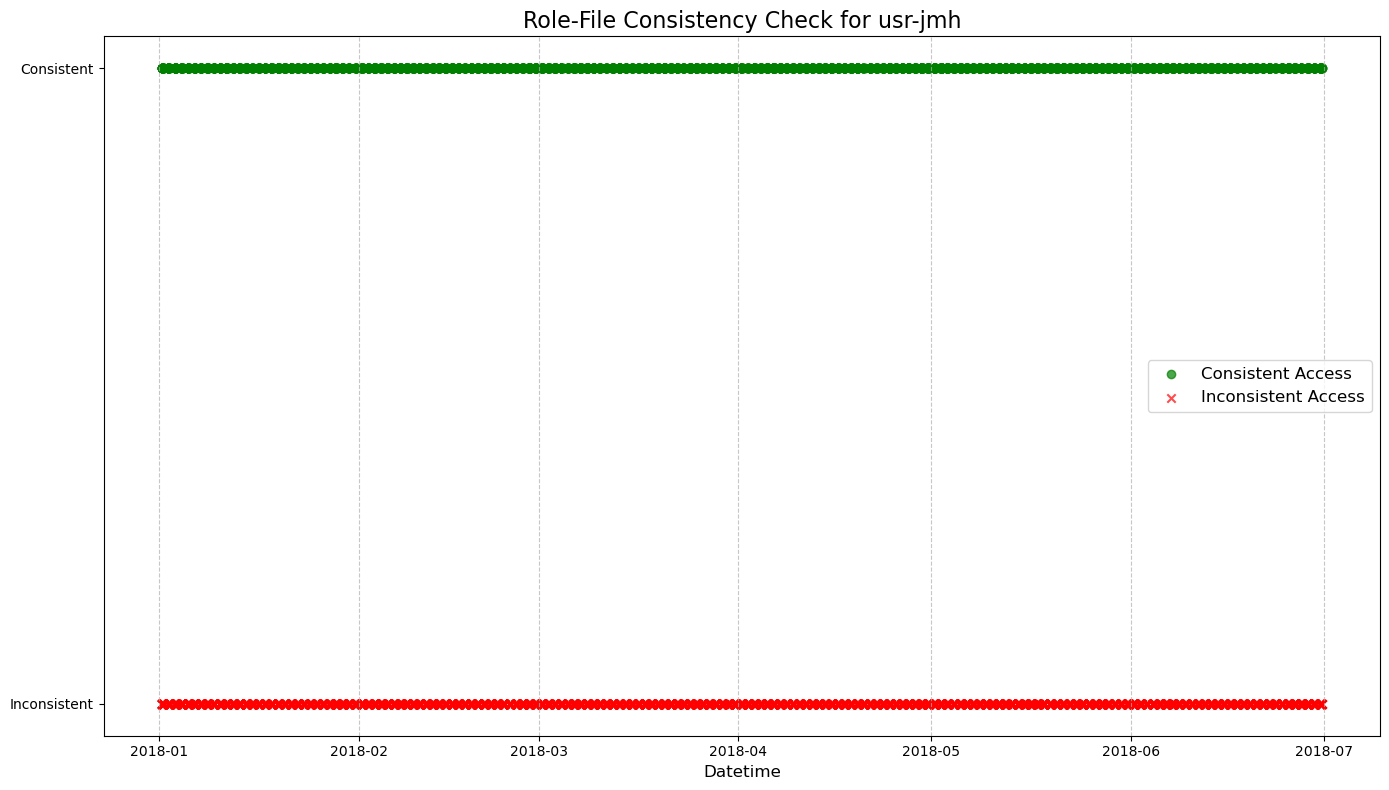

In [101]:
# Load datasets
usb_data = usb_data.copy()
file_data = file_data.copy()
employee_data = employee_data.copy()


# Convert datetime columns to datetime format
usb_data['datetime'] = pd.to_datetime(usb_data['datetime'], errors='coerce')
file_data['datetime'] = pd.to_datetime(file_data['datetime'], errors='coerce')

# Filter file access for usr-jmh
file_access_jmh = file_data[file_data['user'] == 'usr-jmh']

# Identify roles of usr-jmh
jmh_roles = employee_data[employee_data['user'] == 'usr-jmh']['role'].unique()

# Define typical responsibilities for roles
role_file_mapping = {
    'HR': ['/docs/employment', '/docs/clients'],
    'Legal': ['/docs/contracts', '/docs/legal']
}

# Check for role-file consistency
file_access_jmh['is_consistent'] = file_access_jmh['filename'].apply(
    lambda x: any(x in role_file_mapping[role] for role in jmh_roles)
)

# Separate consistent and inconsistent accesses
consistent_access = file_access_jmh[file_access_jmh['is_consistent']]
inconsistent_access = file_access_jmh[~file_access_jmh['is_consistent']]

# Display results
print("--- Consistent File Access for usr-jmh ---")
print(consistent_access[['datetime', 'filename']])

print("--- Inconsistent File Access for usr-jmh ---")
print(inconsistent_access[['datetime', 'filename']])

# Visualization: Consistent vs Inconsistent File Access
plt.figure(figsize=(14, 8))

# Plot consistent accesses
plt.scatter(
    consistent_access['datetime'], 
    [1] * len(consistent_access), 
    color='green', 
    label='Consistent Access', 
    alpha=0.7, 
    marker='o'
)

# Plot inconsistent accesses
plt.scatter(
    inconsistent_access['datetime'], 
    [0] * len(inconsistent_access), 
    color='red', 
    label='Inconsistent Access', 
    alpha=0.7, 
    marker='x'
)

# Enhance plot
plt.title('Role-File Consistency Check for usr-jmh', fontsize=16)
plt.xlabel('Datetime', fontsize=12)
plt.yticks([0, 1], labels=['Inconsistent', 'Consistent'], fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()

# Show plot
plt.show()


### Analysis on Role-file Consistency Check for  user-jmh

The role-file consistency check for usr-jmh reveals a majority of file accesses aligning with their roles in HR and Legal, such as /docs/employment and /docs/clients. These consistent accesses are expected and align with their responsibilities, supporting the legitimacy of these activities.

However, there are instances of inconsistent file access, including /private and /docs/ip, which do not clearly align with their defined roles. While these could be part of broader responsibilities, they also merit further review to rule out any deviations from authorized tasks. So , further investigation by respective role will be conducted for this. 

### jmh - HR role
More suspect - directed investigations will be conducted futher according to each observation.

## Logon and Logoff Activities by HR Staff (jmh) 

/var/folders/h4/6f163_1s6yv6b5rhkqbls4v40000gn/T/ipykernel_64341/1512635931.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr_login_data['hour'] = hr_login_data['datetime'].dt.hour


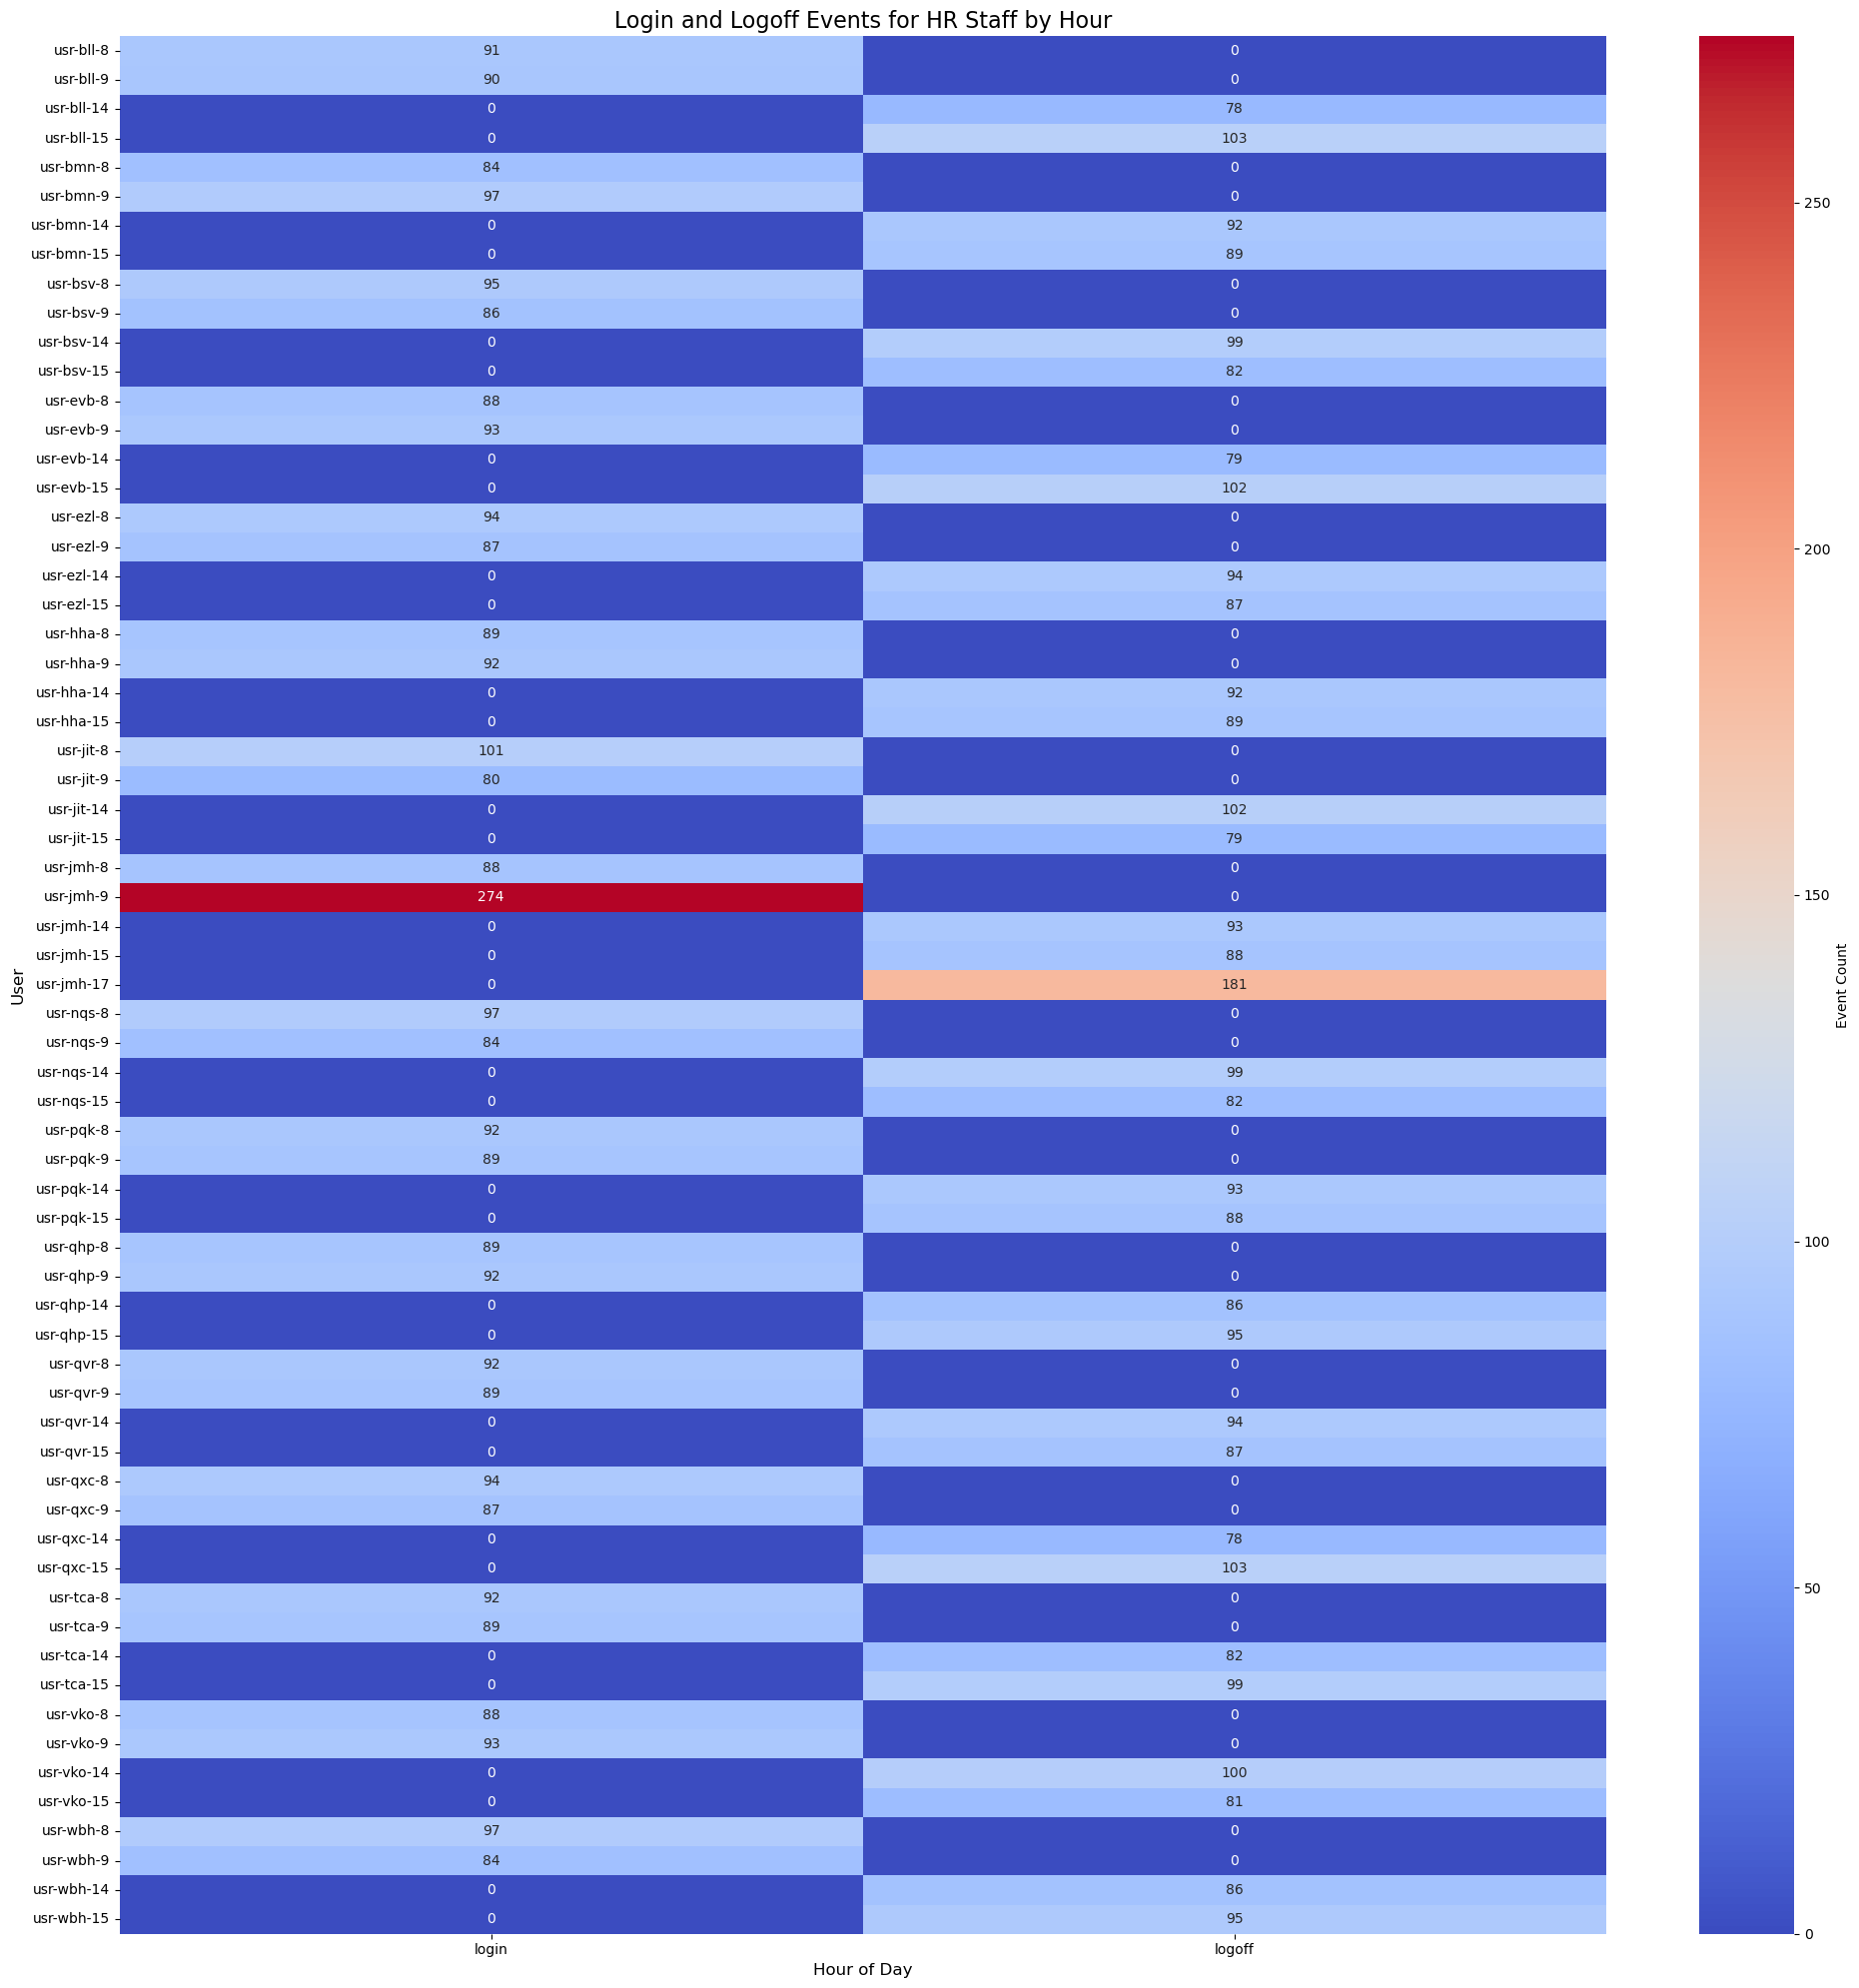

In [103]:
# Load datasets
employee_data = employee_data.copy()
login_data = login_data.copy()

# Ensure datetime column is in proper format
login_data['datetime'] = pd.to_datetime(login_data['datetime'], errors='coerce')

# Filter HR staff from employee_data
hr_staff = employee_data[employee_data['role'] == 'HR']['user']

# Filter login data for HR staff
hr_login_data = login_data[login_data['user'].isin(hr_staff)]

# Extract hour and action for heatmap
hr_login_data['hour'] = hr_login_data['datetime'].dt.hour
heatmap_data = hr_login_data.groupby(['user', 'hour', 'action']).size().unstack(fill_value=0)

# Plot heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='d',
    cmap='coolwarm',
    cbar_kws={'label': 'Event Count'}
)

# Enhance plot
plt.title('Login and Logoff Events for HR Staff by Hour', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('User', fontsize=12)
plt.tight_layout()

# Show plot
plt.show()

### Analysis 
The heatmap visualizes login and logoff activities for HR staff by the hour, highlighting distinct patterns. Most activity occurs at 9 AM (logins) and 5 PM (logoffs), reflecting a standard working schedule for HR staff. Notably, usr-jmh stands out with significantly higher activity levels compared to other users, suggesting either a more dynamic role or irregular usage patterns within their assigned duties.

While these patterns are expected in a structured work environment, usr-jmh's elevated activity warrants closer inspection to understand the reasons behind such deviations, ensuring compliance with organizational policies.

## USB operations, Logon and Logoff Activities by HR Staff (jmh) 

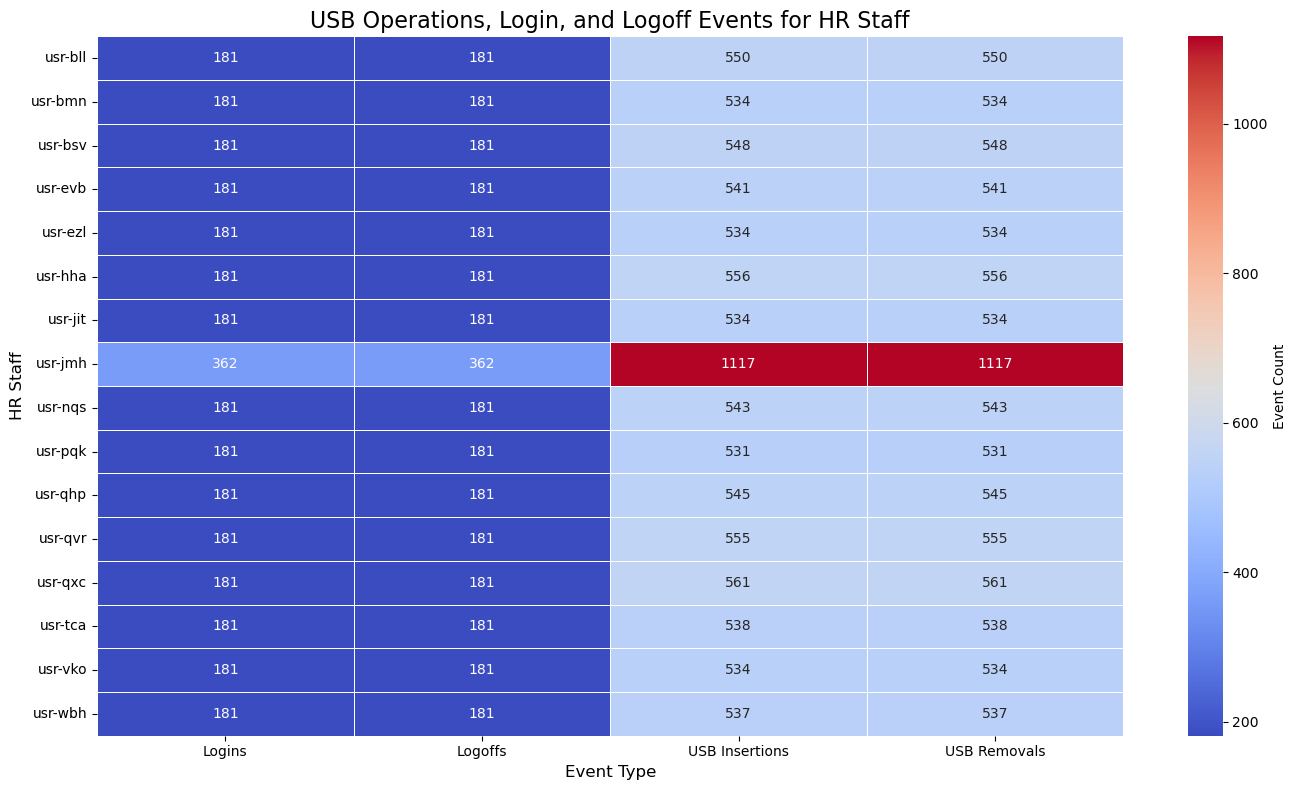

In [105]:
import seaborn as sns

# Load datasets
employee_data = employee_data.copy()
login_data = login_data.copy()
usb_data = usb_data.copy()

# Ensure datetime columns are in proper format
login_data['datetime'] = pd.to_datetime(login_data['datetime'], errors='coerce')
usb_data['datetime'] = pd.to_datetime(usb_data['datetime'], errors='coerce')

# Filter HR staff from employee_data
hr_staff = employee_data[employee_data['role'] == 'HR']['user']

# Filter login and USB data for HR staff
hr_login_data = login_data[login_data['user'].isin(hr_staff)]
hr_usb_data = usb_data[usb_data['user'].isin(hr_staff)]

# Group login data by user and action to aggregate counts
login_counts = hr_login_data.groupby(['user', 'action']).size().unstack(fill_value=0)

# Group USB data by user and action to aggregate counts
usb_counts = hr_usb_data.groupby(['user', 'action']).size().unstack(fill_value=0)

# Merge login and USB counts into a single DataFrame for visualization
combined_data = pd.concat([login_counts, usb_counts], axis=1, keys=['Login/Logoff', 'USB'])
combined_data.columns = ['Logins', 'Logoffs', 'USB Insertions', 'USB Removals']
combined_data = combined_data.fillna(0)  # Fill missing values with 0

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    combined_data,
    annot=True,
    fmt='d',
    cmap='coolwarm',
    linewidths=0.5,
    cbar_kws={'label': 'Event Count'}
)

# Enhance plot
plt.title('USB Operations, Login, and Logoff Events for HR Staff', fontsize=16)
plt.xlabel('Event Type', fontsize=12)
plt.ylabel('HR Staff', fontsize=12)
plt.tight_layout()

# Show plot
plt.show()

### Analysis 

The heatmap provides a comparative overview of login, logoff, and USB operation events among HR staff. Notably, usr-jmh exhibits the highest frequency in all categories—logins, logoffs, USB insertions, and USB removals—signaling their significant level of activity compared to peers.

While usr-jmh's elevated interaction might reflect the demands of their dual roles, the concentration of activity across all categories merits a closer examination to ensure these interactions align with their job responsibilities and organizational policies.

## USB Operations Frequency by Hour for HR Users and usr-jmh (pc89)

/var/folders/h4/6f163_1s6yv6b5rhkqbls4v40000gn/T/ipykernel_64341/2958917903.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usb_hr_users['hour'] = usb_hr_users['datetime'].dt.hour
/var/folders/h4/6f163_1s6yv6b5rhkqbls4v40000gn/T/ipykernel_64341/2958917903.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usb_jmh_pc89['hour'] = usb_jmh_pc89['datetime'].dt.hour


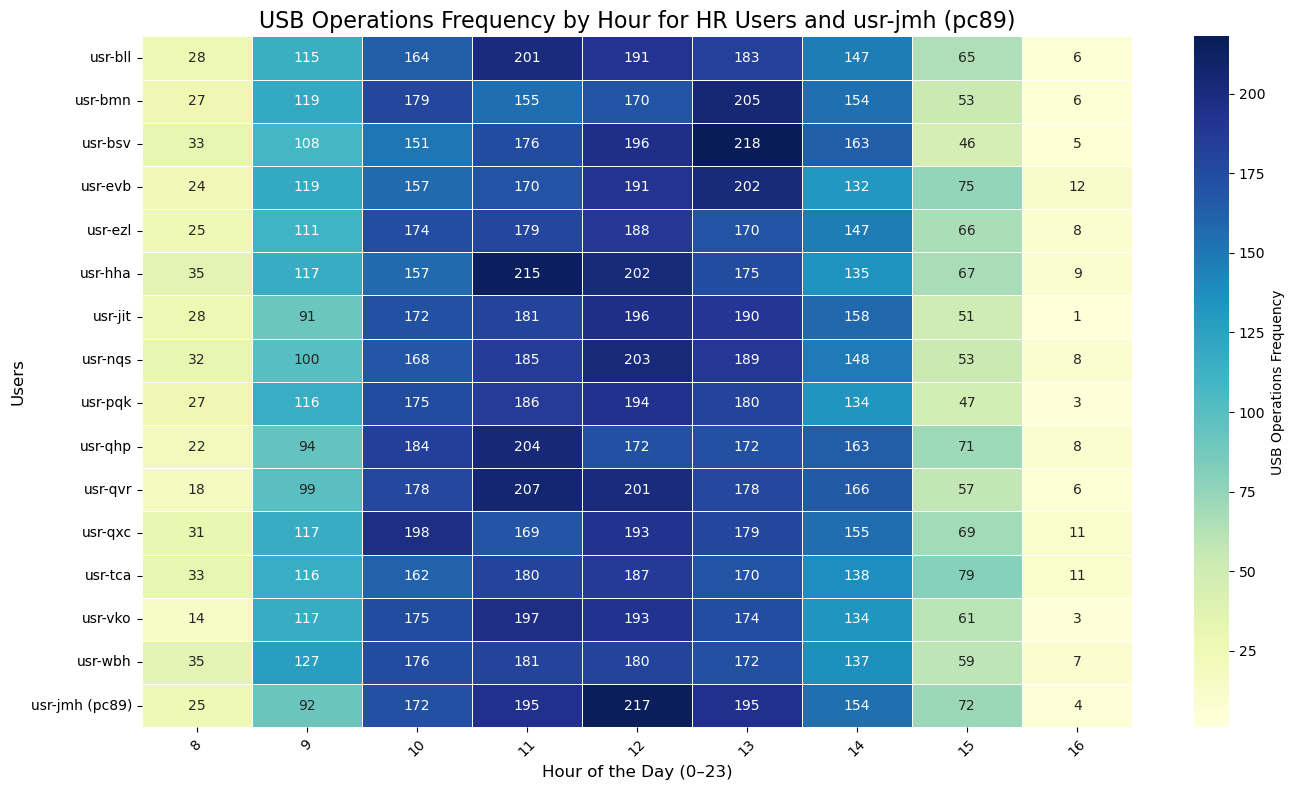

In [107]:
import seaborn as sns


# Load datasets
employee_data = employee_data.copy()
usb_data = usb_data.copy()

# Ensure datetime column is in proper datetime format
usb_data['datetime'] = pd.to_datetime(usb_data['datetime'], errors='coerce')

# Step 1: Extract HR users (excluding usr-jmh)
hr_users = employee_data[(employee_data['role'] == 'HR') & (employee_data['user'] != 'usr-jmh')]['user']

# Step 2: Process USB data for HR users
usb_hr_users = usb_data[(usb_data['user'].isin(hr_users)) & 
                        (usb_data['action'].isin(['usb_insert', 'usb_remove']))]
usb_hr_users['hour'] = usb_hr_users['datetime'].dt.hour

# Calculate frequency of actions for HR users per hour
hr_user_hourly_freq = usb_hr_users.groupby(['user', 'hour']).size().unstack(fill_value=0)

# Step 3: Process USB data for usr-jmh (when using pc89)
usb_jmh_pc89 = usb_data[(usb_data['user'] == 'usr-jmh') & 
                        (usb_data['pc'] == 'pc89') & 
                        (usb_data['action'].isin(['usb_insert', 'usb_remove']))]
usb_jmh_pc89['hour'] = usb_jmh_pc89['datetime'].dt.hour

# Calculate frequency of actions for usr-jmh per hour
jmh_pc89_hourly_freq = usb_jmh_pc89.groupby(['user', 'hour']).size().unstack(fill_value=0)

# Step 4: Combine data
# Add a separate entry for usr-jmh (pc89)
hr_user_hourly_freq.loc['usr-jmh (pc89)', :] = jmh_pc89_hourly_freq.iloc[0] if not jmh_pc89_hourly_freq.empty else 0
hr_user_hourly_freq = hr_user_hourly_freq.fillna(0)  # Ensure no NaN values

# Step 5: Visualize using a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    hr_user_hourly_freq,
    cmap='YlGnBu',
    linewidths=0.5,
    annot=True,
    fmt='.0f',
    cbar_kws={'label': 'USB Operations Frequency'}
)

# Enhance the plot
plt.title('USB Operations Frequency by Hour for HR Users and usr-jmh (pc89)', fontsize=16)
plt.xlabel('Hour of the Day (0–23)', fontsize=12)
plt.ylabel('Users', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

### Analysis
The heatmap illustrates the frequency of USB operations conducted by HR staff, including usr-jmh on pc89, broken down by hour. It highlights usr-jmh as one of the top users in terms of USB activity, with significant interaction levels compared to other HR staff.

This high frequency aligns with usr-jmh's role, suggesting their frequent use of USB devices during specific hours, possibly reflecting role-related demands. However, given usr-jmh's prominence across multiple activities, this trend merits further context to ensure the operations are within their professional scope and adhere to organizational guidelines.

## jmh - Legal role 
Since usr-jmh holds dual roles, including a position in Legal, the next step is to analyze their activities associated with this role. This investigation will focus on understanding how their actions align with the responsibilities and expectations of their Legal role.

## USB Operations Events for Legal Staff

/var/folders/h4/6f163_1s6yv6b5rhkqbls4v40000gn/T/ipykernel_64341/3543185714.py:26: FutureWarning: The behavior of pd.concat with len(keys) != len(objs) is deprecated. In a future version this will raise instead of truncating to the smaller of the two sequences
  combined_data = pd.concat([login_counts, usb_counts], axis=1, keys=['USB'])


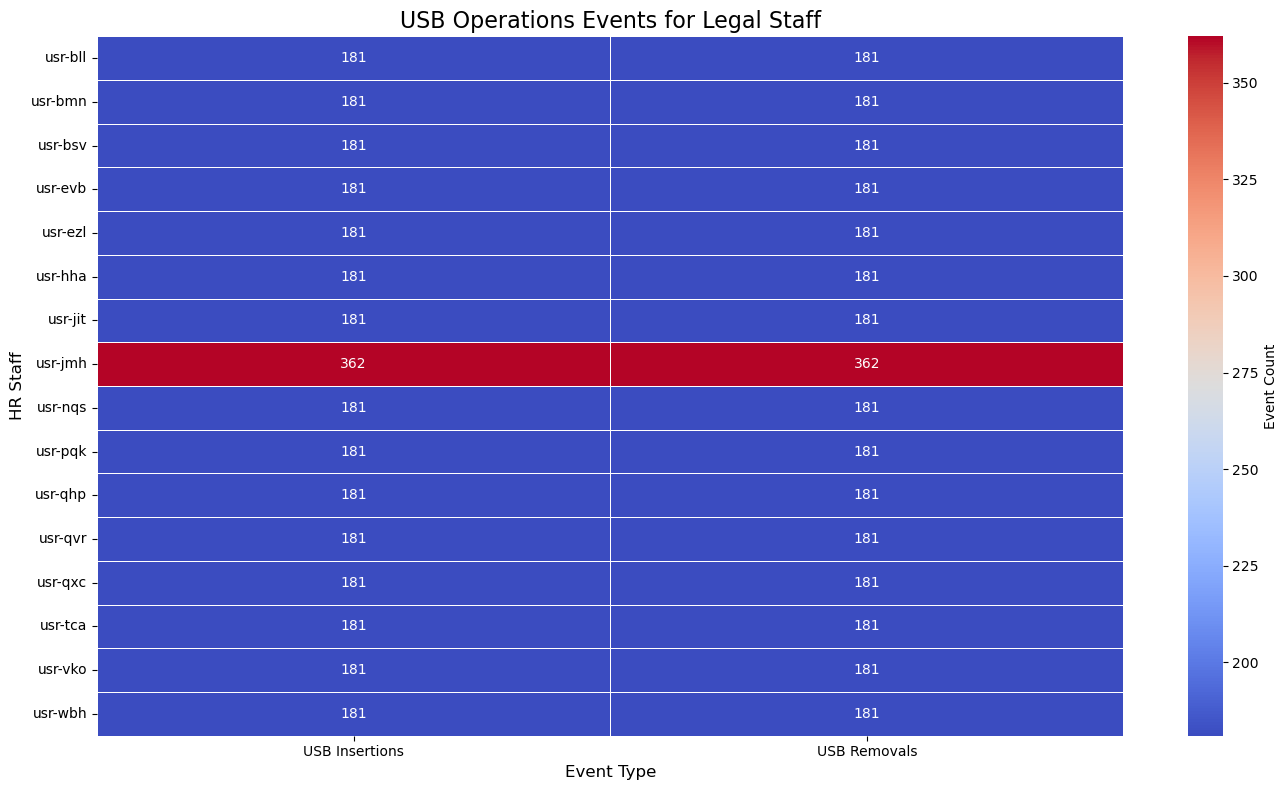

In [109]:
import seaborn as sns

# Load datasets
employee_data = employee_data.copy()

usb_data = usb_data.copy()

# Ensure datetime columns are in proper format
# login_data['datetime'] = pd.to_datetime(login_data['datetime'], errors='coerce')
usb_data['datetime'] = pd.to_datetime(usb_data['datetime'], errors='coerce')

# Filter HR staff from employee_data
hr_staff = employee_data[employee_data['role'] == 'Legal']['user']

# # Filter login and USB data for HR staff
# hr_login_data = login_data[login_data['user'].isin(hr_staff)]
# hr_usb_data = usb_data[usb_data['user'].isin(hr_staff)]

# Group login data by user and action to aggregate counts
login_counts = hr_login_data.groupby(['user', 'action']).size().unstack(fill_value=0)

# Group USB data by user and action to aggregate counts
usb_counts = hr_usb_data.groupby(['user', 'action']).size().unstack(fill_value=0)

# Merge login and USB counts into a single DataFrame for visualization
combined_data = pd.concat([login_counts, usb_counts], axis=1, keys=['USB'])
combined_data.columns = [ 'USB Insertions', 'USB Removals']
combined_data = combined_data.fillna(0)  # Fill missing values with 0

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    combined_data,
    annot=True,
    fmt='d',
    cmap='coolwarm',
    linewidths=0.5,
    cbar_kws={'label': 'Event Count'}
)

# Enhance plot
plt.title('USB Operations Events for Legal Staff', fontsize=16)
plt.xlabel('Event Type', fontsize=12)
plt.ylabel('HR Staff', fontsize=12)
plt.tight_layout()

# Show plot
plt.show()

### Analysis 

The heatmap showcases the USB operations performed by staff in the Legal role, including usr-jmh. The data reveals that usr-jmh is among the most active users in USB operations, with both insertions and removals documented. While this level of activity may align with the requirements of their Legal role, it warrants further scrutiny to ensure these operations are consistent with expected responsibilities and policies. This neutral perspective allows for objective analysis without prematurely assuming intent or misconduct.

# jmh - Emails ( individual ) 

## Email connections for jmh  

Email for usr-jmh: usr-jmh@technova-innovations.net


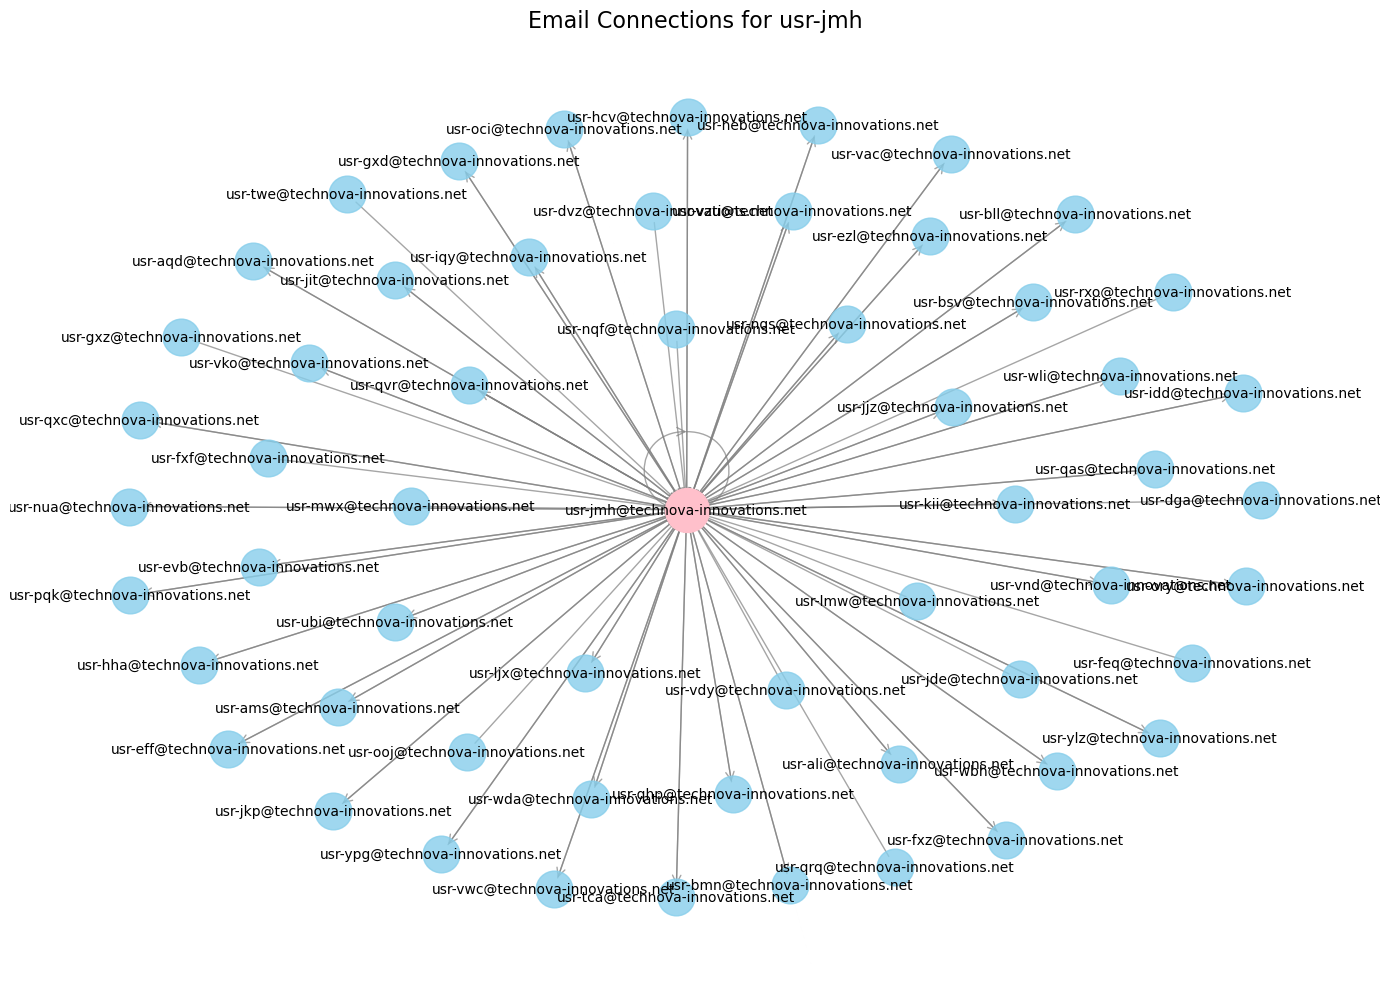

In [111]:

import networkx as nx


# Ensure datasets are copies to avoid modifying the original
email_data = email_data.copy()
employee_data = employee_data.copy()

# Convert 'datetime' to datetime format
email_data['datetime'] = pd.to_datetime(email_data['datetime'], errors='coerce')

# Retrieve usr-jmh's email from employee_data
jmh_email = employee_data.loc[employee_data['user'] == 'usr-jmh', 'email'].values
if len(jmh_email) > 0:
    jmh_email = jmh_email[0]
    print(f"Email for usr-jmh: {jmh_email}")
else:
    print("usr-jmh not found in employee_data.")
    exit()

# Filter for emails sent and received by usr-jmh
emails_sent_by_jmh = email_data[email_data['sender'] == jmh_email]
emails_received_by_jmh = email_data[email_data['recipient'] == jmh_email]

# Combine sent and received data for a bi-directional relationship
email_connections = pd.concat([
    emails_sent_by_jmh[['sender', 'recipient']],
    emails_received_by_jmh[['sender', 'recipient']]
])

# Build a directed graph using NetworkX
G = nx.DiGraph()

# Add edges for email connections
for _, row in email_connections.iterrows():
    G.add_edge(row['sender'], row['recipient'])

# Visualization: Node-Link Diagram
plt.figure(figsize=(14, 10))

# Define layout
pos = nx.spring_layout(G, k=0.5)

# Draw nodes
nx.draw_networkx_nodes(
    G, pos, node_size=700, node_color='skyblue', alpha=0.8
)

# Draw edges
nx.draw_networkx_edges(
    G, pos, arrowstyle='->', arrowsize=15, edge_color='gray', alpha=0.7
)

# Draw labels
nx.draw_networkx_labels(
    G, pos, font_size=10, font_color='black'
)

# Highlight usr-jmh
if jmh_email in G.nodes:
    nx.draw_networkx_nodes(
        G, pos, nodelist=[jmh_email], node_size=1000, node_color='pink'
    )

# Enhance the plot
plt.title("Email Connections for usr-jmh", fontsize=16)
plt.axis('off')
plt.tight_layout()

# Show plot
plt.show()


### Analysis

The node-link diagram illustrates email connections involving usr-jmh, including both emails sent and received. Notably, the diagram reveals a self-transition edge, indicating that usr-jmh's email account has communicated with itself. While this could be a benign feature, such as testing or automated forwarding, it also warrants closer examination to determine if it aligns with expected behavior. Self-transitions can sometimes signify automated processes or unusual activity patterns that deserve further investigation in a cybersecurity context.

### Top 10 email sender to usr-jmh 

In [113]:
import pandas as pd

# Ensure email_data and employee_data are copies
email_data = email_data.copy()
employee_data = employee_data.copy()

# Convert 'datetime' to datetime format
email_data['datetime'] = pd.to_datetime(email_data['datetime'], errors='coerce')

# Retrieve usr-jmh's email from employee_data
jmh_email = employee_data.loc[employee_data['user'] == 'usr-jmh', 'email'].values
if len(jmh_email) > 0:
    jmh_email = jmh_email[0]
    print(f"Email for usr-jmh: {jmh_email}")
else:
    print("usr-jmh not found in employee_data.")
    exit()

# Filter for emails received by usr-jmh
emails_received_by_jmh = email_data[email_data['recipient'] == jmh_email]

# Count the frequency of senders
top_senders_to_jmh = emails_received_by_jmh['sender'].value_counts().head(10)

# Print the results
print("--- Top 10 Senders to usr-jmh ---")
print(top_senders_to_jmh)


Email for usr-jmh: usr-jmh@technova-innovations.net
--- Top 10 Senders to usr-jmh ---
sender
usr-jmh@technova-innovations.net    596
usr-bsv@technova-innovations.net    448
usr-nqs@technova-innovations.net    434
usr-ezl@technova-innovations.net    425
usr-pqk@technova-innovations.net    414
usr-wbh@technova-innovations.net    406
usr-hha@technova-innovations.net    402
usr-evb@technova-innovations.net    400
usr-qhp@technova-innovations.net    389
usr-qxc@technova-innovations.net    386
Name: count, dtype: int64


### Analysis
The analysis of email communications shows that usr-jmh receives the highest number of emails from their own account, with 596 emails recorded. This self-communication could be a result of automated processes like test emails, forwarding, or archiving, but it may also warrant further review to rule out any anomalies. Beyond self-communications, the next highest senders to usr-jmh include usr-bsv (448 emails) and usr-nqs (434 emails). These figures provide a foundation for investigating patterns in usr-jmh's interactions with other users.

#### -------------------------

## Establishing Links to Further Investigations

Although usr-jmh stands out across various investigations, the observed behavior might be reasonable given the responsibilities tied to their roles. However, these findings could also be "rubber ducks"—seemingly suspicious activities that turn out to be benign upon closer examination. Further connections or chains are needed to substantiate this assumption. To expand the investigation, I am shifting focus to another role. To determine which role to examine, I will compare the unique values associated with each role and base my decision on the results.

#### -------------------------

## Unique Values in Each Roles 

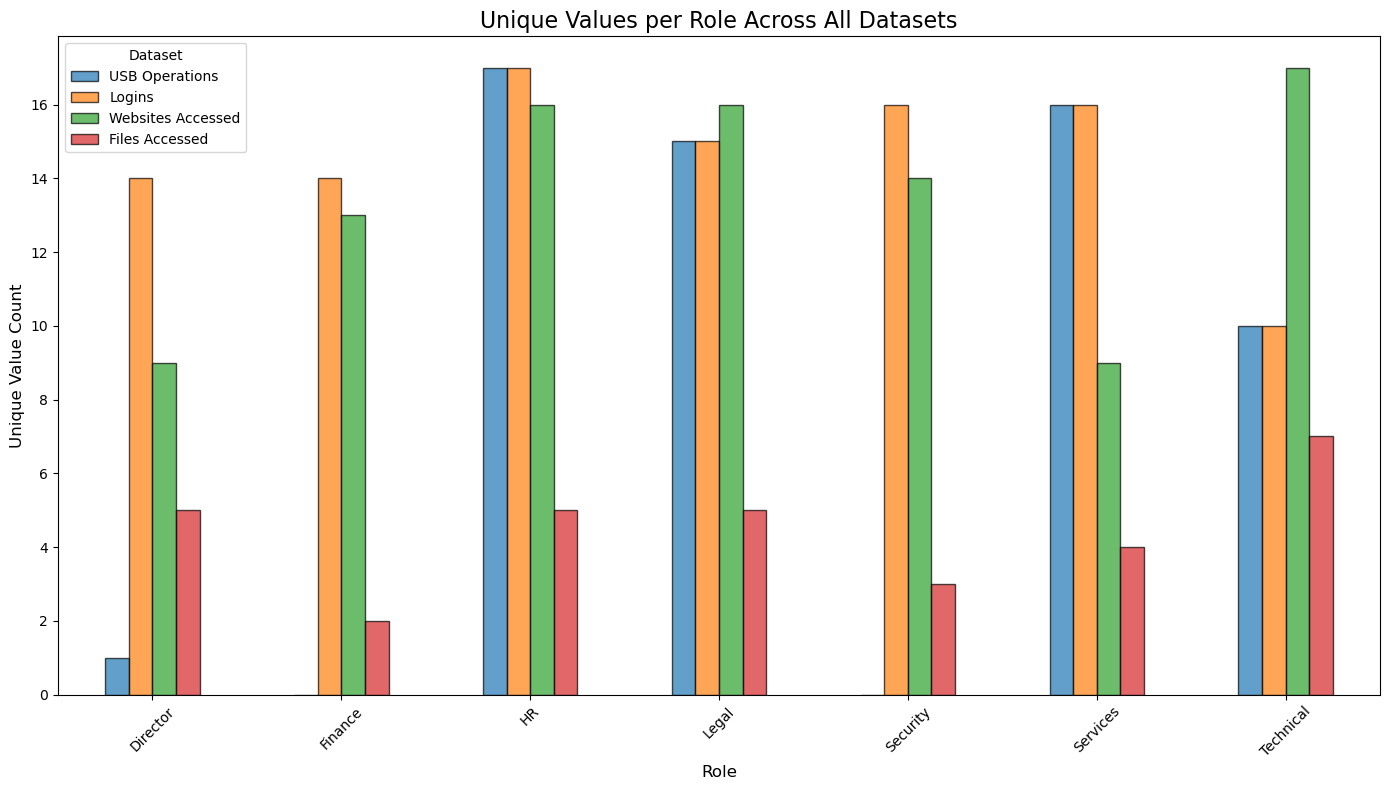

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure all datasets are loaded
usb_data = usb_data.copy()
login_data = login_data.copy()
web_data = web_data.copy()
file_data = file_data.copy()
employee_data = employee_data.copy()

# Convert datetime columns to datetime format for consistency
usb_data['datetime'] = pd.to_datetime(usb_data['datetime'], errors='coerce')
login_data['datetime'] = pd.to_datetime(login_data['datetime'], errors='coerce')
web_data['datetime'] = pd.to_datetime(web_data['datetime'], errors='coerce')
file_data['datetime'] = pd.to_datetime(file_data['datetime'], errors='coerce')

# Merge datasets with employee_data to associate actions with roles
usb_data = pd.merge(usb_data, employee_data[['user', 'role']], on='user', how='left')
login_data = pd.merge(login_data, employee_data[['user', 'role']], on='user', how='left')
web_data = pd.merge(web_data, employee_data[['user', 'role']], on='user', how='left')
file_data = pd.merge(file_data, employee_data[['user', 'role']], on='user', how='left')

# Count unique values per role for each dataset
usb_unique = usb_data.groupby('role')['pc'].nunique()
login_unique = login_data.groupby('role')['pc'].nunique()
web_unique = web_data.groupby('role')['website'].nunique()
file_unique = file_data.groupby('role')['filename'].nunique()

# Combine results into a single DataFrame
unique_values = pd.DataFrame({
    'USB Operations': usb_unique,
    'Logins': login_unique,
    'Websites Accessed': web_unique,
    'Files Accessed': file_unique
}).fillna(0)

# Plot combined bar chart
unique_values.plot(kind='bar', figsize=(14, 8), alpha=0.7, edgecolor='black')

# Enhance the plot
plt.title('Unique Values per Role Across All Datasets', fontsize=16)
plt.xlabel('Role', fontsize=12)
plt.ylabel('Unique Value Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Dataset', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


### Selection of Role for further investigation 
In the bar chart analysis, most roles exhibit consistent or balanced activities across various datasets, where values for metrics like USB operations or logins align closely with other activities. However, the director role stands out with a relatively small unique value that doesn't align with the pattern seen in other roles. This discrepancy indicates an unusual imbalance in activities for directors, prompting further investigation into this role.

# Director 

## Login and Logoff Events for Directors by Month

/var/folders/h4/6f163_1s6yv6b5rhkqbls4v40000gn/T/ipykernel_64341/1339681547.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  director_login_data['month'] = director_login_data['datetime'].dt.month


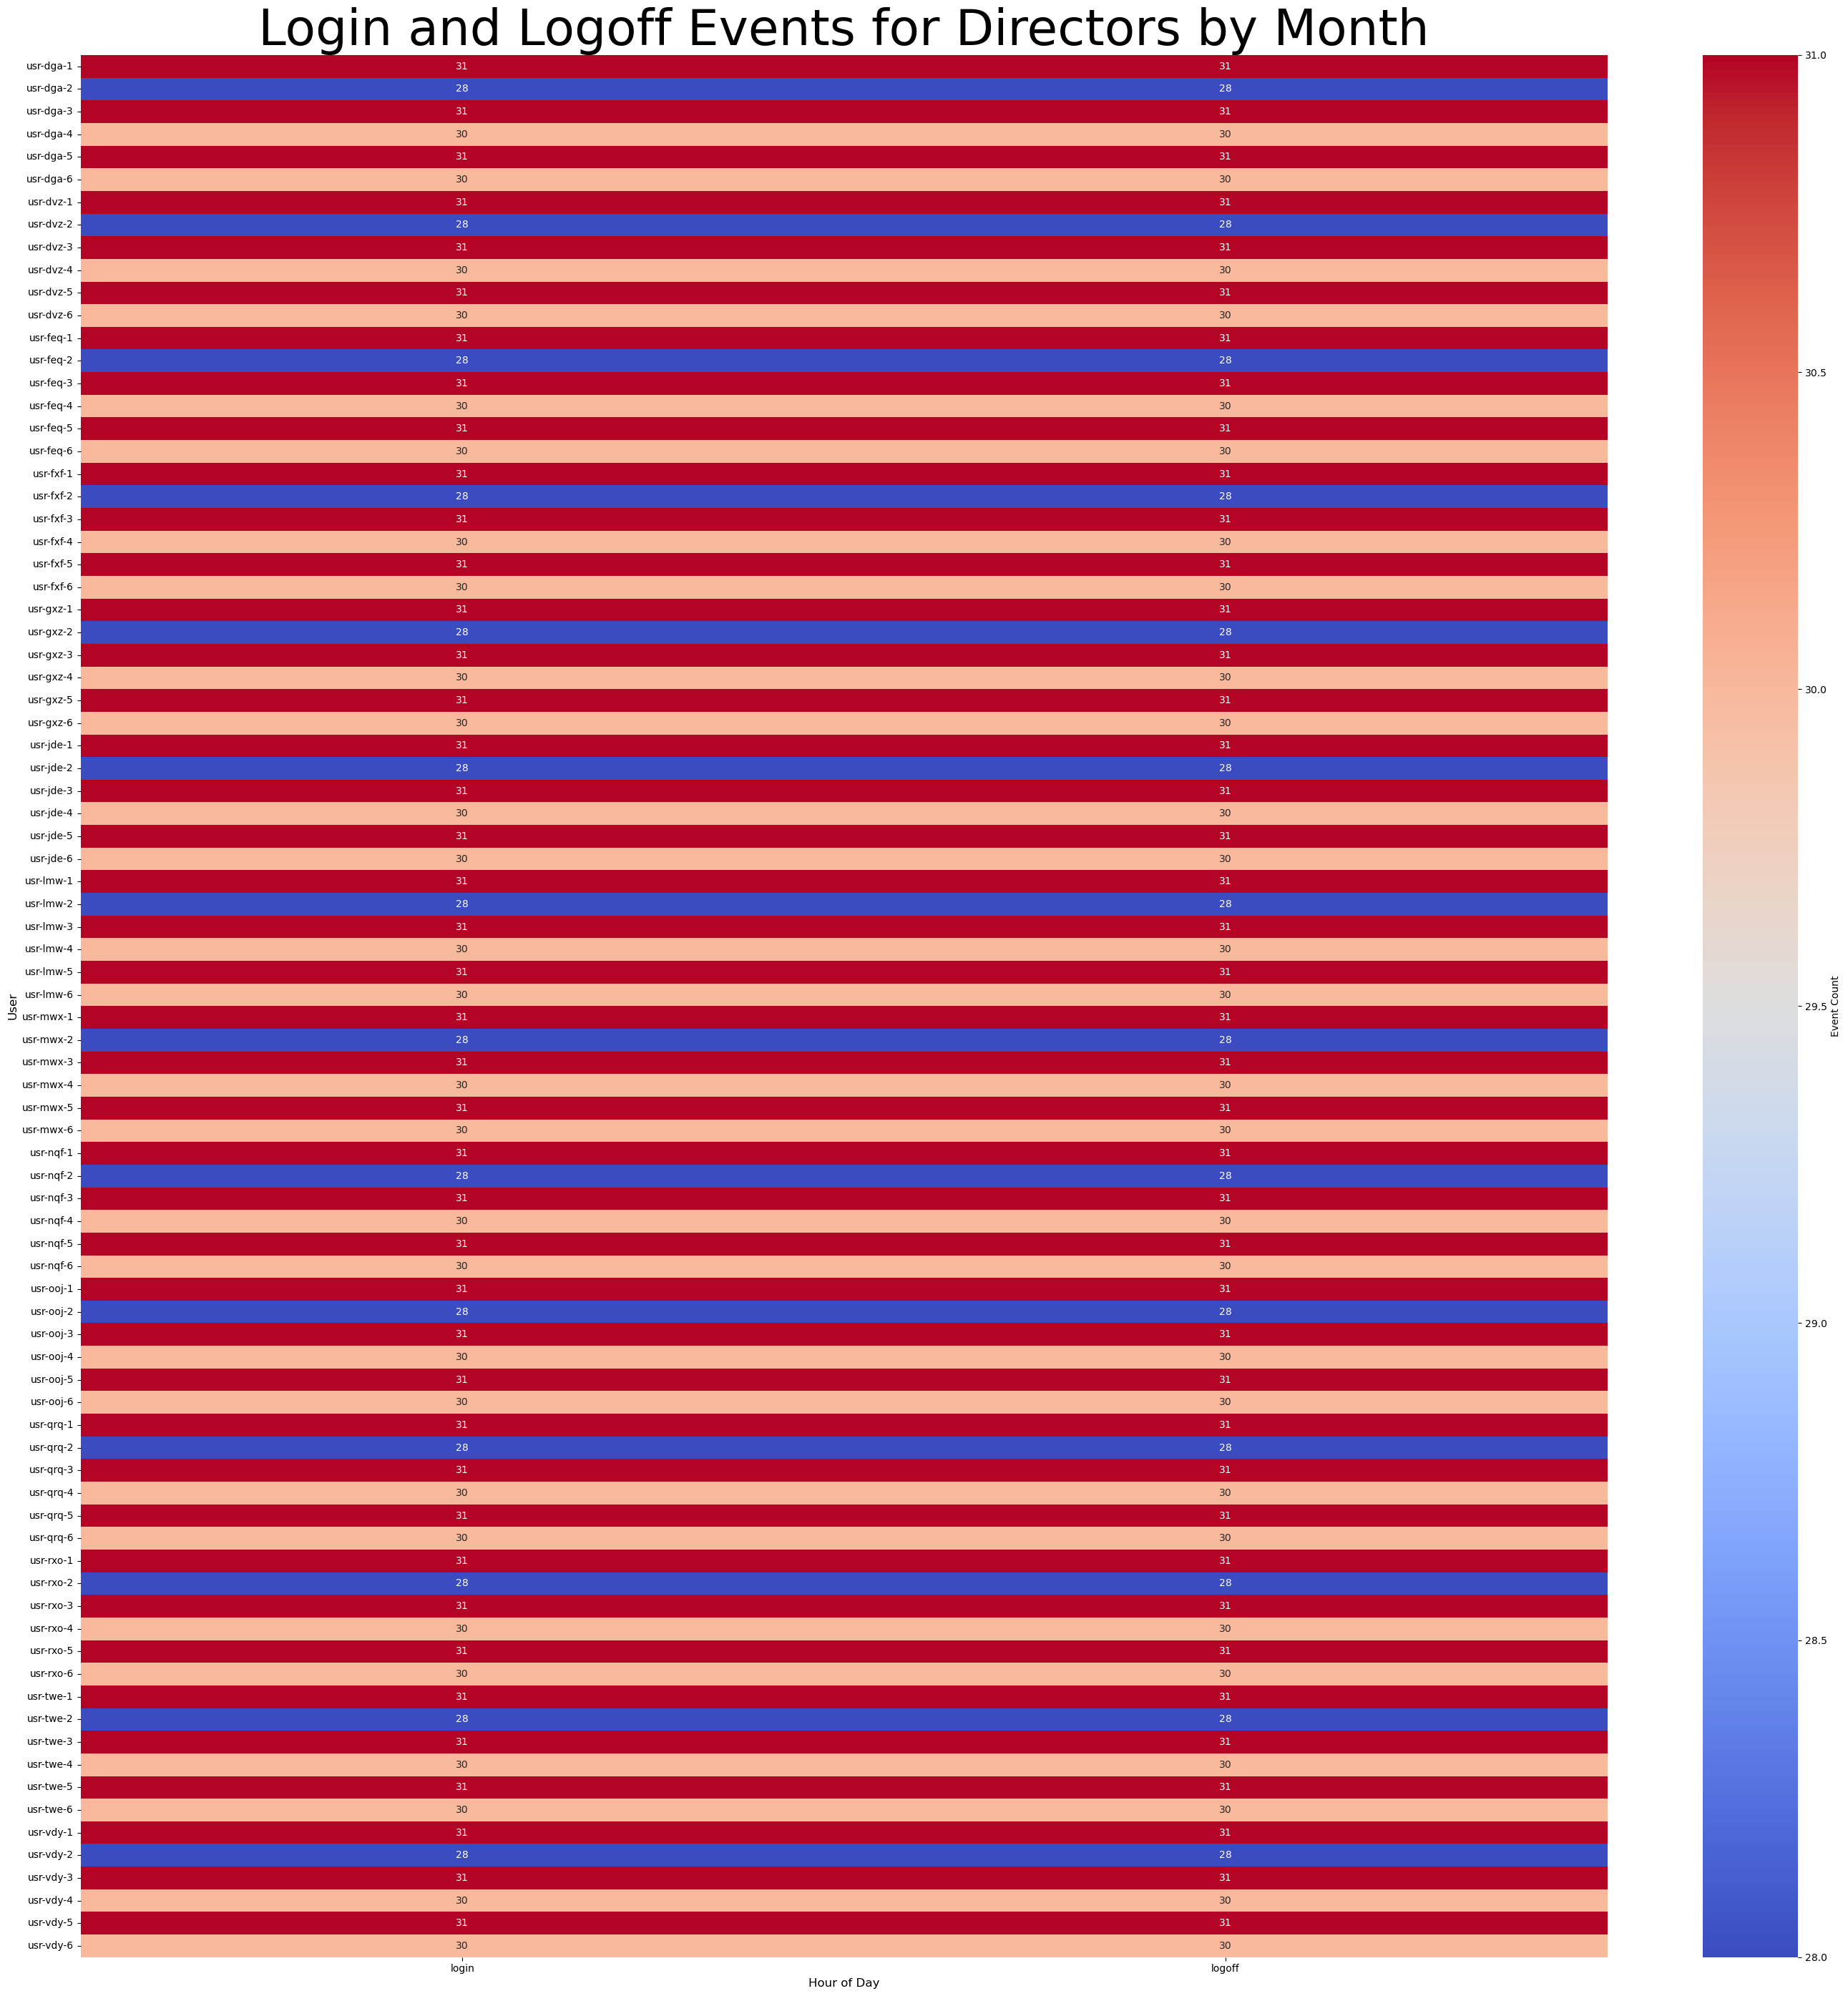

In [119]:
# Load datasets
employee_data = employee_data.copy()
login_data = login_data.copy()

# Ensure datetime column is in proper format
login_data['datetime'] = pd.to_datetime(login_data['datetime'], errors='coerce')

# Filter directors from employee_data
directors = employee_data[employee_data['role'] == 'Director']['user']

# Filter login data for directors
director_login_data = login_data[login_data['user'].isin(directors)]

# Extract hour and action for heatmap
director_login_data['month'] = director_login_data['datetime'].dt.month
heatmap_data = director_login_data.groupby(['user', 'month', 'action']).size().unstack(fill_value=0)

# Plot heatmap
plt.figure(figsize=(28, 28))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='d',
    cmap='coolwarm',
    cbar_kws={'label': 'Event Count'}
)

# Enhance plot
plt.title('Login and Logoff Events for Directors by Month', fontsize=50)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('User', fontsize=12)
plt.tight_layout()

# Show plot
plt.show()

### Analysis
In the analysis of login and logoff events for directors by month, there are no immediately apparent unique values or patterns that distinguish this role in terms of their login activities. The data shows a relatively consistent distribution of logins and logoffs across the directors, suggesting that no director's activity stands out as significantly different or anomalous when compared to their peers. However, this consistency could also indicate well-aligned behaviors for this role, making further exploration necessary to uncover any subtler irregularities.

## Overall Login and Logoff Events for Directors

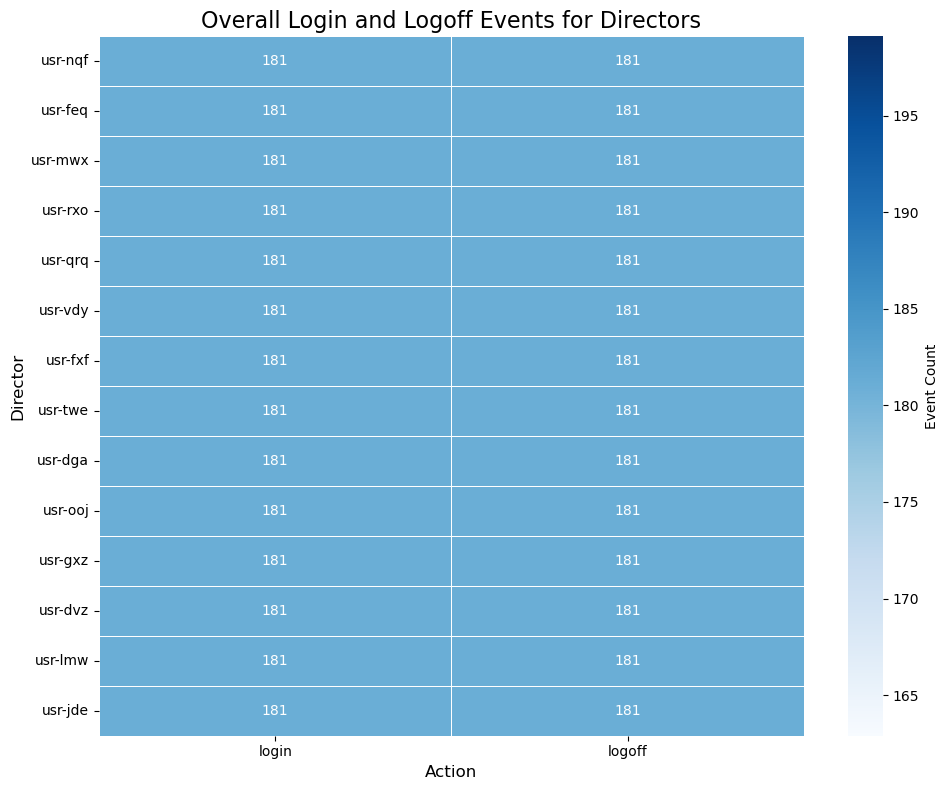

In [121]:
# Load datasets
employee_data = employee_data.copy()
login_data = login_data.copy()

# Ensure datetime column is in proper format
login_data['datetime'] = pd.to_datetime(login_data['datetime'], errors='coerce')

# Filter directors from employee_data
directors = employee_data[employee_data['role'] == 'Director']['user']

# Filter login data for directors
director_login_data = login_data[login_data['user'].isin(directors)]

# Group by user and action to aggregate event counts
overall_data = director_login_data.groupby(['user', 'action']).size().unstack(fill_value=0)

# Ensure data alignment for heatmap
overall_data = overall_data.reindex(directors, fill_value=0)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    overall_data,
    annot=True,
    fmt='d',
    cmap='Blues',
    linewidths=0.5,
    cbar_kws={'label': 'Event Count'}
)

# Enhance plot
plt.title('Overall Login and Logoff Events for Directors', fontsize=16)
plt.xlabel('Action', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.tight_layout()

# Show plot
plt.show()


### Analysis

The overall login and logoff activity for directors appears consistent and balanced, with no significant outliers or irregularities among the directors. Each director's activity aligns with expected patterns, showing no immediate signs of suspicious behavior or anomalies in their interactions with the system. This uniformity suggests that the login and logoff behavior within the director role follows a predictable and consistent trend, potentially reflective of the standard requirements of their responsibilities.

## File Access Frequency by Hour for All Directors

/var/folders/h4/6f163_1s6yv6b5rhkqbls4v40000gn/T/ipykernel_64341/519745631.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_director_users['hour'] = file_director_users['datetime'].dt.hour


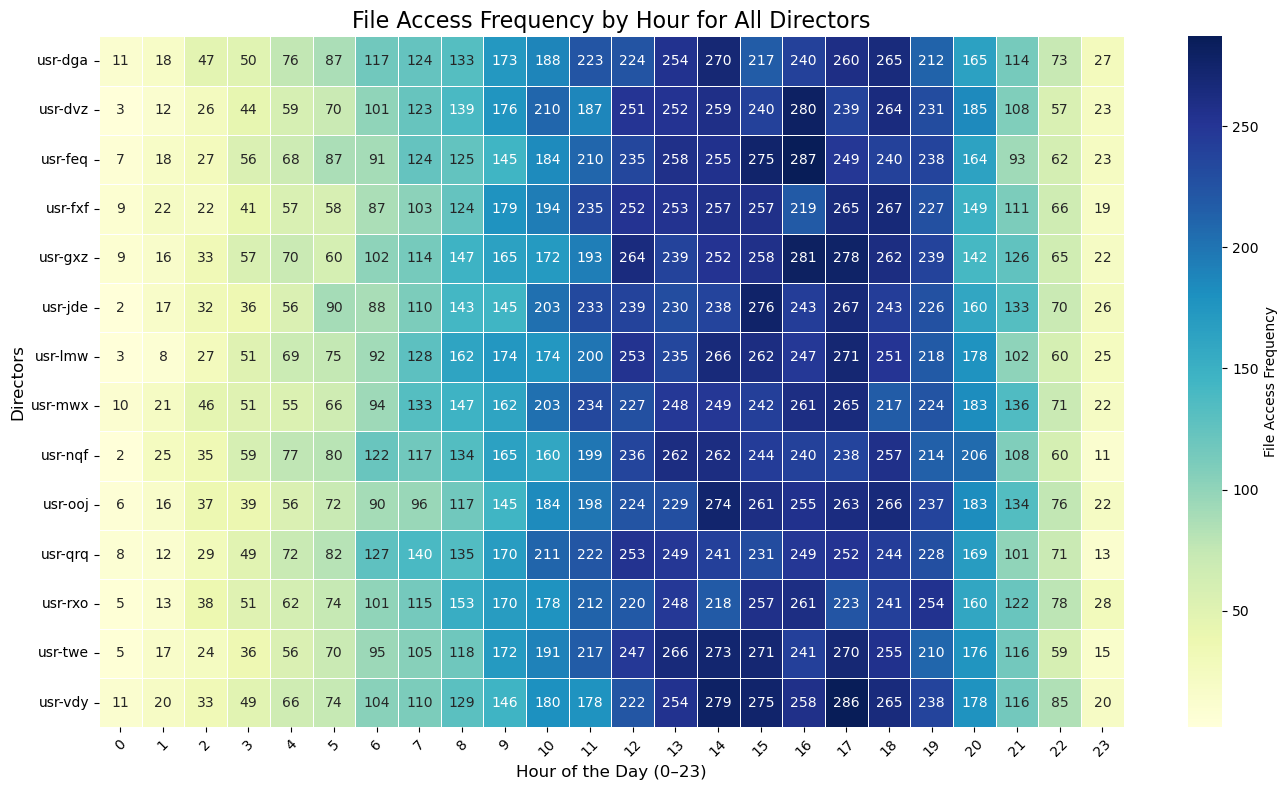

In [123]:
import seaborn as sns


# Load datasets
employee_data = employee_data.copy()
file_data = file_data.copy()

# Ensure datetime column is in proper datetime format
file_data['datetime'] = pd.to_datetime(file_data['datetime'], errors='coerce')

# Step 1: Extract all Director users
director_users = employee_data[employee_data['role'] == 'Director']['user']

# Step 2: Process file access data for all directors
file_director_users = file_data[file_data['user'].isin(director_users)]

# Extract hour from datetime for time-based analysis
file_director_users['hour'] = file_director_users['datetime'].dt.hour

# Count total file accesses by each director per hour
file_access_hourly = file_director_users.groupby(['user', 'hour']).size().unstack(fill_value=0)

# Ensure all directors are included even if they have no data
for user in director_users:
    if user not in file_access_hourly.index:
        file_access_hourly.loc[user] = [0] * 24  # Add rows for missing users with zero values

# Sort the data by directors' names for better organization
file_access_hourly = file_access_hourly.sort_index()

# Step 3: Visualize using a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    file_access_hourly,
    cmap='YlGnBu',
    linewidths=0.5,
    annot=True,
    fmt='.0f',
    cbar_kws={'label': 'File Access Frequency'}
)

# Enhance the plot
plt.title('File Access Frequency by Hour for All Directors', fontsize=16)
plt.xlabel('Hour of the Day (0–23)', fontsize=12)
plt.ylabel('Directors', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

### Analysis 
The heatmap illustrates file access activity by all directors, with most actions occurring during working hours, primarily between 1 PM and 6 PM. The activity appears consistent across this time frame. More investigation will be carried out to detect anomalies in the data of Directors.

## Website Access for All Directors 

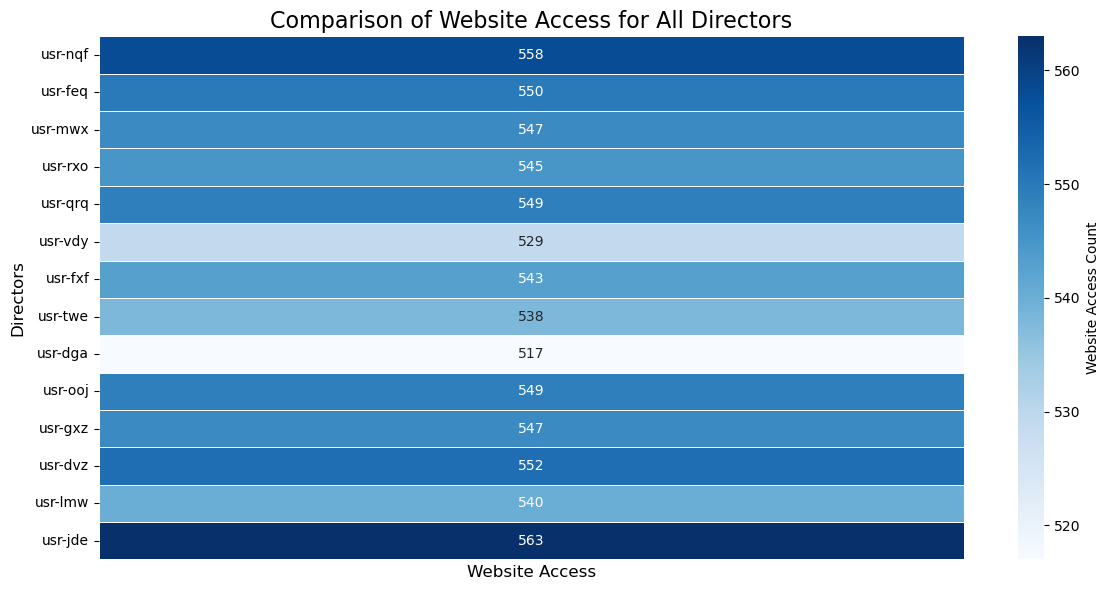

--- Website Access for All Directors ---
         Website Access Count
user                         
usr-nqf                   558
usr-feq                   550
usr-mwx                   547
usr-rxo                   545
usr-qrq                   549
usr-vdy                   529
usr-fxf                   543
usr-twe                   538
usr-dga                   517
usr-ooj                   549
usr-gxz                   547
usr-dvz                   552
usr-lmw                   540
usr-jde                   563


In [126]:
import seaborn as sns

# Load datasets
employee_data = employee_data.copy()
web_data = web_data.copy()

# Ensure datetime column is in proper datetime format
web_data['datetime'] = pd.to_datetime(web_data['datetime'], errors='coerce')

# Step 1: Extract all users with the role "Director"
directors = employee_data[employee_data['role'] == 'Director']
director_users = directors['user'].unique()

# Step 2: Filter web data for all Directors
web_director_data = web_data[web_data['user'].isin(director_users)]

# Group data by user to count total website accesses
web_director_freq = web_director_data.groupby('user').size().reindex(director_users, fill_value=0)

# Convert to DataFrame for heatmap compatibility
web_director_freq_df = web_director_freq.to_frame(name='Website Access Count')

# Step 3: Visualize Website Access using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    web_director_freq_df,
    cmap='Blues',
    linewidths=0.5,
    annot=True,
    fmt='.0f',
    cbar_kws={'label': 'Website Access Count'}
)

# Enhance the plot
plt.title('Comparison of Website Access for All Directors', fontsize=16)
plt.xlabel('Website Access', fontsize=12)
plt.ylabel('Directors', fontsize=12)
plt.xticks([], [])  # Remove x-ticks for single-column heatmap
plt.yticks(fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

# Verification: Print website access counts for all directors
print("--- Website Access for All Directors ---")
print(web_director_freq_df)


### Analysis 
The analysis of website access activity among directors reveals a consistent pattern, with usr-jde standing out with the highest access count at 563. While this level of activity could be linked to their responsibilities, it warrants further scrutiny in light of their elevated presence in other datasets.

Given their increased website access, usr-jde emerges as a potential focal point for further investigation.


## Emails sent by all directors

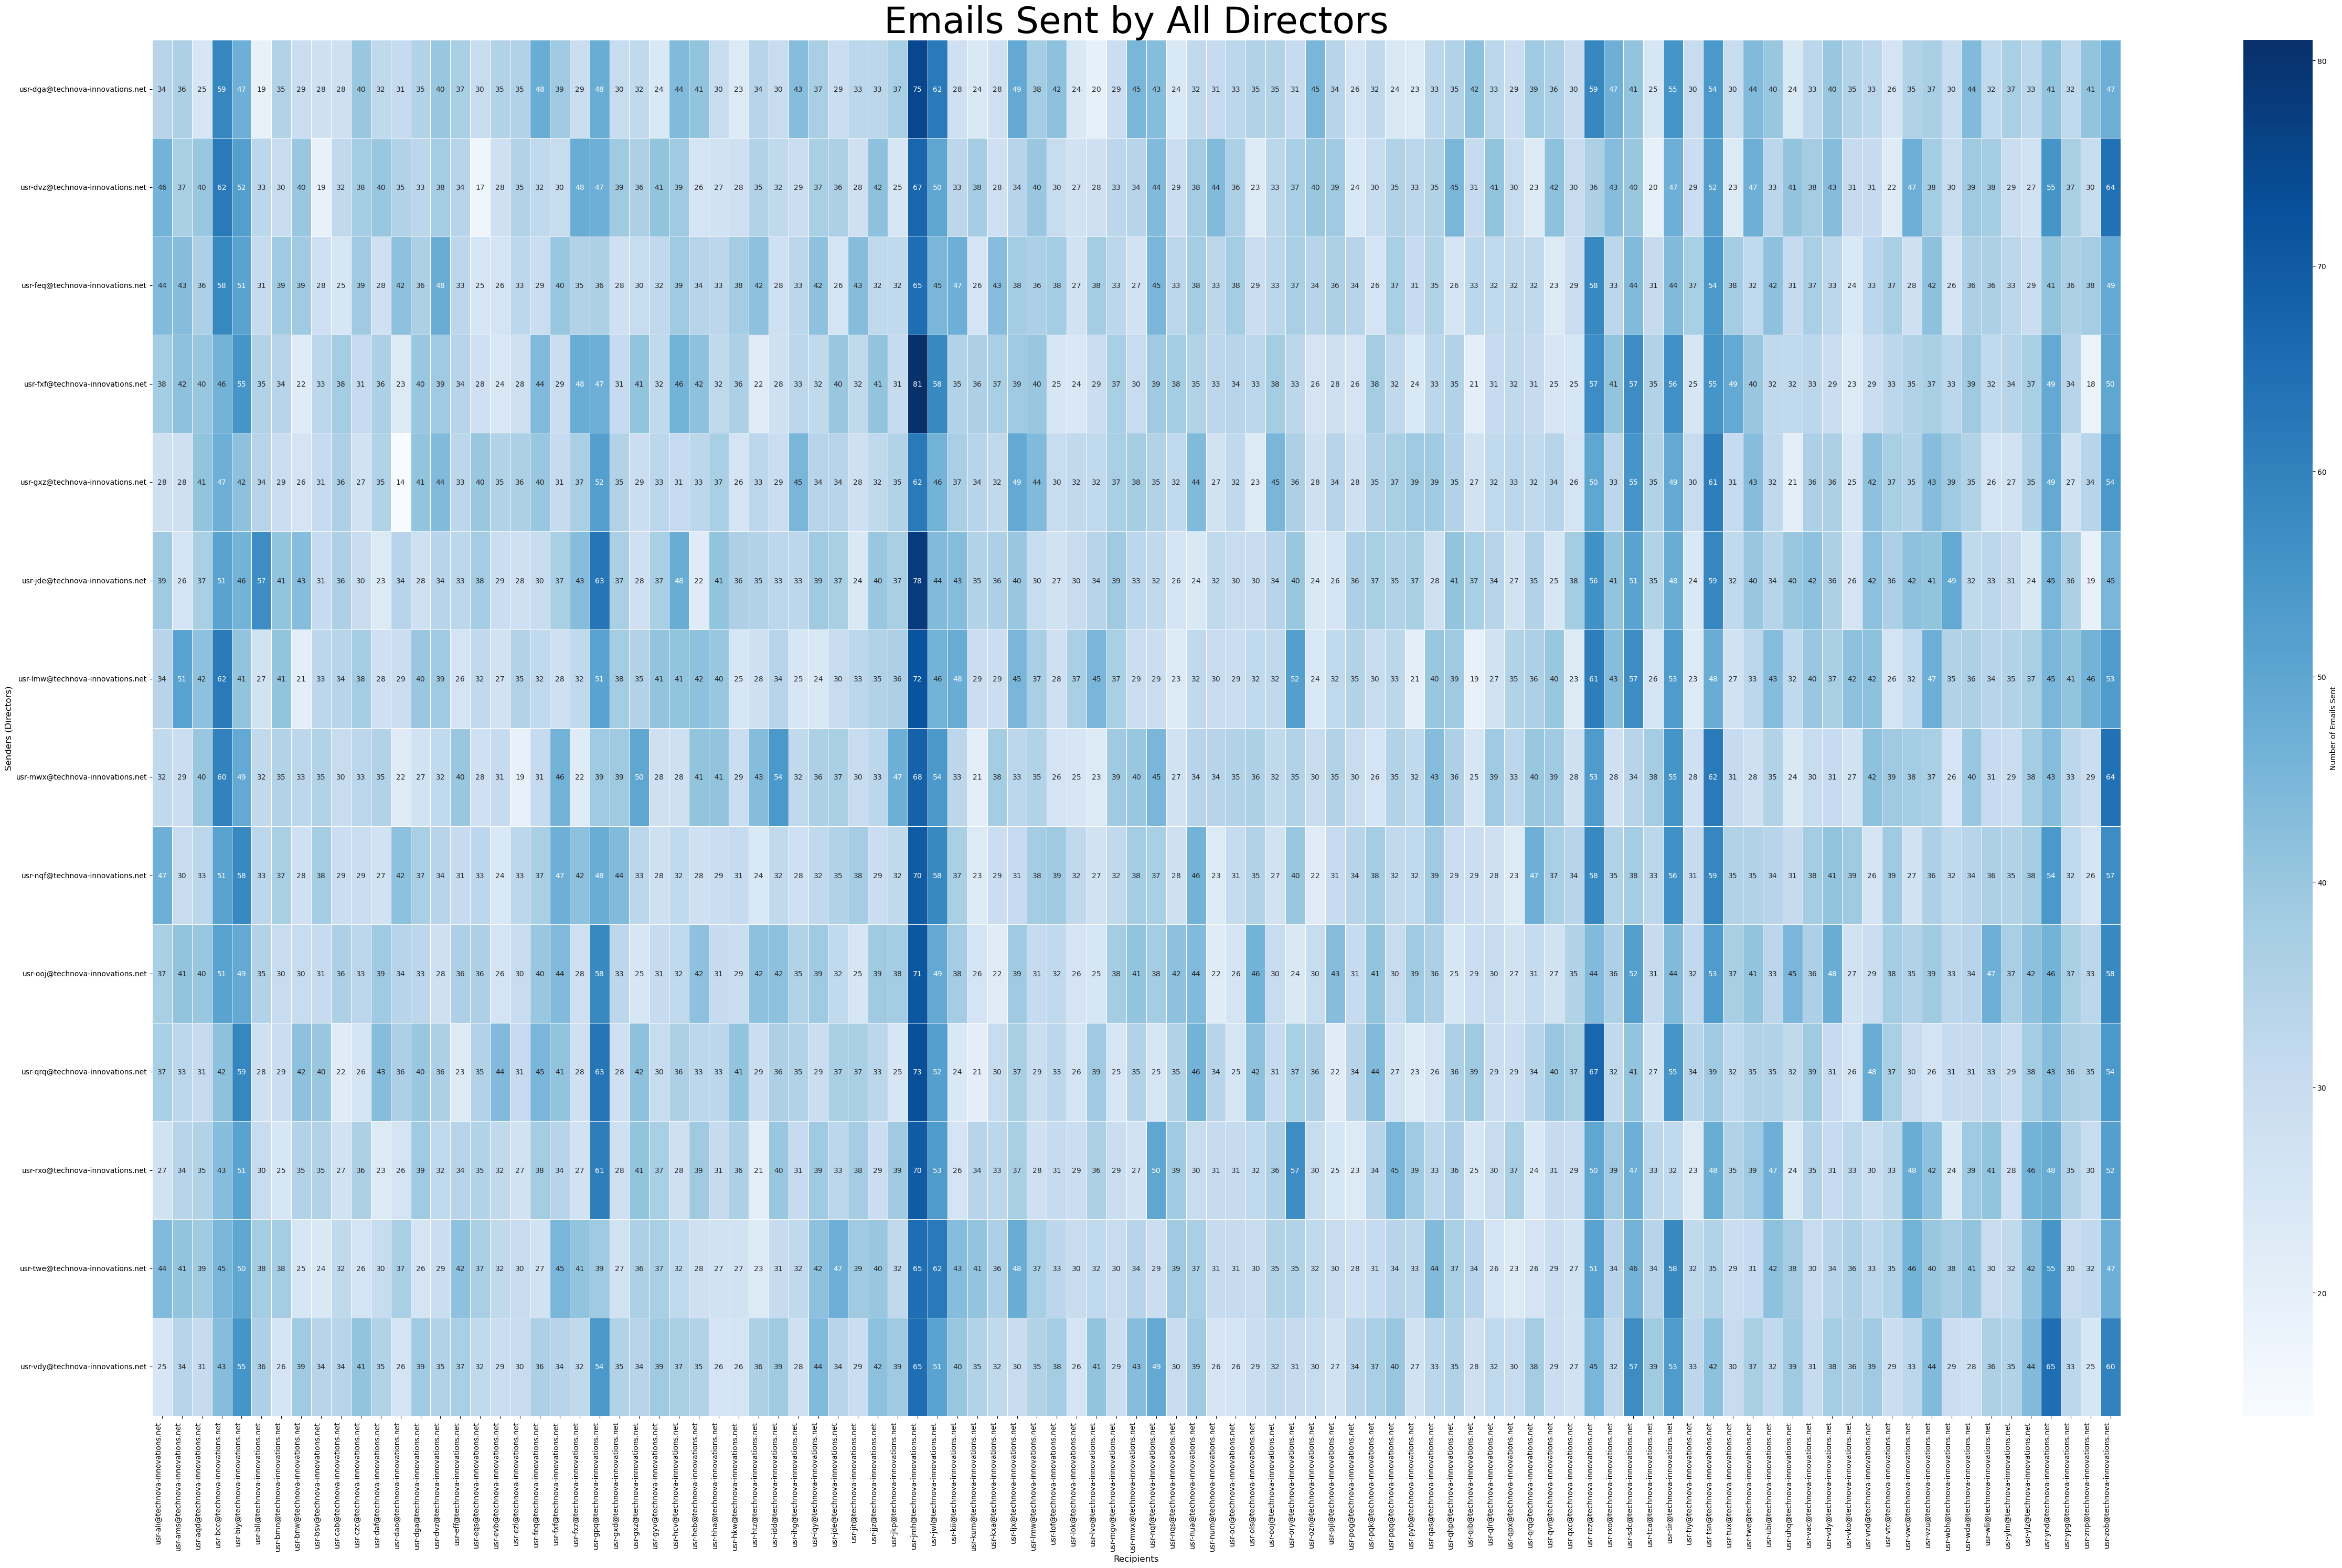

In [128]:
import seaborn as sns


# Load datasets
employee_data = employee_data.copy()
email_data = email_data.copy()

# Ensure datetime column is in datetime format
email_data['datetime'] = pd.to_datetime(email_data['datetime'], errors='coerce')

# Get all directors and their associated email addresses
director_emails = employee_data[employee_data['role'] == 'Director']['email']

# Filter email_data for records where the sender is a director
director_sent_emails = email_data[email_data['sender'].isin(director_emails)]

# Count the frequency of emails sent by each director to each recipient
director_sent_counts = director_sent_emails.groupby(['sender', 'recipient']).size().unstack(fill_value=0)

# Annotate 'usr-jde' if present
annotations_sent = director_sent_counts.copy().astype(str)
if 'usr-jde' in director_sent_counts.index:
    annotations_sent.loc['usr-jde'] += '*'  # Mark usr-jde

# Display the heatmap for emails sent by all directors
plt.figure(figsize=(50, 30))
sns.heatmap(
    director_sent_counts, annot=annotations_sent, fmt='', cmap='Blues', linewidths=0.5,
    cbar_kws={'label': 'Number of Emails Sent'}
)

# Enhance the plot
plt.title('Emails Sent by All Directors', fontsize=50)
plt.xlabel('Recipients', fontsize=12)
plt.ylabel('Senders (Directors)', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Show plot
plt.show()

### Analysis 

The email-sending activity for directors shows a generally consistent pattern across recipients, with no significant irregularities or deviations. However, an interesting observation is that usr-jde has sent emails to themselves, which, while potentially reasonable for role-related tasks, is uncommon and merits further analysis. This behavior could be standard or indicative of unique operational needs within their responsibilities, adding more attachment to the evidence found for usr-jde in websites files earlier.

## Emails Received by All Directors

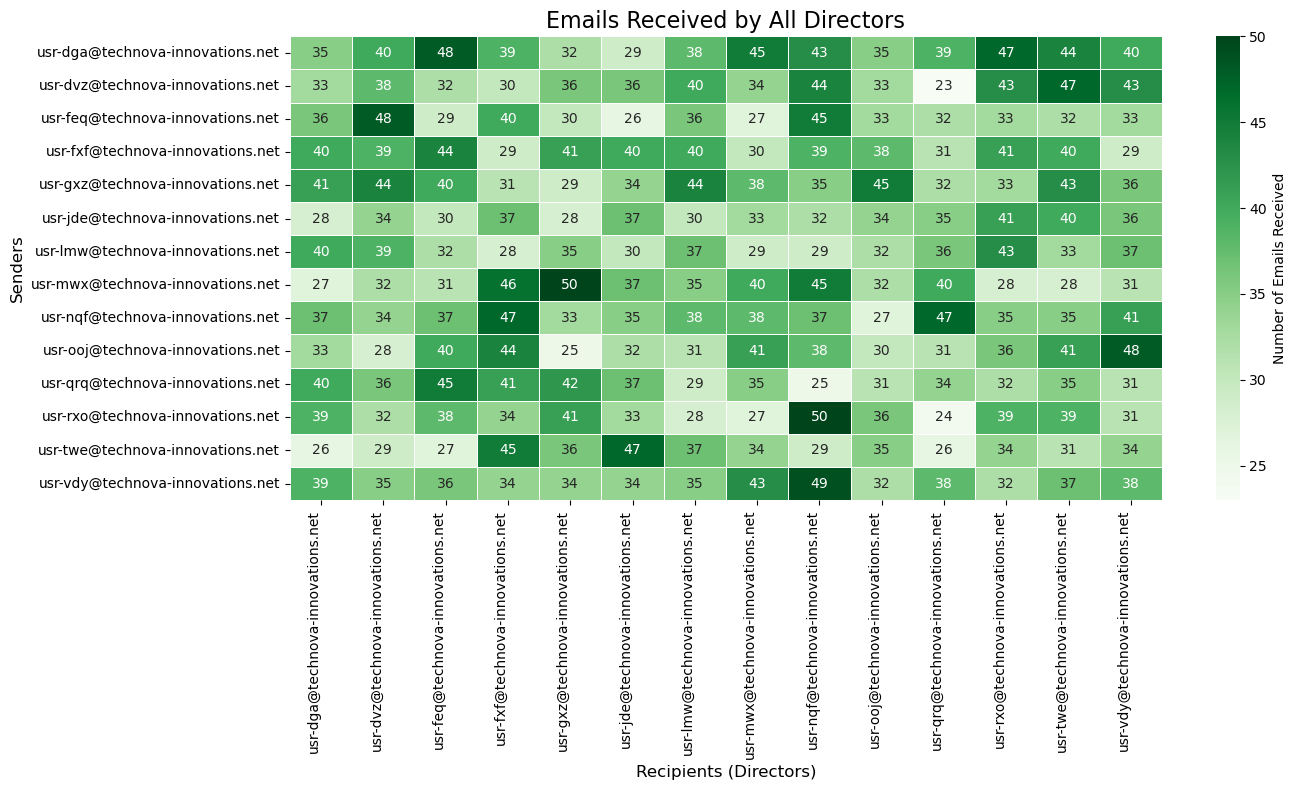

In [130]:
import seaborn as sns


# Load datasets
employee_data = employee_data.copy()
email_data = email_data.copy()

# Ensure datetime column is in datetime format
email_data['datetime'] = pd.to_datetime(email_data['datetime'], errors='coerce')

# Get all directors and their associated email addresses
director_emails = employee_data[employee_data['role'] == 'Director']['email']

# Filter email_data for records where the recipient is a director
director_received_emails = email_data[email_data['recipient'].isin(director_emails)]

# Count the frequency of emails received by each director from each sender
director_received_counts = director_received_emails.groupby(['sender', 'recipient']).size().unstack(fill_value=0)

# Annotate 'usr-jde' if present
annotations_received = director_received_counts.copy().astype(str)
if 'usr-jde' in director_received_counts.columns:
    annotations_received['usr-jde'] += '*'  # Mark usr-jde if present

# Display the heatmap for emails received by all directors
plt.figure(figsize=(14, 8))
sns.heatmap(
    director_received_counts, annot=annotations_received, fmt='', cmap='Greens', linewidths=0.5,
    cbar_kws={'label': 'Number of Emails Received'}
)

# Enhance the plot
plt.title('Emails Received by All Directors', fontsize=16)
plt.xlabel('Recipients (Directors)', fontsize=12)
plt.ylabel('Senders', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Show plot
plt.show()

### Analysis 

The email-receiving activity for directors confirms that usr-jde has indeed received emails sent to their own account. This self-communication behavior is verified and could be associated with operational tasks or role-specific activities. While it is not a common practice, it does not necessarily indicate suspicious behavior but warrants further exploration to understand the context and reasoning behind this activity alongside the evidence found for usr-jde in earlier analysis.

## Email Connections for usr-jde

Email for usr-jde: usr-jde@technova-innovations.net


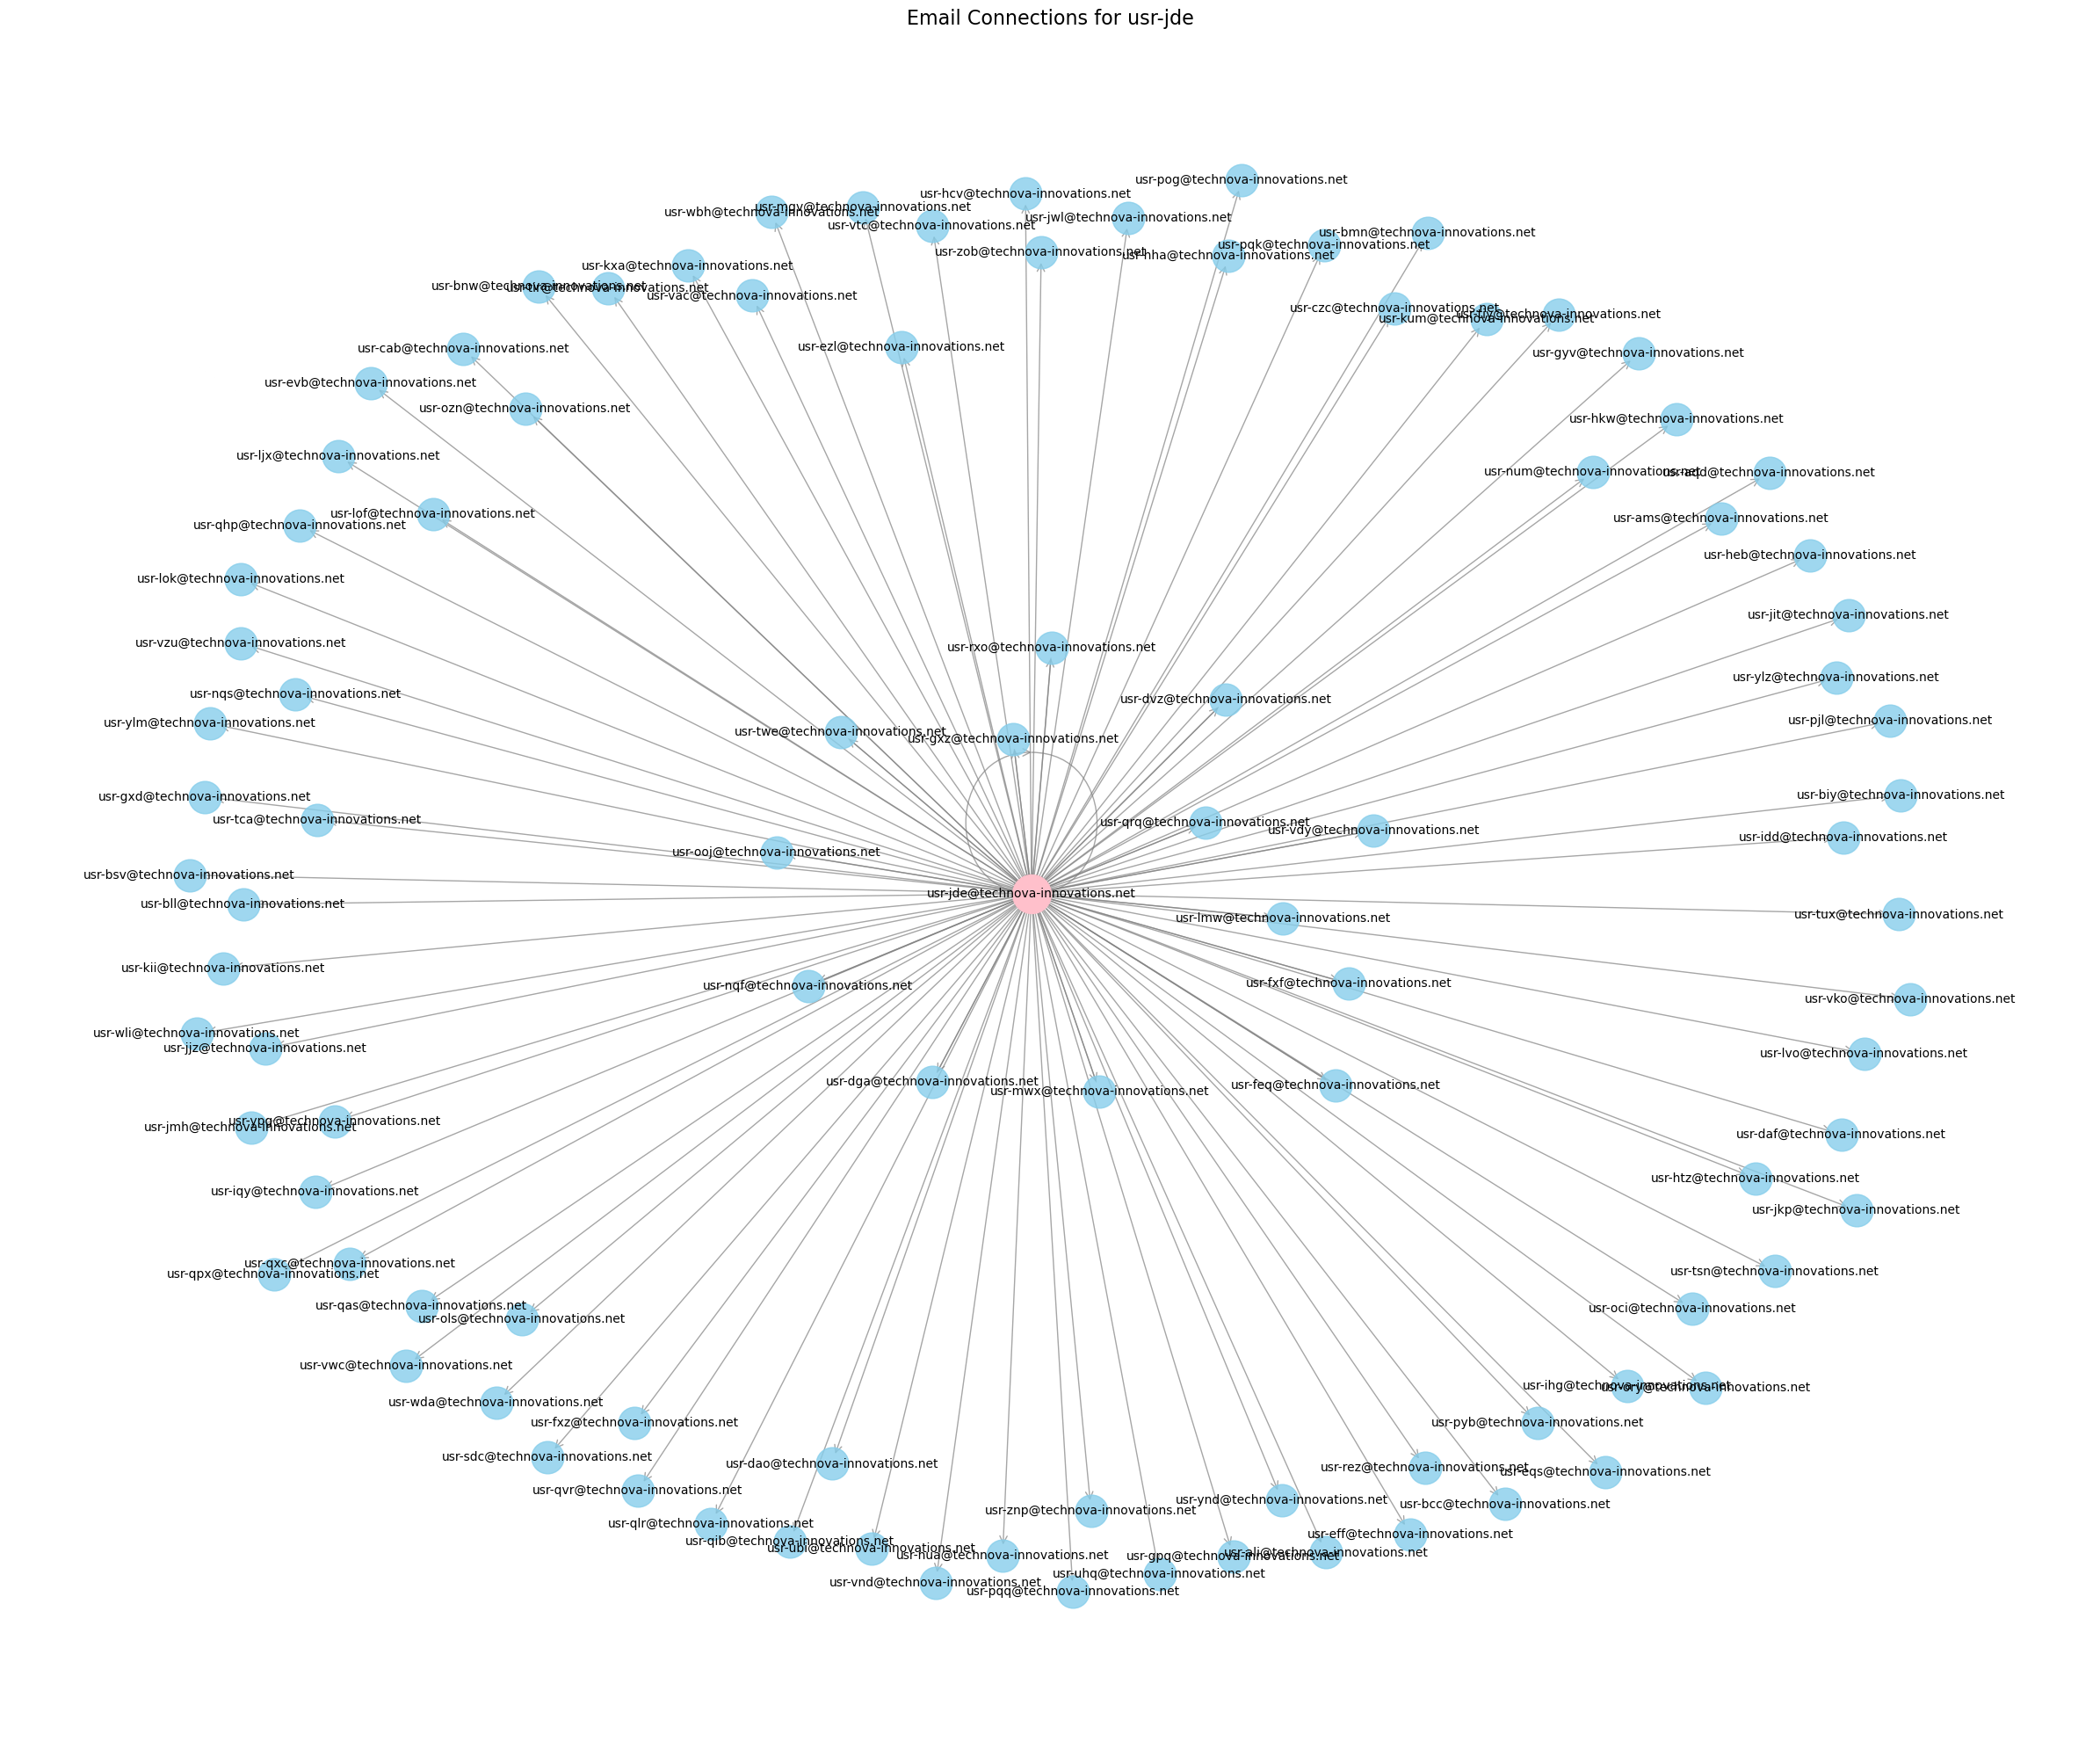

In [189]:

import networkx as nx


# Ensure datasets are copies to avoid modifying the original
email_data = email_data.copy()
employee_data = employee_data.copy()

# Convert 'datetime' to datetime format
email_data['datetime'] = pd.to_datetime(email_data['datetime'], errors='coerce')

# Retrieve usr-jde's email from employee_data
jde_email = employee_data.loc[employee_data['user'] == 'usr-jde', 'email'].values
if len(jde_email) > 0:
    jde_email = jde_email[0]
    print(f"Email for usr-jde: {jde_email}")
else:
    print("usr-jde not found in employee_data.")
    exit()

# Filter for emails sent and received by usr-jde
emails_sent_by_jde = email_data[email_data['sender'] == jde_email]
emails_received_by_jde = email_data[email_data['recipient'] == jde_email]

# Combine sent and received data for a bi-directional relationship
email_connections = pd.concat([
    emails_sent_by_jde[['sender', 'recipient']],
    emails_received_by_jde[['sender', 'recipient']]
])

# Build a directed graph using NetworkX
G = nx.DiGraph()

# Add edges for email connections
for _, row in email_connections.iterrows():
    G.add_edge(row['sender'], row['recipient'])

# Visualization: Node-Link Diagram
plt.figure(figsize=(24, 20))

# Define layout
pos = nx.spring_layout(G, k=0.5)

# Draw nodes
nx.draw_networkx_nodes(
    G, pos, node_size=700, node_color='skyblue', alpha=0.8
)

# Draw edges
nx.draw_networkx_edges(
    G, pos, arrowstyle='->', arrowsize=15, edge_color='gray', alpha=0.7
)

# Draw labels
nx.draw_networkx_labels(
    G, pos, font_size=10, font_color='black'
)

# Highlight usr-jde
if jde_email in G.nodes:
    nx.draw_networkx_nodes(
        G, pos, nodelist=[jde_email], node_size=1000, node_color='pink'
    )

# Enhance the plot
plt.title("Email Connections for usr-jde", fontsize=16)
plt.axis('off')
plt.tight_layout()

# Show plot
plt.show()


### Analysis 
The node-link diagram for email connections again confirms the presence of a self-transition for the user usr-jde, indicating that usr-jde is sending emails to their own account. This finding aligns with the earlier heatmap analysis and reinforces the observed behavior of self-communication. While such activity may be related to role-specific requirements, it stands out as an unusual pattern that warrants further investigation to determine its context and significance within the broader communication network.

### Top 10 email recipients of usr-jde

In [134]:
import pandas as pd

# Ensure email_data and employee_data are copies
email_data = email_data.copy()
employee_data = employee_data.copy()

# Convert 'datetime' to datetime format
email_data['datetime'] = pd.to_datetime(email_data['datetime'], errors='coerce')

# Retrieve usr-jde's email from employee_data
jde_email = employee_data.loc[employee_data['user'] == 'usr-jde', 'email'].values
if len(jde_email) > 0:
    jde_email = jde_email[0]
    print(f"Email for usr-jde: {jde_email}")
else:
    print("usr-jde not found in employee_data.")
    exit()

# Filter for emails sent by usr-jde
emails_sent_by_jde = email_data[email_data['sender'] == jde_email]

# Count the frequency of recipients
top_recipients_from_jde = emails_sent_by_jde['recipient'].value_counts().head(10)

# Print the results
print("--- Top 10 Recipients of Emails Sent by usr-jde ---")
print(top_recipients_from_jde)


Email for usr-jde: usr-jde@technova-innovations.net
--- Top 10 Recipients of Emails Sent by usr-jde ---
recipient
usr-jmh@technova-innovations.net    78
usr-gpq@technova-innovations.net    63
usr-tsn@technova-innovations.net    59
usr-bll@technova-innovations.net    57
usr-rez@technova-innovations.net    56
usr-sdc@technova-innovations.net    51
usr-bcc@technova-innovations.net    51
usr-wbh@technova-innovations.net    49
usr-hcv@technova-innovations.net    48
usr-tir@technova-innovations.net    48
Name: count, dtype: int64


### Analysis

The analysis of emails sent by usr-jde reveals that the top recipient is usr-jmh, who has already been assumed as the initial suspect in prior investigations. This connection between usr-jde and usr-jmh is significant, as usr-jmh is known to have two roles, high login activity, extensive USB operations, and file access patterns that raised initial suspicion.

The fact that usr-jmh is the most frequently contacted recipient by usr-jde indicates a close interaction between these two individuals. This relationship warrants further scrutiny to determine if these interactions are legitimate or if they might indicate a deeper connection that could be part of a larger pattern of suspicious behavior. Future steps could include analyzing the content or timing of these communications to uncover potential correlations with other anomalies.

## USB Operations for All Directors

/var/folders/h4/6f163_1s6yv6b5rhkqbls4v40000gn/T/ipykernel_64341/3742445812.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usb_director_data['action'] = 'usb_operation'  # Unified action for simplicity


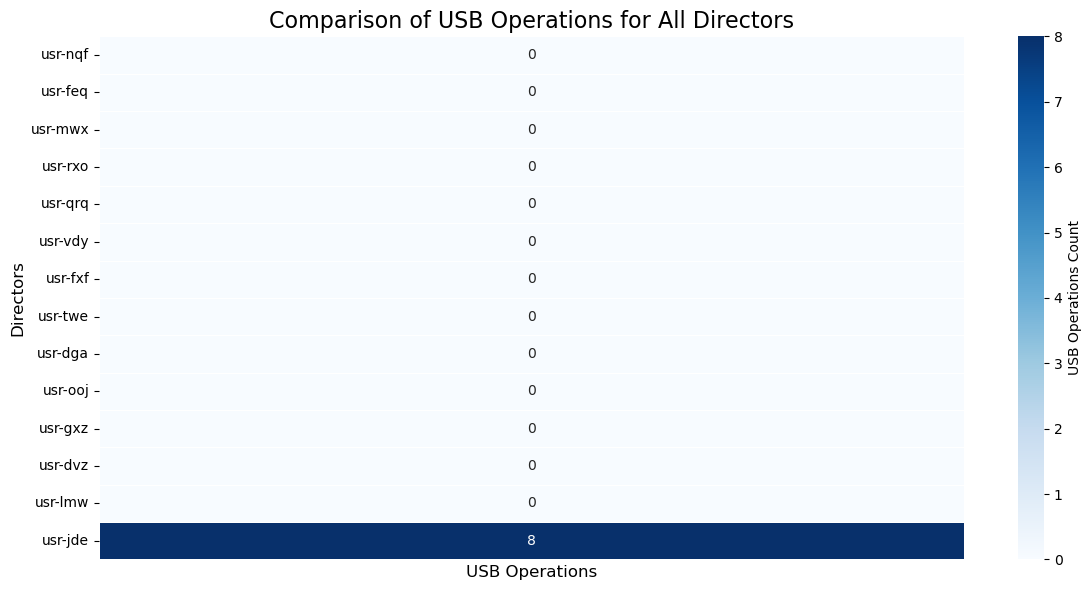

--- USB Operations for All Directors ---
         USB Operations Count
user                         
usr-nqf                     0
usr-feq                     0
usr-mwx                     0
usr-rxo                     0
usr-qrq                     0
usr-vdy                     0
usr-fxf                     0
usr-twe                     0
usr-dga                     0
usr-ooj                     0
usr-gxz                     0
usr-dvz                     0
usr-lmw                     0
usr-jde                     8


In [136]:

import seaborn as sns


# Load datasets
employee_data = employee_data.copy()
usb_data = usb_data.copy()

# Ensure datetime column is in proper datetime format
usb_data['datetime'] = pd.to_datetime(usb_data['datetime'], errors='coerce')

# Step 1: Extract all users with the role "Director"
directors = employee_data[employee_data['role'] == 'Director']
director_users = directors['user'].unique()

# Step 2: Filter USB data for all Directors
usb_director_data = usb_data[usb_data['user'].isin(director_users)]

# Combine usb_insert and usb_remove actions
usb_director_data['action'] = 'usb_operation'  # Unified action for simplicity

# Group data by user to count total USB operations
usb_director_freq = usb_director_data.groupby('user').size().reindex(director_users, fill_value=0)

# Convert to DataFrame for heatmap compatibility
usb_director_freq_df = usb_director_freq.to_frame(name='USB Operations Count')

# Step 3: Visualize USB Operations using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    usb_director_freq_df,
    cmap='Blues',
    linewidths=0.5,
    annot=True,
    fmt='.0f',
    cbar_kws={'label': 'USB Operations Count'}
)

# Enhance the plot
plt.title('Comparison of USB Operations for All Directors', fontsize=16)
plt.xlabel('USB Operations', fontsize=12)
plt.ylabel('Directors', fontsize=12)
plt.xticks([], [])  # Remove x-ticks for single-column heatmap
plt.yticks(fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

# Verification: Print USB operation counts for all directors
print("--- USB Operations for All Directors ---")
print(usb_director_freq_df)


### Analysis

The analysis of USB operations among directors reveals a highly notable observation: usr-jde is the only director engaging in USB operations, while no other directors exhibit any recorded USB activity. This is an unusual finding, considering the absence of such operations across the rest of the director role.

The fact that usr-jde stands out in this analysis further strengthens the need for investigation into their behavior. Coupled with earlier findings, such as self-transitioning emails and frequent communications with usr-jmh, these USB operations indicate a potential pattern of actions that require closer scrutiny.

Next Steps:

- Investigate the specific times usr-jde inserted USB devices.
- Identify the files accessed by usr-jde during these USB insertions to determine if any patterns or anomalies emerge.

### USB Insertions by usr-jde and Their Corresponding PCs

In [139]:


# Ensure datasets are copies to avoid modifying the original data
usb_data = usb_data.copy()
employee_data = employee_data.copy()

# Convert 'datetime' column to datetime format for consistent analysis
usb_data['datetime'] = pd.to_datetime(usb_data['datetime'], errors='coerce')

# Retrieve email for usr-jde from employee_data
jde_pc = employee_data[employee_data['user'] == 'usr-jde']['pc'].values
if len(jde_pc) > 0:
    jde_pc = jde_pc[0]
    print(f"Assigned PC for usr-jde: {jde_pc}")
else:
    print("usr-jde not found in employee_data.")
    exit()

# Filter USB data for usr-jde and USB insertion events
usb_insert_jde = usb_data[(usb_data['user'] == 'usr-jde') & (usb_data['action'] == 'usb_insert')]

# Display the times and PCs where USB was inserted
if usb_insert_jde.empty:
    print("No USB insert events found for usr-jde.")
else:
    print("--- USB Insert Events for usr-jde ---")
    print(usb_insert_jde[['datetime', 'pc']])



Assigned PC for usr-jde: pc98
--- USB Insert Events for usr-jde ---
                        datetime    pc
40387 2018-04-12 09:56:19.198220  pc99
40678 2018-04-12 18:04:48.983122  pc99
41287 2018-04-14 12:18:04.903463  pc99
41303 2018-04-14 12:32:48.528590  pc99


### Analysis 
The findings reveal that usr-jde is officially assigned to pc98, yet all recorded USB insert events took place on pc99. This inconsistency raises several possibilities:

Potential Misuse: If usr-jde is restricted to using only pc98, their USB operations on pc99 could indicate suspicious behavior.
Role-Based Justification: If usr-jde's role permits the use of multiple PCs, such activity might fall within acceptable boundaries.
Additionally, one USB insertion was logged at 18:04:48, which is outside the standard working hours, adding to the unusual nature of these events.

Next Steps:

- Investigate the context of these USB insertions to assess whether they align with legitimate work tasks.
- Review file access records during these times to identify any sensitive files that might have been accessed.


### Files accessed by usr-jde during usb operations in others' pc 

In [141]:
# Ensure datasets are copies to avoid modifying the original data
usb_data = usb_data.copy()
file_data = file_data.copy()

# Convert datetime columns to proper datetime format
usb_data['datetime'] = pd.to_datetime(usb_data['datetime'], errors='coerce')
file_data['datetime'] = pd.to_datetime(file_data['datetime'], errors='coerce')

# Filter USB insert/remove events for usr-jde
usb_operations_jde = usb_data[(usb_data['user'] == 'usr-jde') & 
                              (usb_data['action'].isin(['usb_insert', 'usb_remove']))]

# Merge USB operations with file access data based on a small time window (e.g., 5 minutes)
usb_file_access_jde = pd.merge_asof(
    usb_operations_jde.sort_values('datetime'),
    file_data[file_data['user'] == 'usr-jde'].sort_values('datetime'),
    on='datetime',
    direction='nearest',
    tolerance=pd.Timedelta(minutes=5)  # Allow 5-minute overlap
)

# Filter results where file access matches USB operations
usb_file_access_jde = usb_file_access_jde.dropna(subset=['filename'])

# Display the results
print("--- Files Accessed by usr-jde During USB Operations ---")
print(usb_file_access_jde[['datetime', 'pc', 'action', 'filename']])

# Save the results for further review if needed
usb_file_access_jde.to_csv("usb_file_access_jde.csv", index=False)


--- Files Accessed by usr-jde During USB Operations ---
                    datetime    pc      action  filename
0 2018-04-12 09:56:19.198220  pc99  usb_insert  /private
4 2018-04-14 12:18:04.903463  pc99  usb_insert  /private
7 2018-04-14 13:09:23.282125  pc99  usb_remove     /docs


### Analysis 
The results indicate that during USB operations, usr-jde accessed specific files:

- Private Files: The file /private was accessed during two separate USB insert operations on pc99 at 09:56:19 and 12:18:04. Accessing private files might be routine, but it warrants further scrutiny given the discrepancy in assigned and used PCs.

- Document Files: The file /docs was accessed during a USB removal operation on pc99 at 13:09:23. This could suggest a transfer or review of documents before the USB removal.

Key Observations:
All USB operations occurred on pc99, which is not the assigned PC for usr-jde (officially assigned to pc98).
The operations included both USB insertions and removals, hinting at high potential file transfer activities.
The accessed files include /private and /docs, which could involve sensitive data.

## Emails Sent or Received by usr-jde During USB Operations

In [148]:
import pandas as pd

# Ensure datasets are copies
email_data = email_data.copy()
usb_data = usb_data.copy()
employee_data = employee_data.copy()

# Convert datetime columns to datetime format
email_data['datetime'] = pd.to_datetime(email_data['datetime'], errors='coerce')
usb_data['datetime'] = pd.to_datetime(usb_data['datetime'], errors='coerce')

# Retrieve usr-jde's email from employee_data
jde_email = employee_data.loc[employee_data['user'] == 'usr-jde', 'email'].values[0]

# Filter USB operations for usr-jde
usb_operations = usb_data[usb_data['user'] == 'usr-jde']

# Create a 5-minute tolerance window around each USB operation
time_window = pd.Timedelta(minutes=5)
usb_operations['start_time'] = usb_operations['datetime'] - time_window
usb_operations['end_time'] = usb_operations['datetime'] + time_window

# Filter emails sent or received by usr-jde
emails_jde = email_data[(email_data['sender'] == jde_email) | (email_data['recipient'] == jde_email)]

# Cross-check emails with USB operations
emails_during_usb = []

for _, usb_row in usb_operations.iterrows():
    filtered_emails = emails_jde[
        (emails_jde['datetime'] >= usb_row['start_time']) &
        (emails_jde['datetime'] <= usb_row['end_time'])
    ]
    if not filtered_emails.empty:
        emails_during_usb.append(filtered_emails)

# Combine all matching emails into a single DataFrame
if emails_during_usb:
    emails_during_usb_df = pd.concat(emails_during_usb)
    emails_during_usb_df = emails_during_usb_df.drop_duplicates()
else:
    emails_during_usb_df = pd.DataFrame()

# Display results
if not emails_during_usb_df.empty:
    print("--- Emails Sent or Received by usr-jde During USB Operations ---")
    print(emails_during_usb_df[['datetime', 'sender', 'recipient']])
else:
    print("No emails found during USB operations for usr-jde.")


--- Emails Sent or Received by usr-jde During USB Operations ---
                         datetime                            sender  \
323920 2018-04-12 18:04:24.844580  usr-jde@technova-innovations.net   
323956 2018-04-12 18:25:07.431741  usr-jde@technova-innovations.net   
323963 2018-04-12 18:29:49.238741  usr-jde@technova-innovations.net   
329078 2018-04-14 12:30:01.946882  usr-jde@technova-innovations.net   
329325 2018-04-14 13:13:14.677052  usr-jde@technova-innovations.net   

                               recipient  
323920  usr-jde@technova-innovations.net  
323956  usr-fxf@technova-innovations.net  
323963  usr-htz@technova-innovations.net  
329078  usr-czc@technova-innovations.net  
329325  usr-qas@technova-innovations.net  


/var/folders/h4/6f163_1s6yv6b5rhkqbls4v40000gn/T/ipykernel_64341/2055190444.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usb_operations['start_time'] = usb_operations['datetime'] - time_window
/var/folders/h4/6f163_1s6yv6b5rhkqbls4v40000gn/T/ipykernel_64341/2055190444.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usb_operations['end_time'] = usb_operations['datetime'] + time_window


### Analysis

The emails sent or received by usr-jde during USB operations reveal an interesting pattern:

* Self-Communication: An email was sent by usr-jde to their own account (usr-jde@technova-innovations.net) on April 12, 2018, at 18:04:24. This coincides closely with a USB insertion event on the same day at 18:04:48, which is outside regular working hours.

* External Communication: The remaining emails involve external recipients:

usr-fxf@technova-innovations.net and usr-htz@technova-innovations.net received emails shortly after the USB operation on April 12, 2018.
On April 14, 2018, emails were sent to usr-czc@technova-innovations.net and usr-qas@technova-innovations.net around the time of USB operations.
Observations:
The timing of these emails aligns closely with the USB operations, potentially indicating a correlation between the USB insertions and communication activities.
The email sent to usr-jde's own account raises a potential red flag, suggesting a need to review its content to assess whether it contains sensitive or unauthorized data. 

However, the dataset provided does not include the actual email content, which limits the ability to conclusively determine the nature of the emails sent or received during USB operations by usr-jde. To confirm these findings with 100% certainty, further investigation should be conducted. This may involve accessing the email server logs or retrieving the email content through authorized means, ensuring compliance with relevant security and privacy protocols.

## Analysis 

### Question 7: Describe what you believe are the key findings of your investigation. You should clearly state the suspect identified, and the sequential order of suspicious events, including the date and time that these occurred. You should then provide your own critical reflection of what has occurred in this scenario, giving justification for any assumptions made. Limit your response to a maximum of 400 words. 

Please make clear which dataset you have used for your investigation.

#### (10 marks)

### Key Findings of Own Investigation

The investigation utilized datasets from **TechNovaInnovations** , including **usb_data.csv**, **employee_data.csv**, **website_data.csv** , **file_data.csv**, **login_data.csv** and **email_data.csv**, to identify a critical incident involving **usr-jde**, **a director**, as the primary suspect. While usr-jmh was initially a focus due to their high activity levels, dual roles, and frequent USB operations, these behaviors were largely explainable within the context of their assigned responsibilities, making them less likely to be the primary suspect compared to usr-jde. Sequential analysis of events highlighted the following key findings:

1. **April 12, 2018, 6:04 PM (pc99)**:  
   This event is confirmed as the most significant and suspicious incident during the investigation. A USB device was inserted into `pc99`, an unassigned PC for `usr-jde` (assigned PC is `pc98`). The operation took place **outside of standard working hours**, which is against standard organizational policies. During this period, multiple emails were sent, including one addressed to their own account. However, due to the lack of email content in the dataset, the intent of this communication remains inconclusive.  

2. **Other USB Operations**:  
   While `usr-jde` performed additional USB insertions on `pc99` on April 12 and 14, 2018, the timing and nature of these operations were within working hours, making them less suspicious compared to the incident at 6:04 PM.

3. **Self-Sent Emails**:  
   Analysis of email data revealed that `usr-jde` frequently sends emails to themselves. This behavior, while not inherently malicious, aligns with the event on April 12, 2018, where a self-sent email was identified during the USB operation outside working hours.  

4. **File Access**:  
   During the USB operations, files such as `/private` and `/docs` were accessed. The relevance and sensitivity of these files remain undetermined without further organizational context.  

### Critical Reflection

The incident on **April 12, 2018, at 6:04 PM** is confirmed as the most critical finding due to the combination of factors: USB insertion outside working hours, use of an unassigned PC, and associated email activity. These behaviors collectively raise questions about potential misuse of organizational resources or violations of company policy.

While `usr-jde`’s actions may align with role-based responsibilities, the circumstances of this particular incident warrant further scrutiny. The lack of email content hinders a definitive conclusion, emphasizing the need for access to more comprehensive data. 

This scenario underlines the importance of role-based monitoring, policy enforcement, and data transparency to ensure accountability and mitigate risks associated with suspicious activities. Further investigation is essential to determine the intent and potential implications of this event.